# Batch Processing of Plots using the Selection for Data

NUE SELECTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward

/home/alex/NuMI/PELEE/


In [2]:
import NuMIGeoWeights
import importlib
importlib.reload(NuMIGeoWeights)
numiBeamlineGeoWeights = NuMIGeoWeights.NuMIGeoWeights()

In [3]:
params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [4]:
# Set False if doing Run 1, True if doing Run 3

isRun3 = True

ending = "Jan19_noTune"

## NUE_NUE SAMPLE

In [11]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#NUE  = '/pre_samp/prodgenie_numi_nue_overlay_mcc9_v08_00_00_48_CV_reco2_run1_reco2'+ls.APPEND #newTune
#full sample
if isRun3 == False:
    NUE  = '/neutrinoselection_filt_run1_overlay_intrinsic'+ls.APPEND #newTune
elif isRun3 == True:
    NUE  = '/neutrinoselection_filt_run3b_overlay_intrinsic'+ls.APPEND

#actually fetch datasets
nue_nue  = uproot.open(ls.ntuple_path+NUE+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [nue_nue]

nue_variables = ["run", "sub", "evt", 'swtrig_pre',            
             "trk_score_v", "topological_score", "shr_score",
            "reco_nu_vtx_sce_x", "reco_nu_vtx_sce_y", "reco_nu_vtx_sce_z", "shr_tkfit_npoints",
            "CosmicIPAll3D", "hits_ratio", "contained_fraction",
            "shrmoliereavg", "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
            "shr_energy", "category", "slnunhits", "slnhits", "flash_time", "nu_pdg", "ccnc",
             "selected", "nslice", "shr_distance", "shr_theta", "shr_phi", "npi0", "proton_e", "elec_e",
            "shr_tkfit_nhits_U", "shr_tkfit_nhits_V", "shr_tkfit_nhits_Y", "n_tracks_contained",
            "n_showers", "n_tracks", "shr_energy_cali", "n_showers_contained", "tksh_distance", "tksh_angle",
             "trkshrhitdist2", 'shrsubclusters0', 'shrsubclusters1', 'shrsubclusters2',
             "shr_energy_tot_cali", 'trk_energy_tot', 'nproton', 'npion', 'trk_energy', 'shr_px', 'shr_py', 'shr_pz']


# These are examples of variables present in MC samples only
nue_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "mc_pdg", "mc_px", "mc_py", "mc_pz", "mc_E"]

#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
nue_variables = list(set(nue_variables))
print(nue_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

#nue_nue  = nue_nue.pandas.df(nue_variables + WEIGHTS + MCFVARS + SYSTEMATICS + PPFX + nue_varMC, flatten=False)
nue_nue  = nue_nue.pandas.df(nue_variables + WEIGHTS + SYSTEMATICS + PPFX + nue_varMC, flatten=False)

['contained_fraction', 'n_showers_contained', 'shr_energy_cali', 'reco_nu_vtx_sce_x', 'nproton', 'reco_nu_vtx_sce_y', 'shr_energy_tot_cali', 'shr_tkfit_dedx_U', 'slnunhits', 'shr_theta', 'shr_px', 'ccnc', 'category', 'trkshrhitdist2', 'run', 'shr_py', 'nslice', 'shr_tkfit_dedx_V', 'elec_e', 'shrsubclusters0', 'tksh_distance', 'npi0', 'reco_nu_vtx_sce_z', 'trk_energy', 'swtrig_pre', 'evt', 'hits_ratio', 'shr_score', 'trk_energy_tot', 'shr_tkfit_npoints', 'shr_energy', 'n_showers', 'CosmicIPAll3D', 'shr_pz', 'n_tracks', 'n_tracks_contained', 'shr_tkfit_dedx_Y', 'shrsubclusters2', 'shr_phi', 'trk_score_v', 'slnhits', 'nu_pdg', 'sub', 'shr_tkfit_nhits_U', 'shrsubclusters1', 'shr_tkfit_nhits_V', 'npion', 'flash_time', 'proton_e', 'shr_distance', 'topological_score', 'shr_tkfit_nhits_Y', 'tksh_angle', 'selected', 'shrmoliereavg']


In [6]:
# In the next cell, we are going to play with the value of the event weights. 
# Let's store the original ones in some "safe variable" in this cell first.
# So if we screw up, we don't have to re-load the humongous TTree: we'll have the original weights safely stored here
#df_v = [nue_nue]

#removeGenieTune = False
#for i,df in enumerate(df_v):
#    df[ 'currentweightsafe' ] = df['weightSplineTimesTune']
#    df[ 'currentweight' ] = df['weightSplineTimesTune']

In [7]:
constructNuMISys = True

# We need to do this only for the MC samples (all data events weight = 1)
df_v = [nue_nue]

for i,df in enumerate(df_v):
    # This portion cleans up the basic weights
    #df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    #df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    #df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    #df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.
    # This portion cleans up the weights after the GENIE tune is applied
    #df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    #df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    #df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1. #originally 100
    #df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 
    
    # weightSplineTimesTuneTimesPPFX is our final weight: this is NuMI, so the final weight of the MC events needs 
    # to take into account the NuMI Flux re-weight called ppfx_cv to simulate NuMI events properly. 
    #df[ 'weightSplineTimesTuneTimesPPFX' ] = df[ 'weightSplineTimesTune' ]*df['ppfx_cv']
    
    
    # We also need to fix some cray cray weights in the GENIE systematics. 
    # This is a bit of a pain in the butt cause we have 600 universe (= 600 weights) for each event
    for ievt in range(df.shape[0]):
        reweightCondition = ((df['weightsGenie'].iloc[ievt] > 3000) | (df['weightsGenie'].iloc[ievt] < 0)  | 
                             (df['weightsGenie'].iloc[ievt] == np.inf))
        df['weightsGenie'].iloc[ievt][ reweightCondition ] = 1.
    

In [8]:
#nue_nue = pot_scale(nue_nue, 'intrinsic', ISRUN3)

if isRun3 == False:
    beamon_pot = 2.0E20 #v5
    nue_intrinsic_pot = 2.37838E22 #matches Alex
elif isRun3 == True:
    beamon_pot = 5.014E20 #v5
    nue_intrinsic_pot = 2.5345e+22

nue_nue['pot_scale'] = beamon_pot/nue_intrinsic_pot

In [9]:
nue_nue['totweight_data'] = nue_nue['pot_scale']*nue_nue['ppfx_cv']

In [10]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [11]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [12]:
#RECO VARIABLE
#This assumes the electron to be the leading shower
import time
s = time.time()

for i,df in enumerate(df_v):
    df['targetP_asmuon_reco']     = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'] + df['shr_pz']*df['shr_pz'])
    #df['targetPt_asmuon_reco']    = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'])
    #df['targetTheta_asmuon_reco'] = np.arccos(df['shr_pz']/df['targetP_asmuon_reco'] )
    #df['targetPhi_asmuon_reco']   = np.arctan2(df['shr_py'],df['shr_px'])
    df['nu_Angle_Numi_Elec_asmuon_reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['shr_theta'],x['shr_phi']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon_reco'] = np.cos(df['nu_Angle_Numi_Elec_asmuon_reco'])
    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  4.735792636871338


In [13]:
#This cell is about creating some new variables from the ones we have

import time
s = time.time()

#use all samples
df_v = [nue_nue]


puppa1 = 'trk_score_v'


for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id              = up.array('trk_id')-1 # I think we need this -1 to get the right result
    c                   = up.array('n_tracks_contained')
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')

    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])
    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

    #print(trk_score_v.shape, len(trk_llr_pid_v))

    #dummy variables
    puppa_obj = []
    puppa_trk = []
    puppa_shw = []
    puppa_prt = [] 
    puppa_mu  = []
    
    for pidv, p in zip(trk_llr_pid_v,trk_score_v):
        N_obj         = 0
        N_recoTrks    = 0
        N_recoShowers = 0
        N_recoProtons = 0
        N_recoMuons   = 0
        if len(pidv) > 0:
            passPIDCut = (pidv <= 0)
            passTrkCut = (p    >= 0)
            protonCut  = (passPIDCut & passTrkCut) 
            muonCut    = (np.logical_not(passPIDCut) & passTrkCut) 
            N_obj         = len(passTrkCut)
            N_recoTrks    = np.count_nonzero(passTrkCut)
            N_recoShowers = np.count_nonzero(np.logical_not(passTrkCut))
            N_recoProtons = np.count_nonzero(protonCut)
            N_recoMuons   = np.count_nonzero(muonCut)
        puppa_obj.append(N_obj)
        puppa_trk.append(N_recoTrks)
        puppa_shw.append(N_recoShowers)    
        puppa_prt.append(N_recoProtons)
        puppa_mu .append(N_recoMuons)

    df['N_obj']           = puppa_obj
    df['N_recoTrks']      = puppa_trk
    df['N_recoShowers']   = puppa_shw
    df['N_recoProtons']   = puppa_prt
    df['N_recoMuons']     = puppa_mu
    
    trk_llr_pid_v_sel     = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_energy_proton_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_energy_proton_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])

    df['trkpid']          = trk_llr_pid_v_sel
    df['protonenergy']    = trk_energy_proton_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel
    df['subcluster']      = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']

    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

#calculate angles wrt NuMI reference frame
for i,df in enumerate(df_v):
    #df['shr_numi_Angle']    = df.apply( lambda x: GetNuMIAngle(x['shr_px'],x['shr_py'],x['shr_pz']) , axis=1)
    df['proton_numi_Angle'] = df.apply( lambda x: GetNuMIAnglePol(x['protonphi'],x['protontheta']) , axis=1)

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  10.62860107421875


In [14]:
for i,df in enumerate(df_v):
    df.loc[df['shrmoliereavg'].isna(),'secondshower_Y_dot'] = 9999.
    df.loc[df['secondshower_Y_dot'].isna(),'secondshower_Y_dot'] = 0.0 

In [15]:
df_v = [nue_nue]
for i,df in enumerate(df_v):
    df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
    df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
    df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']
    

In [16]:
##Calculate the total KE of all protons
#proton_e is only that of the highest energy proton

s = time.time()

Mp = 0.938272046

for entry in df_v:
    # Each of the things here is a column of arrays
    # First, set everywhere that is 2212 = True and False otherwise
    mask_2 = entry["mc_pdg"].apply(lambda x: np.array(2212 == x))
    # Now find which entries contain a 2212 value
    mask_1 = mask_2.apply(lambda x: np.any(x))
    # Next do the maths to the entries (we'll mask out unwanted bits later)
    mask_3 = entry["mc_E"].apply(lambda x: np.array(x > (0.04 + Mp)))
    # As the contents of mask_2 and mask_3 are arrays, this * operation
    # will multiply every element of mask_2 by every element of mask_3
    # Essentially performing an elementwise AND on every element
    mask_4 = mask_2 * mask_3
    # Default value => 0 where no mask is true
    entry["proton_total_KE"] = np.zeros_like(entry["proton_e"].values)
    # Finally for every place mask_4 applies, we want the mc_E value less Mp summed
    nums = (((entry.loc[:, "mc_E"] - Mp) * mask_4)).apply(lambda x: np.sum(x))
    # And finally, plonk this value into the dataframe
    entry.loc[mask_1, "proton_total_KE"] = nums[mask_1]

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  1.1601893901824951


In [17]:
INTERCEPT = 0.0
SLOPE = 0.83

df_v = [nue_nue]
# define some energy-related variables
for i,df in enumerate(df_v):
    df["reco_e"] = (df["shr_energy_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
    df["true_e"] = df["elec_e"] + df["proton_total_KE"]
    
# and a way to filter out data
for i,df in enumerate(df_v):
    df["bnbdata"] = np.zeros_like(df["shr_energy"])
    df["extdata"] = np.zeros_like(df["shr_energy"])


In [18]:
#########################################################
######## RUN THIS CELL ONLY ONE TIME ONLY ###############
#########################################################
# The flash time for the NuMI data stream needs to be adjusted a little bit (there are hardware offsets in data). 
# That's the reason behind these hard coded shifts
df_v = [nue_nue]
for i,df in enumerate(df_v):
        df.loc[ :, 'flash_time' ] = df['flash_time' ] - 0.304

In [19]:
# Some quick clean up since some strange events get in there
nue_nue   = nue_nue.query('nu_e > 0.')

import NuMIGeoWeights
import importlib
importlib.reload(NuMIGeoWeights)
numiBeamlineGeoWeights = NuMIGeoWeights.NuMIGeoWeights()

# Calculate the true neutrino direction off of the NuMI beam, needed for plotting. Seem to be from MC
dfmc_v = [nue_nue]
for i,df in enumerate(dfmc_v):
    df['numi_nu_true_Angle'] = df.apply( lambda x: GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) , axis=1)
    #df['weightsNuMIGeo']     = df.apply( lambda x: numiBeamlineGeoWeights.calculateGeoWeight(x['nu_pdg'],x['nu_e'],x['numi_nu_true_Angle']) , axis=1)
    

Set up complete. Set up BDT for Selection.

In [20]:

reco_in_fv_query = "10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026"


BDT_PRE_QUERY = 'swtrig_pre==1 and nslice==1'
BDT_PRE_QUERY += ' and ' + reco_in_fv_query
BDT_PRE_QUERY +=' and contained_fraction>0.9'
BDT_PRE_QUERY += ' and n_showers_contained==1'
BDT_PRE_QUERY += ' and n_tracks_contained>0'
BDT_PRE_QUERY += ' and trk_energy>0.04' 
    
BDT_LOOSE_CUTS = BDT_PRE_QUERY
BDT_LOOSE_CUTS +=' and shr_score<0.3'
BDT_LOOSE_CUTS += ' and shrmoliereavg<15'
BDT_LOOSE_CUTS += ' and shr_tkfit_dedx_Y<7'
BDT_LOOSE_CUTS += ' and trkpid<0.35'
BDT_LOOSE_CUTS += ' and tksh_distance<12'


In [21]:
# load bdt model 
bdt_model = xgb.Booster({'nthread': 4})
if isRun3==False:
    bdt_model.load_model('/home/alex/NuMI/bdt_FHC_may2022_subset.model')
elif isRun3==True:
    bdt_model.load_model('/home/alex/NuMI/bdt_RHC_may2022_subset.model')

In [22]:
# NOW, apply the model to real data for data/MC comparisons

varlist = [
    "shr_score", "shrmoliereavg", "trkpid",
    "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance",
    "tksh_angle", "subcluster", "trkshrhitdist2"]
#The training variables?

datasetlist = [nue_nue]

for df in datasetlist:
    for column in varlist:
        df.loc[(df[column] < -1.0e37) | (df[column] > 1.0e37), column] = np.nan
        
    # create testing dmatrix 
    df_test = xgb.DMatrix(data=df[varlist])
    
    # apply the bdt selection
    preds = bdt_model.predict(df_test)
    
    # add columns for plotting 
    df['BDT_score'] = preds
    print(df.shape)

(124396, 109)


In [23]:
test = np.nansum(nue_nue.query(BDT_LOOSE_CUTS)["ppfx_cv"])
print('total signal events = '+ str(test))

total signal events = 9223.569


In [24]:
datasets_bdt = nue_nue

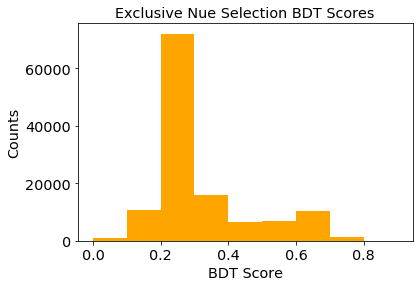

In [25]:
import matplotlib.pyplot as plt
import matplotlib

bins = np.arange(0, 1.0, 0.1)
gen = plt.hist(datasets_bdt['BDT_score'], bins, color='orange')
plt.xlabel("BDT Score")
plt.ylabel("Counts")
plt.title("Exclusive Nue Selection BDT Scores")
plt.show()

In [26]:

df_v = [nue_nue]
for i,df in enumerate(df_v):
    
    df['is_signal'] = np.where( (df.swtrig_pre==1) 
                                 & (df.nu_pdg==12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    
    df.loc[ (df['is_signal']== True), 'category' ] = 1


In [27]:
NUE_SEL_QUERY = BDT_LOOSE_CUTS


if isRun3 == False:
    NUE_SEL_QUERY += ' and BDT_score > 0.55'
elif isRun3 == True:
    NUE_SEL_QUERY += ' and BDT_score > 0.575'

SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
SIGNAL_NUE_SEL_QUERY += 'and is_signal==True'

NOT_SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
NOT_SIGNAL_NUE_SEL_QUERY += 'and is_signal==False'


In [28]:
#New categories

for i,df in enumerate(df_v):
            
    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where((df.swtrig_pre==1)& (df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["numu_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_CC_Npi0']== True), 'category' ] = 3
    df["numu_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['numu_CC_0pi0']== True), 'category' ] = 4
    
    df["numu_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 5
    df["numu_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 6
    
    df["nuebar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['nuebar_1eNp']== True), 'category' ] = 7
    df["nue_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1), True, False)
    df.loc[ (df['nue_NC']== True), 'category' ] = 8
    df["nue_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['nue_CCother']== True), 'category' ] = 9
    
    # less specific categories 
    df["nue_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False) , True, False)
    df.loc[ (df['nue_other']== True), 'category' ] = 10
    df["numu_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==14)) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_Npi0']== True), 'category' ] = 11
    df["numu_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==14)) &  (df.npi0==0), True, False)
    df.loc[ (df['numu_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.numu_CC_Npi0==False)
                             & (df.numu_CC_0pi0==False) & (df.numu_NC_Npi0==False) & (df.numu_NC_0pi0==False)
                             & (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False)
                             & (df.nue_other==False) & (df.numu_Npi0==False) & (df.numu_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

In [29]:
test = np.nansum(datasets_bdt.query(NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 100.58872589491486


In [30]:
test = np.nansum(datasets_bdt.query(NUE_SEL_QUERY + 'and is_signal==True')['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 81.10597224113408


In [31]:
test = np.nansum(datasets_bdt.query(SIGNAL_NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 81.10597224113408


In [32]:
#This deals with any overflow. Have done all bins, even where overflow shouldn't be possible for comepleteness

#ENERGY
tmp = df["reco_e"].copy()
mask = (df["reco_e"] > 3)
tmp[mask] = 2.75
df["reco_e"] = tmp
print(df["reco_e"])
#------
tmp = df["reco_e"].copy()
mask = (df["reco_e"] < 0)
tmp[mask] = 0.25
df["reco_e"] = tmp
print(df["reco_e"])

#ANGLE
tmp = df["cosNu_Angle_Numi_Elec_asmuon_reco"].copy()
mask = (df["cosNu_Angle_Numi_Elec_asmuon_reco"] > 1)
tmp[mask] = 0.9
df["cosNu_Angle_Numi_Elec_asmuon_reco"] = tmp
print(df["cosNu_Angle_Numi_Elec_asmuon_reco"])
#------
tmp = df["cosNu_Angle_Numi_Elec_asmuon_reco"].copy()
mask = (df["cosNu_Angle_Numi_Elec_asmuon_reco"] < -1)
tmp[mask] = -0.9
df["cosNu_Angle_Numi_Elec_asmuon_reco"] = tmp
print(df["cosNu_Angle_Numi_Elec_asmuon_reco"])

#LEPTON
tmp = df["targetP_asmuon_reco"].copy()
mask = (df["targetP_asmuon_reco"] > 2)
tmp[mask] = 1.875
df["targetP_asmuon_reco"] = tmp
print(df["targetP_asmuon_reco"])
#------
tmp = df["targetP_asmuon_reco"].copy()
mask = (df["targetP_asmuon_reco"] < 0)
tmp[mask] = 0.125
df["targetP_asmuon_reco"] = tmp
print(df["targetP_asmuon_reco"])


entry
0         0.986872
1         2.243618
2         0.000000
3         0.637524
4         2.345454
            ...   
124391    0.000000
124392    0.611435
124393    0.311910
124394    0.502471
124395    0.000000
Name: reco_e, Length: 124396, dtype: float32
entry
0         0.986872
1         2.243618
2         0.000000
3         0.637524
4         2.345454
            ...   
124391    0.000000
124392    0.611435
124393    0.311910
124394    0.502471
124395    0.000000
Name: reco_e, Length: 124396, dtype: float32
entry
0         0.776948
1         0.924151
2        -0.906756
3        -0.011540
4         0.988092
            ...   
124391    0.974471
124392    0.443933
124393    0.627474
124394    0.536328
124395   -0.906756
Name: cosNu_Angle_Numi_Elec_asmuon_reco, Length: 124396, dtype: float64
entry
0         0.776948
1         0.924151
2        -0.906756
3        -0.011540
4         0.988092
            ...   
124391    0.974471
124392    0.443933
124393    0.627474
124394    0.5363

Now apply the selection, looking at the plots produced with each stage.

This only has the BDT stage, so we can move on to looking at variables. 

n_events here =  124396
n_events/2 here =  24879.0

1.0
1
124396
{'nue_nue': 1}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and BDT_score > 0.575& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 nue_nue
--------------------------------------
current sample is:  nue_nue
[0.01455913 0.01842535 0.0205416  ... 0.01953786 0.01020177 0.00894024]
current_total  100.58872589491484
100.588725894914844616323534864932298660278320312500000000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  100.58872589491484
100.588725894914844616323534864

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


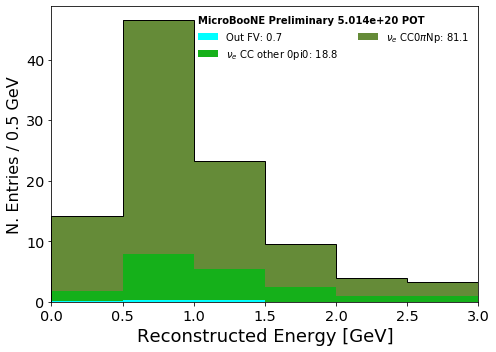

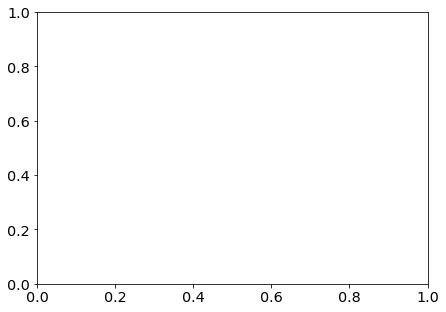

In [79]:
#WHAT WAS SELECTED

import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_nue.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/5))
print("")
#batch_size = 40000
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_nue.iloc[start:end]
    
    print(sample_set.shape[0])

    samples = {
        #"nue_nue": nue_nue
        "nue_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 

    # NUE
    weights = { #full sample mc = 0.38
                #"nue_nue"  : nueratio  * SPLIT * scaling
                "nue_nue"  : 1
                #"nue_nue"   :  nue_nue['totweight_data']
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
       


    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUE_SEL_QUERY,
        #query= BDT_LOOSE_CUTS,
        currentsample = "nue_nue",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        #genieweight = "weightSplineTimesTuneTimesPPFX",
        genieweight = "totweight_data",
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

n_events here =  124396
n_events/2 here =  24879.0

1.0
1
124396
{'nue_nue': 1}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and BDT_score > 0.575and is_signal==True& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 nue_nue
--------------------------------------
current sample is:  nue_nue
[0.01455913 0.01842535 0.0205416  ... 0.02067718 0.01292665 0.0118886 ]
current_total  81.10597224113408
81.105972241134082878488698042929172515869140625000000000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  81.10597224113408
81.105972241134

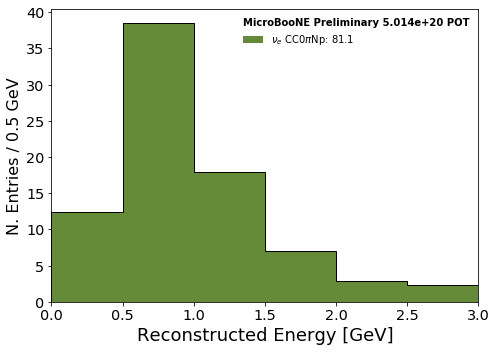

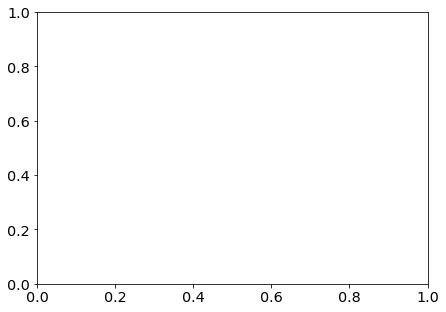

In [86]:
#THE TRUTH THAT WAS SELECTED

import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_nue.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/5))
print("")
#batch_size = 40000
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_nue.iloc[start:end]
    
    print(sample_set.shape[0])

    samples = {
        #"nue_nue": nue_nue
        "nue_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 

    # NUE
    weights = { #full sample mc = 0.38
                #"nue_nue"  : nueratio  * SPLIT * scaling
                "nue_nue"  : 1
                #"nue_nue"   :  nue_nue['totweight_data']
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= SIGNAL_NUE_SEL_QUERY,
        currentsample = "nue_nue",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        #genieweight = "weightSplineTimesTuneTimesPPFX",
        genieweight = "totweight_data",
        #genieweight = "nslice",
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

No handles with labels found to put in legend.


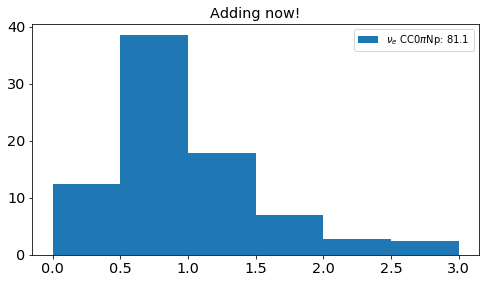

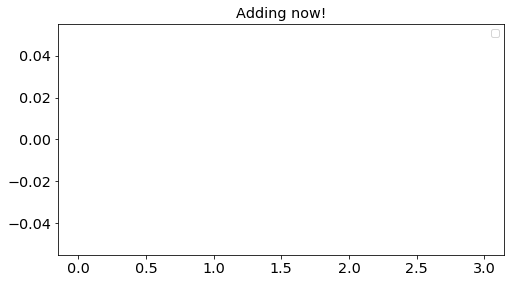

In [87]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    #nue_ax1.set_xlim([0.04, 5.0])    #TrueE, lepton mom
    #nue_ax1.set_xlim([-1, 1])    #AngleDiff

    nue_stacked = nue_ax1.hist(
                varss[i].values(),
                weights=list(weightss[i].values()),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [88]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

4569
4569


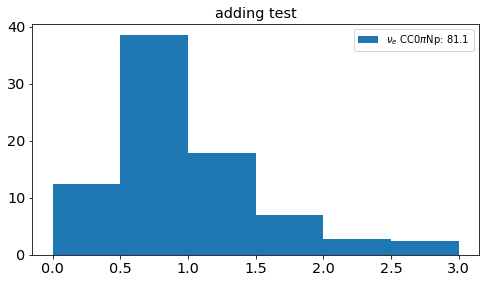

In [89]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}

labels = [
            "%s: %.1f" % (category_labels[c], sum(weightss_tot[0][c])) \
            if sum(weightss_tot[0][c]) else ""
            for c in varss[0].keys()
        ]


nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])

#TrueE, LeptonMom
#nue_ax1.set_xlim([0.0, 5.0])
#nue_ax1.set_ylim([0, 60])

#AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 35])

print(len(varss_tot[0][1]))
print(len(weightss_tot[0][1]))

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()


#print('%.75f' % sum(nue_stacked[0]))
#print(nue_stacked[0])

In [90]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 0 #2

nue_wanted_list = nue_stacked[0]
#nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

#2 for not signal, 0 for signal
#print(nue_wanted_list[0])
#print(sum(nue_wanted_list[0]))

#print('%.75f' % nue_wanted_list[9])

In [91]:
ending

'Jan19_noTune'

In [92]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

is_selected = True

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"


if isRun3 == False:
    if (is_selected == True):
        ######full trueE
        if (variable == "Energy"):
            vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv')
            weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv')
        ########angleDiff
        elif (variable == "Angle"):
            vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_'+ending+'.csv')
            weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_'+ending+'.csv')
        ########leptonMom
        elif (variable == "Lepton"):
            vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_'+ending+'.csv')
            weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_'+ending+'.csv')
    elif (is_selected == False):
        ######full trueE
        if (variable == "Energy"):
            vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_'+ending+'.csv')
            weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_'+ending+'.csv')
        ########angleDiff
        elif (variable == "Angle"):
            vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_'+ending+'.csv')
            weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_'+ending+'.csv')
        ########leptonMom
        elif (variable == "Lepton"):
            vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_'+ending+'.csv')
            weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_'+ending+'.csv')
if isRun3 == True:
    if (is_selected == True):
        ######full vintageXgboostVintageUprootEnv trueE
        if (variable == "Energy"):
            vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv')
            weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv')
        ########angleDiff
        elif (variable == "Angle"):
            vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_'+ending+'.csv')
            weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_'+ending+'.csv')
        ########leptonMom
        elif (variable == "Lepton"):
            vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_'+ending+'.csv')
            weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_'+ending+'.csv')
    elif (is_selected == False):
        ######full trueE
        if (variable == "Energy"):
            vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_'+ending+'.csv')
            weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_'+ending+'.csv')
        ########angleDiff
        elif (variable == "Angle"):
            vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_'+ending+'.csv')
            weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_'+ending+'.csv')
        ########leptonMom
        elif (variable == "Lepton"):
            vars_tot_df.to_csv('nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_run3_'+ending+'.csv')
            weights_tot_df.to_csv('nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_run3_'+ending+'.csv')

### Stat Errors

In [93]:
# sumw2 of the full event rate 
weight_stat_errs = []

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"


if (variable == "Energy"):
    xvar = "reco_e"
    bins = np.arange(0.0, 3.5, 0.5)
elif (variable == "Angle"):
    xvar = "cosNu_Angle_Numi_Elec_asmuon_reco"
    bins = np.arange(-1.0, 1.2, 0.2)
elif (variable == "Lepton"):
    xvar = "targetP_asmuon_reco"
    bins = np.arange(0, 2.25, 0.25)


for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(datasets_bdt.query(SIGNAL_NUE_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[0.2406228047637494, 0.7252897414228859, 0.33988935841785717, 0.13775597449510799, 0.05536521339784619, 0.04587900075069605]


In [94]:

if isRun3 == False:
    if (variable == "Energy"):
        np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    
elif isRun3 == True:
    if (variable == "Energy"):
        np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    

In [95]:
# sumw2 of the full event rate 
weight_stat_errs = []

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"


if (variable == "Energy"):
    xvar = "reco_e"
    bins = np.arange(0.0, 3.5, 0.5)
elif (variable == "Angle"):
    xvar = "cosNu_Angle_Numi_Elec_asmuon_reco"
    bins = np.arange(-1.0, 1.2, 0.2)
elif (variable == "Lepton"):
    xvar = "targetP_asmuon_reco"
    bins = np.arange(0, 2.25, 0.25)


for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(datasets_bdt.query(NOT_SIGNAL_NUE_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[0.031392003340879125, 0.15257768970100724, 0.10144574834097701, 0.04920875517398366, 0.020159014649307708, 0.018998190052804204]


In [96]:


if isRun3 == False:
    if (variable == "Energy"):
        np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    
if isRun3 == True:
    if (variable == "Energy"):
        np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("nue_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    

### Sys Errors

In [97]:
#############################
##### weightsGenie ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_nue.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_genie = []
df_genie_vars = []
df_genie_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_nue.iloc[start:end]

    samples = {
        "nue_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 

    
    weights = {
                "nue_nue"  : nueratio  * SPLIT * scaling
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"

    
    
    n_cv_tot, n_tot, df_genie, df_genie_var, df_genie_spline, detvar_dict  = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        #query= "",
        currentsample = "nue_nue",
        typeerr = "standard",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "ppfx_cv",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_genie.append(df_genie)
    df_genie_vars.append(df_genie_var)
    df_genie_splines.append(df_genie_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  124396
n_events/2 here =  62198.0

1.0
1
{'nue_nue': 0.01978299467350562}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and BDT_score > 0.575& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
       0     1     2     3     4     5     6     7     8     9    ...   590  \
0     1431  1044   819  1334  1086  1501  1160  1198  1365  1369  ...  1447   
1     1393  1073   871  1317  1108  1452  1171  1208  1343  1342  ...  1407   
2      536   739   333  1297  1010  1511   905  1470  1113  1373  ...   904   
3      757   975   441   989   567   989   893  

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[14.19936752 46.4460907  23.30253983  9.546875    3.86383057  3.23001862]


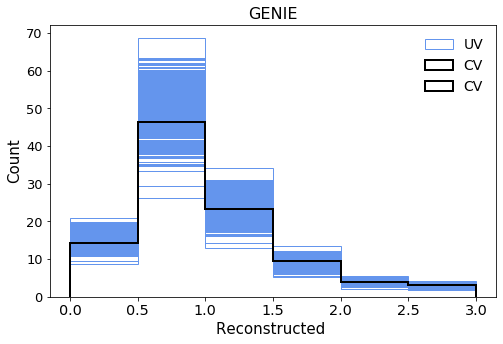

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[0. 0. 0. 0. 0. 0.]


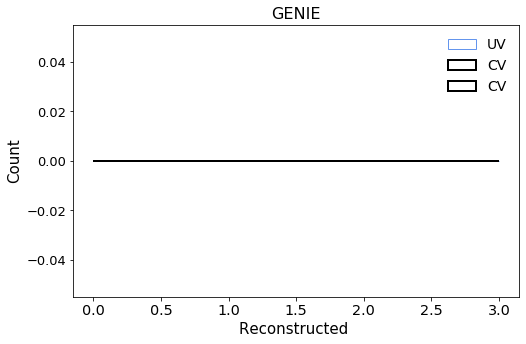

In [98]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    
    variable = "Energy"
    #variable = "Angle"
    #variable = "Lepton"

    if (variable == "Energy"):
        bin_centers = np.arange(0.25, 3.25, 0.5) #energy
        bins = np.arange(0.0, 3.5, 0.5)
    elif (variable == "Angle"):
        bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
        bins = np.arange(-1, 1.2, 0.2)
    elif (variable == "Lepton"):    
        bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
        bins = np.arange(0, 2.25, 0.25)
    
    
    
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('GENIE', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)

    plt.show()

In [99]:
#will need to edit this if batching

nue_nue_genie_detvar_dict = pd.DataFrame(detvar_dicts[0])

if isRun3 == False:
    if (variable == "Energy"):
        nue_nue_genie_detvar_dict.to_csv('nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Angle"):
        nue_nue_genie_detvar_dict.to_csv('nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Lepton"):
        nue_nue_genie_detvar_dict.to_csv('nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    if (variable == "Energy"):
        nue_nue_genie_detvar_dict.to_csv('nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')  
    elif (variable == "Angle"):
        nue_nue_genie_detvar_dict.to_csv('nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv') 
    elif (variable == "Lepton"):
        nue_nue_genie_detvar_dict.to_csv('nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv') 

In [100]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_nue_genie = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_nue_genie.append(sum(masterlist[a]))

final_ncvs_nue_nue_genie = sum(n_cv_tots)

#####################################################
frames = []
for a in range(len(dfs_genie)):
    frames.append(dfs_genie[a][0])
    
    
total_genie_df = pd.concat(frames, ignore_index=True)
#print(total_genie_df)

#-----------------
frames2 = []
for b in range(len(df_genie_vars)):
    frames2.append(df_genie_vars[b][0])
    
    
total_genie_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_genie_df_vars)

#-----------------
frames3 = []
for c in range(len(df_genie_splines)):
    frames3.append(df_genie_splines[c][0])
    
    
total_genie_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_genie_df_splines)


In [101]:
if isRun3 == False:
    if (variable == "Energy"):
        np.savetxt("nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   final_ns_nue_nue_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   final_ncvs_nue_nue_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Angle"):
        np.savetxt("nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   final_ns_nue_nue_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   final_ncvs_nue_nue_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################
        #typo missing _
        total_genie_df.to_csv('nue_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    elif (variable == "Lepton"):
        np.savetxt("nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   final_ns_nue_nue_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   final_ncvs_nue_nue_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')

elif isRun3 == True:
    if (variable == "Energy"):
        np.savetxt("nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   final_ns_nue_nue_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   final_ncvs_nue_nue_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Angle"):
        np.savetxt("nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   final_ns_nue_nue_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   final_ncvs_nue_nue_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    elif (variable == "Lepton"):
        np.savetxt("nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   final_ns_nue_nue_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   final_ncvs_nue_nue_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')


## NUE_MC SAMPLE

In [5]:
import time
s = time.time()

# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#NU   = '/pre_samp/prodgenie_numi_uboone_overlay_fhc_mcc9_run1_v28_all_snapshot'    +ls.APPEND #newTune
#full sample
if isRun3 == False:
    NU   = '/neutrinoselection_filt_run1_overlay'    +ls.APPEND #newTun
elif isRun3 == True:
    NU   = '/neutrinoselection_filt_run3b_overlay'    +ls.APPEND #newTun
        

#actually fetch datasets
nue_mc  = uproot.open(ls.ntuple_path+NU+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [nue_mc]

nue_variables = ["run", "sub", "evt", "swtrig_pre",            
             "trk_score_v", "topological_score", "shr_score",
            "reco_nu_vtx_sce_x", "reco_nu_vtx_sce_y", "reco_nu_vtx_sce_z", "shr_tkfit_npoints",
            "CosmicIPAll3D", "hits_ratio", "contained_fraction",
            "shrmoliereavg", "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
            "shr_energy", "category", "slnunhits", "slnhits", "flash_time", "nu_pdg", "ccnc",
             "selected", "nslice", "shr_distance", "shr_theta", "shr_phi", "npi0", "proton_e", "elec_e",
            "shr_tkfit_nhits_U", "shr_tkfit_nhits_V", "shr_tkfit_nhits_Y", "n_tracks_contained",
            "n_showers", "n_tracks", "shr_energy_cali", "n_showers_contained", "tksh_distance", "tksh_angle",
             "trkshrhitdist2", 'shrsubclusters0', 'shrsubclusters1', 'shrsubclusters2',
             "shr_energy_tot_cali", 'trk_energy_tot', 'nproton', 'npion', 'trk_energy', 'shr_px', 'shr_py', 'shr_pz']


# These are examples of variables present in MC samples only
nue_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "mc_pdg", "mc_px", "mc_py", "mc_pz", "mc_E"]

#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
nue_variables = list(set(nue_variables))
print(nue_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

nue_mc  = nue_mc.pandas.df(nue_variables + WEIGHTS + MCFVARS + SYSTEMATICS + PPFX + nue_varMC, flatten=False)

#just prints out the time this cell takes
print("==============================")
s2 = time.time()
print ("time to run: ",s2-s)

['hits_ratio', 'trk_energy_tot', 'shr_tkfit_dedx_U', 'shr_tkfit_npoints', 'elec_e', 'CosmicIPAll3D', 'nu_pdg', 'n_showers_contained', 'shrsubclusters2', 'evt', 'shr_tkfit_nhits_V', 'n_tracks', 'reco_nu_vtx_sce_y', 'shrsubclusters1', 'trk_energy', 'shr_tkfit_nhits_Y', 'shr_px', 'shr_score', 'shr_tkfit_dedx_V', 'trkshrhitdist2', 'shr_tkfit_nhits_U', 'nproton', 'shrmoliereavg', 'ccnc', 'shrsubclusters0', 'slnunhits', 'npion', 'tksh_angle', 'sub', 'tksh_distance', 'flash_time', 'trk_score_v', 'topological_score', 'shr_tkfit_dedx_Y', 'npi0', 'n_tracks_contained', 'shr_py', 'contained_fraction', 'shr_energy_tot_cali', 'slnhits', 'proton_e', 'run', 'shr_phi', 'shr_energy_cali', 'shr_pz', 'shr_energy', 'shr_distance', 'selected', 'shr_theta', 'n_showers', 'reco_nu_vtx_sce_x', 'nslice', 'swtrig_pre', 'reco_nu_vtx_sce_z', 'category']
time to run:  492.2718152999878


In [6]:
# In the next cell, we are going to play with the value of the event weights. 
# Let's store the original ones in some "safe variable" in this cell first.
# So if we screw up, we don't have to re-load the humongous TTree: we'll have the original weights safely stored here
#df_v = [nue_mc]

#removeGenieTune = False
#for i,df in enumerate(df_v):
#    df[ 'currentweightsafe' ] = df['weightSplineTimesTune']
#    df[ 'currentweight' ] = df['weightSplineTimesTune']

In [7]:
constructNuMISys = True

# We need to do this only for the MC samples (all data events weight = 1)
df_v = [nue_mc]

for i,df in enumerate(df_v):
    # This portion cleans up the basic weights
    #df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    #df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    #df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    #df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.
    # This portion cleans up the weights after the GENIE tune is applied
    #df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    #df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    #df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1. #originally 100
    #df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 
    
    # weightSplineTimesTuneTimesPPFX is our final weight: this is NuMI, so the final weight of the MC events needs 
    # to take into account the NuMI Flux re-weight called ppfx_cv to simulate NuMI events properly. 
    #df[ 'weightSplineTimesTuneTimesPPFX' ] = df[ 'weightSplineTimesTune' ]*df['ppfx_cv']
    
    
    # We also need to fix some cray cray weights in the GENIE systematics. 
    # This is a bit of a pain in the butt cause we have 600 universe (= 600 weights) for each event
    for ievt in range(df.shape[0]):
        reweightCondition = ((df['weightsGenie'].iloc[ievt] > 3000) | (df['weightsGenie'].iloc[ievt] < 0)  | 
                             (df['weightsGenie'].iloc[ievt] == np.inf))
        df['weightsGenie'].iloc[ievt][ reweightCondition ] = 1.
    

In [8]:
#nue_nue = pot_scale(nue_nue, 'intrinsic', ISRUN3)
if isRun3 == False:
    beamon_pot = 2.0E20 #v5
    overlay_pot =  2.33652E21
elif isRun3 == True:
    beamon_pot = 5.014E20 #v5
    overlay_pot =  1.98937e+21    

nue_mc['pot_scale'] = beamon_pot/overlay_pot

In [9]:
nue_mc['totweight_data'] = nue_mc['pot_scale']*nue_mc['ppfx_cv']

In [10]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [11]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [12]:
#RECO VARIABLE

#This assumes the electron to be the leading shower

for i,df in enumerate(df_v):
    df['targetP_asmuon_reco']     = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'] + df['shr_pz']*df['shr_pz'])
    #df['targetPt_asmuon']    = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'])
    #df['targetTheta_asmuon'] = np.arccos(df['shr_pz']/df['targetP_asmuon'] )
    #df['targetPhi_asmuon']   = np.arctan2(df['shr_py'],df['shr_px'])
    df['nu_Angle_Numi_Elec_asmuon_reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['shr_theta'],x['shr_phi']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon_reco'] = np.cos(df['nu_Angle_Numi_Elec_asmuon_reco'])

In [13]:
#This cell is about creating some new variables from the ones we have

import time
s = time.time()

#use all samples
df_v = [nue_mc]


puppa1 = 'trk_score_v'


for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id              = up.array('trk_id')-1 # I think we need this -1 to get the right result
    c                   = up.array('n_tracks_contained')
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')

    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])
    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

    #print(trk_score_v.shape, len(trk_llr_pid_v))

    #dummy variables
    puppa_obj = []
    puppa_trk = []
    puppa_shw = []
    puppa_prt = [] 
    puppa_mu  = []
    
    for pidv, p in zip(trk_llr_pid_v,trk_score_v):
        N_obj         = 0
        N_recoTrks    = 0
        N_recoShowers = 0
        N_recoProtons = 0
        N_recoMuons   = 0
        if len(pidv) > 0:
            passPIDCut = (pidv <= 0)
            passTrkCut = (p    >= 0)
            protonCut  = (passPIDCut & passTrkCut) 
            muonCut    = (np.logical_not(passPIDCut) & passTrkCut) 
            N_obj         = len(passTrkCut)
            N_recoTrks    = np.count_nonzero(passTrkCut)
            N_recoShowers = np.count_nonzero(np.logical_not(passTrkCut))
            N_recoProtons = np.count_nonzero(protonCut)
            N_recoMuons   = np.count_nonzero(muonCut)
        puppa_obj.append(N_obj)
        puppa_trk.append(N_recoTrks)
        puppa_shw.append(N_recoShowers)    
        puppa_prt.append(N_recoProtons)
        puppa_mu .append(N_recoMuons)

    df['N_obj']           = puppa_obj
    df['N_recoTrks']      = puppa_trk
    df['N_recoShowers']   = puppa_shw
    df['N_recoProtons']   = puppa_prt
    df['N_recoMuons']     = puppa_mu
    
    trk_llr_pid_v_sel     = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_energy_proton_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_energy_proton_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])

    df['trkpid']          = trk_llr_pid_v_sel
    df['protonenergy']    = trk_energy_proton_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel
    df['subcluster']      = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']

    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

#calculate angles wrt NuMI reference frame
for i,df in enumerate(df_v):
    #df['shr_numi_Angle']    = df.apply( lambda x: GetNuMIAngle(x['shr_px'],x['shr_py'],x['shr_pz']) , axis=1)
    df['proton_numi_Angle'] = df.apply( lambda x: GetNuMIAnglePol(x['protonphi'],x['protontheta']) , axis=1)

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  221.6283085346222


In [14]:
for i,df in enumerate(df_v):
    df.loc[df['shrmoliereavg'].isna(),'secondshower_Y_dot'] = 9999.
    df.loc[df['secondshower_Y_dot'].isna(),'secondshower_Y_dot'] = 0.0 

In [15]:
df_v = [nue_mc]
for i,df in enumerate(df_v):
    df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
    df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
    df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']  

In [16]:
#Calculate the total KE of all protons
#proton_e is only that of the highest energy proton

s = time.time()

Mp = 0.938272046

for entry in df_v:
    # Each of the things here is a column of arrays
    # First, set everywhere that is 2212 = True and False otherwise
    mask_2 = entry["mc_pdg"].apply(lambda x: np.array(2212 == x))
    # Now find which entries contain a 2212 value
    mask_1 = mask_2.apply(lambda x: np.any(x))
    # Next do the maths to the entries (we'll mask out unwanted bits later)
    mask_3 = entry["mc_E"].apply(lambda x: np.array(x > (0.04 + Mp)))
    # As the contents of mask_2 and mask_3 are arrays, this * operation
    # will multiply every element of mask_2 by every element of mask_3
    # Essentially performing an elementwise AND on every element
    mask_4 = mask_2 * mask_3
    # Default value => 0 where no mask is true
    entry["proton_total_KE"] = np.zeros_like(entry["proton_e"].values)
    # Finally for every place mask_4 applies, we want the mc_E value less Mp summed
    nums = (((entry.loc[:, "mc_E"] - Mp) * mask_4)).apply(lambda x: np.sum(x))
    # And finally, plonk this value into the dataframe
    entry.loc[mask_1, "proton_total_KE"] = nums[mask_1]

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  6.709170341491699


In [17]:
INTERCEPT = 0.0
SLOPE = 0.83

df_v = [nue_mc]
# define some energy-related variables
for i,df in enumerate(df_v):
    df["reco_e"] = (df["shr_energy_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
    df["true_e"] = df["elec_e"] + df["proton_total_KE"]
    
# and a way to filter out data
for i,df in enumerate(df_v):
    df["bnbdata"] = np.zeros_like(df["shr_energy"])
    df["extdata"] = np.zeros_like(df["shr_energy"])

In [18]:
#########################################################
######## RUN THIS CELL ONLY ONE TIME ONLY ###############
#########################################################
# The flash time for the NuMI data stream needs to be adjusted a little bit (there are hardware offsets in data). 
# That's the reason behind these hard coded shifts
df_v = [nue_mc]
for i,df in enumerate(df_v):
        df.loc[ :, 'flash_time' ] = df['flash_time' ] - 0.304

In [19]:
# Some quick clean up since some strange events get in there
nue_mc   = nue_mc.query('nu_e > 0.')

import NuMIGeoWeights
import importlib
importlib.reload(NuMIGeoWeights)
numiBeamlineGeoWeights = NuMIGeoWeights.NuMIGeoWeights()

# Calculate the true neutrino direction off of the NuMI beam, needed for plotting. Seem to be from MC
dfmc_v = [nue_mc]
for i,df in enumerate(dfmc_v):
    df['numi_nu_true_Angle'] = df.apply( lambda x: GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) , axis=1)
    #df['weightsNuMIGeo']     = df.apply( lambda x: numiBeamlineGeoWeights.calculateGeoWeight(x['nu_pdg'],x['nu_e'],x['numi_nu_true_Angle']) , axis=1)
   

Set up complete. Set up BDT for selection.

In [20]:
reco_in_fv_query = "10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026"


BDT_PRE_QUERY = 'swtrig_pre==1 and nslice==1'
BDT_PRE_QUERY += ' and ' + reco_in_fv_query
BDT_PRE_QUERY +=' and contained_fraction>0.9'
BDT_PRE_QUERY += ' and n_showers_contained==1'
BDT_PRE_QUERY += ' and n_tracks_contained>0'
BDT_PRE_QUERY += ' and trk_energy>0.04' 
    
BDT_LOOSE_CUTS = BDT_PRE_QUERY
BDT_LOOSE_CUTS +=' and shr_score<0.3'
BDT_LOOSE_CUTS += ' and shrmoliereavg<15'
BDT_LOOSE_CUTS += ' and shr_tkfit_dedx_Y<7'
BDT_LOOSE_CUTS += ' and trkpid<0.35'
BDT_LOOSE_CUTS += ' and tksh_distance<12'

In [21]:
# load bdt model 
bdt_model = xgb.Booster({'nthread': 4})
if isRun3 == False:
    bdt_model.load_model('/home/alex/NuMI/bdt_FHC_may2022_subset.model')
elif isRun3 == True:
    bdt_model.load_model('/home/alex/NuMI/bdt_RHC_may2022_subset.model')

In [22]:
# NOW, apply the model to real data for data/MC comparisons

varlist = [
    "shr_score", "shrmoliereavg", "trkpid",
    "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance",
    "tksh_angle", "subcluster", "trkshrhitdist2"]
#The training variables?

datasetlist = [nue_mc]

for df in datasetlist:
    for column in varlist:
        df.loc[(df[column] < -1.0e37) | (df[column] > 1.0e37), column] = np.nan
        
    # create testing dmatrix 
    df_test = xgb.DMatrix(data=df[varlist])
    
    # apply the bdt selection
    preds = bdt_model.predict(df_test)
    
    # add columns for plotting 
    df['BDT_score'] = preds
    print(df.shape)

(748702, 126)


In [23]:
datasets_bdt = nue_mc

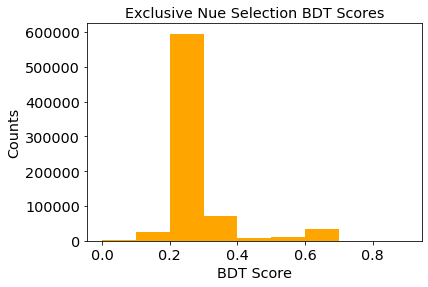

In [24]:
import matplotlib.pyplot as plt
import matplotlib

bins = np.arange(0, 1.0, 0.1)
gen = plt.hist(datasets_bdt['BDT_score'], bins, color='orange')
plt.xlabel("BDT Score")
plt.ylabel("Counts")
plt.title("Exclusive Nue Selection BDT Scores")
plt.show()

In [25]:

df_v = [nue_mc]
for i,df in enumerate(df_v):
    
    df['is_signal'] = np.where( (df.swtrig_pre==1)
                                 & (df.nu_pdg==12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    
    df.loc[ (df['is_signal']== True), 'category' ] = 1

In [26]:
NUE_SEL_QUERY = BDT_LOOSE_CUTS

if isRun3 == False:
    NUE_SEL_QUERY += ' and BDT_score > 0.55'
elif isRun3 == True:
    NUE_SEL_QUERY += ' and BDT_score > 0.575'

SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
SIGNAL_NUE_SEL_QUERY += 'and is_signal==True'

NOT_SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
NOT_SIGNAL_NUE_SEL_QUERY += 'and is_signal==False'


In [27]:
#New categories

for i,df in enumerate(df_v):

    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where((df.swtrig_pre==1) & (df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["numu_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_CC_Npi0']== True), 'category' ] = 3
    df["numu_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['numu_CC_0pi0']== True), 'category' ] = 4
    
    df["numu_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 5
    df["numu_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 6
    
    df["nuebar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['nuebar_1eNp']== True), 'category' ] = 7
    df["nue_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1), True, False)
    df.loc[ (df['nue_NC']== True), 'category' ] = 8
    df["nue_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['nue_CCother']== True), 'category' ] = 9
    
    # less specific categories 
    df["nue_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False) , True, False)
    df.loc[ (df['nue_other']== True), 'category' ] = 10
    df["numu_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==14)) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_Npi0']== True), 'category' ] = 11
    df["numu_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==14)) &  (df.npi0==0), True, False)
    df.loc[ (df['numu_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.numu_CC_Npi0==False)
                             & (df.numu_CC_0pi0==False) & (df.numu_NC_Npi0==False) & (df.numu_NC_0pi0==False)
                             & (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False)
                             & (df.nue_other==False) & (df.numu_Npi0==False) & (df.numu_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

In [28]:
# for replacing nue CC 
in_AV_query = "-1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8"
nueCC_query = 'abs(nu_pdg)==12 and ccnc==0 and '+in_AV_query

print("# of nueCC in AV in overlay sample = "+str(len(nue_mc.query(nueCC_query))))
len1 = len(nue_mc)

idx = nue_mc.query(nueCC_query).index
nue_mc.drop(idx, inplace=True)
len2 = len(nue_mc) 
print("# of nueCC in AV dropped in overlay = "+str(len1-len2))


# of nueCC in AV in overlay sample = 9915
# of nueCC in AV dropped in overlay = 9915


In [29]:
test = np.nansum(nue_mc.query(SIGNAL_NUE_SEL_QUERY + " and ~(abs(nu_pdg) == 12 & ccnc == 0)")['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(nue_mc.query(NUE_SEL_QUERY + "and ~(abs(nu_pdg) == 12 & ccnc == 0)")['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(nue_mc.query(NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(nue_mc.query(SIGNAL_NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

print("")

test = np.nansum(nue_mc.query("cosNu_Angle_Numi_Elec_asmuon_reco >-1.0 and cosNu_Angle_Numi_Elec_asmuon_reco <1.0")['totweight_data'])
print('total signal events = '+ str(test))

print("")


total signal events = 0.0
total signal events = 30.841621237559366
total signal events = 30.841621237559366
total signal events = 0.0

total signal events = 169905.93677810451



In [30]:
#This deals with any overflow. Have done all bins, even where overflow shouldn't be possible for comepleteness

#ENERGY
tmp = df["reco_e"].copy()
mask = (df["reco_e"] > 3)
tmp[mask] = 2.75
df["reco_e"] = tmp
print(df["reco_e"])
#------
tmp = df["reco_e"].copy()
mask = (df["reco_e"] < 0)
tmp[mask] = 0.25
df["reco_e"] = tmp
print(df["reco_e"])

#ANGLE
tmp = df["cosNu_Angle_Numi_Elec_asmuon_reco"].copy()
mask = (df["cosNu_Angle_Numi_Elec_asmuon_reco"] > 1)
tmp[mask] = 0.9
df["cosNu_Angle_Numi_Elec_asmuon_reco"] = tmp
print(df["cosNu_Angle_Numi_Elec_asmuon_reco"])
#------
tmp = df["cosNu_Angle_Numi_Elec_asmuon_reco"].copy()
mask = (df["cosNu_Angle_Numi_Elec_asmuon_reco"] < -1)
tmp[mask] = -0.9
df["cosNu_Angle_Numi_Elec_asmuon_reco"] = tmp
print(df["cosNu_Angle_Numi_Elec_asmuon_reco"])

#LEPTON
tmp = df["targetP_asmuon_reco"].copy()
mask = (df["targetP_asmuon_reco"] > 2)
tmp[mask] = 1.875
df["targetP_asmuon_reco"] = tmp
print(df["targetP_asmuon_reco"])
#------
tmp = df["targetP_asmuon_reco"].copy()
mask = (df["targetP_asmuon_reco"] < 0)
tmp[mask] = 0.125
df["targetP_asmuon_reco"] = tmp
print(df["targetP_asmuon_reco"])

entry
0         0.000000
1         0.000000
2         0.000000
3         0.000000
5         0.000000
            ...   
748697    0.143556
748698    0.000000
748699    0.000000
748700    0.000000
748701    0.000000
Name: reco_e, Length: 738787, dtype: float32
entry
0         0.000000
1         0.000000
2         0.000000
3         0.000000
5         0.000000
            ...   
748697    0.143556
748698    0.000000
748699    0.000000
748700    0.000000
748701    0.000000
Name: reco_e, Length: 738787, dtype: float32
entry
0         0.974263
1        -0.906756
2        -0.906756
3         0.974554
5         0.973846
            ...   
748697    0.974173
748698    0.974206
748699   -0.906756
748700   -0.906756
748701    0.973883
Name: cosNu_Angle_Numi_Elec_asmuon_reco, Length: 738787, dtype: float64
entry
0         0.974263
1        -0.906756
2        -0.906756
3         0.974554
5         0.973846
            ...   
748697    0.974173
748698    0.974206
748699   -0.906756
748700   -0.9067

Now apply the selection, looking at the plots produced with each stage.

This only has the BDT stage, so we can move on to looking at variables. 

n_events here =  738787

1.0
1
0
738787
{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and BDT_score > 0.575& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 nue_mc
--------------------------------------
current sample is:  nue_mc
current_total  30.841621237559366
30.841621237559365908964537084102630615234375000000000000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  30.841621237559366
30.841621237559365908964537084102630615234375000000000000000000000000000000000
---------------------------STILL TO

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


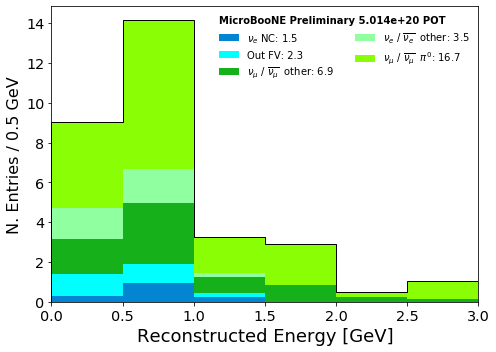

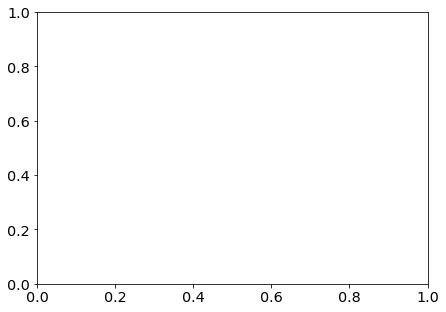

In [57]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_mc.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events
#batch_size = int(np.floor(n_events/3.3))
#n_events = batch_size

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    print(start)
    #print(end)
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_mc.iloc[start:end]
    
    print(sample_set.shape[0])

    samples = {
        "nue_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21

    # NU
    weights = { #full sample mc = 0.38
                "nue_mc"  : mcratio  * SPLIT * scaling
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUE_SEL_QUERY,
        #query= "nslice==1",
        currentsample = "nue_mc",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "ppfx_cv",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
No handles with labels found to put in legend.


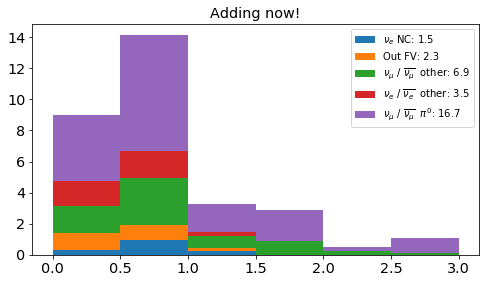

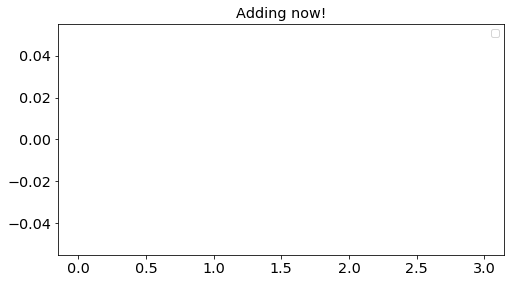

In [58]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    #nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #nue_ax1.set_xlim([-1, 1])    #AngleDiff

    nue_stacked = nue_ax1.hist(
                varss[i].values(),
                weights=list(weightss[i].values()),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [59]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

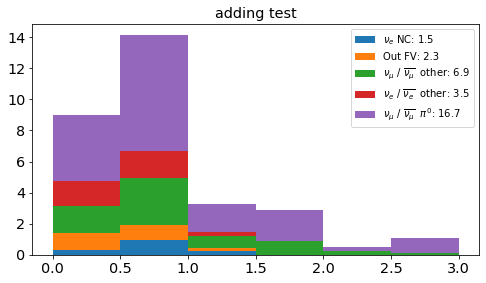

In [60]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


labels = [
            "%s: %.1f" % (category_labels[c], sum(weightss_tot[0][c])) \
            if sum(weightss_tot[0][c]) else ""
            for c in varss[0].keys()
        ]


nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])

#TrueE, LeptonMom
#nue_ax1.set_xlim([0, 5])
#nue_ax1.set_ylim([0, 15])

#AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 2])

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()

In [61]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 0

nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

#print(nue_wanted_list)

IndexError: index 6 is out of bounds for axis 0 with size 6

In [62]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"


if isRun3 == False:
    ######full trueE
    if (variable == "Energy"):
        vars_tot_df.to_csv('nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        weights_tot_df.to_csv('nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    ########angleDiff
    elif (variable == "Angle"):
        vars_tot_df.to_csv('nue_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        weights_tot_df.to_csv('nue_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    ########leptonMom
    elif (variable == "Lepton"):
        vars_tot_df.to_csv('nue_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        weights_tot_df.to_csv('nue_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
elif isRun3 ==True:
    ######full trueE
    if (variable == "Energy"):
        vars_tot_df.to_csv('nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        weights_tot_df.to_csv('nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    ########angleDiff
    elif (variable == "Angle"):
        vars_tot_df.to_csv('nue_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        weights_tot_df.to_csv('nue_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    ########leptonMom
    elif (variable == "Lepton"):
        vars_tot_df.to_csv('nue_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        weights_tot_df.to_csv('nue_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')    

### Stat Errors

In [63]:
#nuemcstat

# sumw2 of the full event rate 
weight_stat_errs = []

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"


if (variable == "Energy"):
    xvar = "reco_e"
    bins = np.arange(0.0, 3.5, 0.5)
elif (variable == "Angle"):
    xvar = "cosNu_Angle_Numi_Elec_asmuon_reco"
    bins = np.arange(-1.0, 1.2, 0.2)
elif (variable == "Lepton"):
    xvar = "targetP_asmuon_reco"
    bins = np.arange(0, 2.25, 0.25)

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(datasets_bdt.query(NUE_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[2.152205101639451, 3.508277173631043, 0.7472111907416492, 0.7884728370075379, 0.12759029993978827, 0.30860044882645987]


In [64]:
if isRun3 == False:
    if (variable == "Energy"):
        np.savetxt("nue_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("nue_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("nue_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')

    
elif isRun3 == True:
    if (variable == "Energy"):
        np.savetxt("nue_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("nue_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("nue_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')


### Sys Errors

In [65]:
#############################
##### weightsGenie ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_mc.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
#batch_size = 40000
batch_size = n_events
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_genie = []
df_genie_vars = []
df_genie_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_mc.iloc[start:end]

    samples = {
        "nue_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
    
    weights = { #full sample mc = 0.38
                "nue_mc"  : mcratio  * SPLIT * scaling
    }  


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    
    n_cv_tot, n_tot, df_genie, df_genie_var, df_genie_spline, detvar_dict  = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        currentsample = "nue_mc",
        typeerr = "standard",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "ppfx_cv",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_genie.append(df_genie)
    df_genie_vars.append(df_genie_var)
    df_genie_splines.append(df_genie_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  738787
n_events/2 here =  369393.0

1.0
1
{'nue_mc': 0.25203959042309876}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and BDT_score > 0.575& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
extra query added.
      0     1     2     3     4     5     6     7    8     9    ...   590  \
0    1905  1369  2393   248   961   221   836  1896  205   421  ...   142   
1      88  1373   696   557  1204  2317  1122   798  844  1415  ...   941   
2     916   614  1004   687  1209   470   789   514  356  1354  ...  1158   
3    1288  1030  1135   459   894   2

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[ 9.01578426 14.13265705  3.24405098  2.88361549  0.50493431  1.0605793 ]


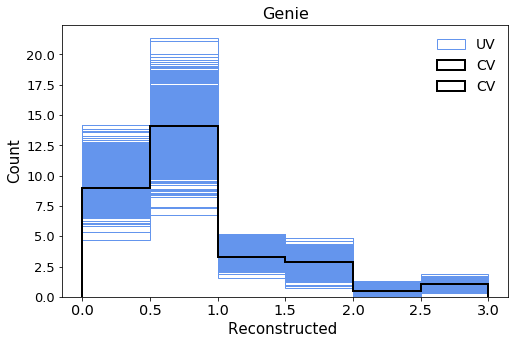

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[0. 0. 0. 0. 0. 0.]


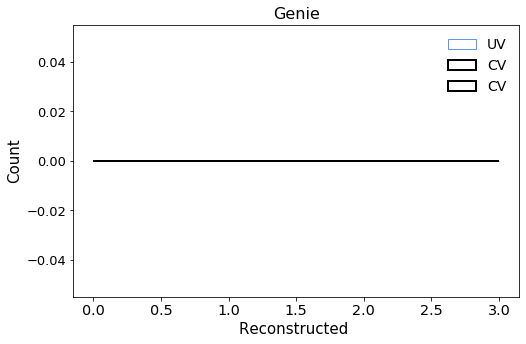

In [66]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0

    variable = "Energy"
    #variable = "Angle"
    #variable = "Lepton"

    if (variable == "Energy"):
        bin_centers = np.arange(0.25, 3.25, 0.5) #energy
        bins = np.arange(0.0, 3.5, 0.5)
    elif (variable == "Angle"):
        bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
        bins = np.arange(-1, 1.2, 0.2)
    elif (variable == "Lepton"):    
        bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
        bins = np.arange(0, 2.25, 0.25)
    
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Genie', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [67]:
#will need to edit this if batching

nue_mc_genie_detvar_dict = pd.DataFrame(detvar_dicts[0])

if isRun3 == False:
    if (variable == "Energy"):
        nue_mc_genie_detvar_dict.to_csv('nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Angle"):
        nue_mc_genie_detvar_dict.to_csv('nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Lepton"):
        nue_mc_genie_detvar_dict.to_csv('nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    if (variable == "Energy"):
        nue_mc_genie_detvar_dict.to_csv('nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv') 
    elif (variable == "Angle"):
        nue_mc_genie_detvar_dict.to_csv('nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Lepton"):
        nue_mc_genie_detvar_dict.to_csv('nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [68]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_mc_genie = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_mc_genie.append(sum(masterlist[a]))

final_ncvs_nue_mc_genie = sum(n_cv_tots)

#####################################################
frames = []
for a in range(len(dfs_genie)):
    frames.append(dfs_genie[a][0])
    
    
total_genie_df = pd.concat(frames, ignore_index=True)
#print(total_genie_df)

#-----------------
frames2 = []
for b in range(len(df_genie_vars)):
    frames2.append(df_genie_vars[b][0])
    
    
total_genie_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_genie_df_vars)

#-----------------
frames3 = []
for c in range(len(df_genie_splines)):
    frames3.append(df_genie_splines[c][0])
    
    
total_genie_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_genie_df_splines)

In [69]:
if isRun3 == False:
    if (variable == "Energy"):
        np.savetxt("nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   final_ns_nue_mc_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   final_ncvs_nue_mc_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Angle"):
        np.savetxt("nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   final_ns_nue_mc_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   final_ncvs_nue_mc_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    elif (variable == "Lepton"):
        np.savetxt("nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   final_ns_nue_mc_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   final_ncvs_nue_mc_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
    
elif isRun3 == True:
    if (variable == "Energy"):
        np.savetxt("nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   final_ns_nue_mc_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   final_ncvs_nue_mc_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Angle"):
        np.savetxt("nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   final_ns_nue_mc_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   final_ncvs_nue_mc_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    elif (variable == "Lepton"):
        np.savetxt("nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   final_ns_nue_mc_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   final_ncvs_nue_mc_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################
        total_genie_df.to_csv('nue_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')


## NUE_DIRT SAMPLE

In [5]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#DRT  = '/pre_samp/neutrinoselection_filt_run1_dirt_overlay'        +ls.APPEND
#full sample
#DRT  = 'neutrinoselection_filt_run1_dirt_overlay'        +ls.APPEND
if isRun3 == False:
    DRT  = 'prodgenie_numi_uboone_overlay_dirt_fhc_mcc9_run1_v28_all_snapshot'        +ls.APPEND
elif isRun3 == True:
    DRT  = 'neutrinoselection_filt_run3b_dirt_overlay'        +ls.APPEND

#actually fetch datasets
nue_dirt = uproot.open(ls.ntuple_path+DRT+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [nue_dirt]

nue_variables = ["run", "sub", "evt", "swtrig_pre",             
             "trk_score_v", "topological_score", "shr_score",
            "reco_nu_vtx_sce_x", "reco_nu_vtx_sce_y", "reco_nu_vtx_sce_z", "shr_tkfit_npoints",
            "CosmicIPAll3D", "hits_ratio", "contained_fraction",
            "shrmoliereavg", "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
            "shr_energy", "category", "slnunhits", "slnhits", "flash_time", "nu_pdg", "ccnc",
             "selected", "nslice", "shr_distance", "shr_theta", "shr_phi", "npi0", "proton_e", "elec_e",
            "shr_tkfit_nhits_U", "shr_tkfit_nhits_V", "shr_tkfit_nhits_Y", "n_tracks_contained",
            "n_showers", "n_tracks", "shr_energy_cali", "n_showers_contained", "tksh_distance", "tksh_angle",
             "trkshrhitdist2", 'shrsubclusters0', 'shrsubclusters1', 'shrsubclusters2',
             "shr_energy_tot_cali", 'trk_energy_tot', 'nproton', 'npion', 'trk_energy', 'shr_px', 'shr_py', 'shr_pz']


# These are examples of variables present in MC samples only
nue_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "mc_pdg", "mc_px", "mc_py", "mc_pz", "mc_E"]

#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
nue_variables = list(set(nue_variables))
print(nue_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

nue_dirt = nue_dirt.pandas.df(nue_variables+nue_varMC + WEIGHTS + SYSTEMATICS + PPFX, flatten=False)

['CosmicIPAll3D', 'shr_distance', 'shr_px', 'reco_nu_vtx_sce_x', 'shr_energy', 'category', 'hits_ratio', 'sub', 'nproton', 'trk_energy_tot', 'contained_fraction', 'shr_tkfit_nhits_V', 'trk_score_v', 'shr_energy_cali', 'run', 'shr_pz', 'tksh_angle', 'shr_energy_tot_cali', 'npi0', 'ccnc', 'shr_tkfit_dedx_Y', 'trk_energy', 'n_showers_contained', 'proton_e', 'trkshrhitdist2', 'shr_phi', 'shr_tkfit_dedx_U', 'reco_nu_vtx_sce_y', 'npion', 'shrmoliereavg', 'slnhits', 'n_tracks', 'swtrig_pre', 'selected', 'shr_tkfit_nhits_Y', 'n_showers', 'topological_score', 'nu_pdg', 'elec_e', 'shr_theta', 'shrsubclusters0', 'evt', 'shr_tkfit_dedx_V', 'shrsubclusters2', 'shr_tkfit_nhits_U', 'shr_tkfit_npoints', 'shrsubclusters1', 'nslice', 'flash_time', 'tksh_distance', 'shr_py', 'reco_nu_vtx_sce_z', 'shr_score', 'slnunhits', 'n_tracks_contained']


In [6]:
# In the next cell, we are going to play with the value of the event weights. 
# Let's store the original ones in some "safe variable" in this cell first.
# So if we screw up, we don't have to re-load the humongous TTree: we'll have the original weights safely stored here
#df_v = [nue_dirt]

#removeGenieTune = False
#for i,df in enumerate(df_v):
#    df[ 'currentweightsafe' ] = df['weightSplineTimesTune']
#    df[ 'currentweight' ] = df['weightSplineTimesTune']

In [7]:
constructNuMISys = True

# We need to do this only for the MC samples (all data events weight = 1)
df_v = [nue_dirt]

for i,df in enumerate(df_v):
    # This portion cleans up the basic weights
    #df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    #df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    #df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    #df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.
    # This portion cleans up the weights after the GENIE tune is applied
    #df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    #df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    #df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1. #originally 100
    #df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 
    
    # weightSplineTimesTuneTimesPPFX is our final weight: this is NuMI, so the final weight of the MC events needs 
    # to take into account the NuMI Flux re-weight called ppfx_cv to simulate NuMI events properly. 
    #df[ 'weightSplineTimesTuneTimesPPFX' ] = df[ 'weightSplineTimesTune' ]*df['ppfx_cv']
    
    
    # We also need to fix some cray cray weights in the GENIE systematics. 
    # This is a bit of a pain in the butt cause we have 600 universe (= 600 weights) for each event
    for ievt in range(df.shape[0]):
        reweightCondition = ((df['weightsGenie'].iloc[ievt] > 3000) | (df['weightsGenie'].iloc[ievt] < 0)  | 
                             (df['weightsGenie'].iloc[ievt] == np.inf))
        df['weightsGenie'].iloc[ievt][ reweightCondition ] = 1.
    

In [8]:
#nue_nue = pot_scale(nue_nue, 'intrinsic', ISRUN3)

if isRun3 == False:
    beamon_pot = 2.0E20 #v5
    dirt_pot =  1.42143e+21
    scalingDRT = 0.65 #0.35
elif isRun3 == True:
    beamon_pot = 5.014E20
    dirt_pot =  1.03226e+21
    scalingDRT = 0.45 

nue_dirt['pot_scale'] = (beamon_pot/dirt_pot)*scalingDRT

In [9]:
nue_dirt['totweight_data'] = nue_dirt['pot_scale']*nue_dirt['ppfx_cv']

In [10]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [11]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [12]:
#RECO VARIABLE
#This assumes the electron to be the leading shower
import time
s = time.time()

for i,df in enumerate(df_v):
    df['targetP_asmuon_reco']     = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'] + df['shr_pz']*df['shr_pz'])
    #df['targetPt_asmuon_reco']    = np.sqrt(df['shr_px']*df['shr_px'] + df['shr_py']*df['shr_py'])
    #df['targetTheta_asmuon_reco'] = np.arccos(df['shr_pz']/df['targetP_asmuon_reco'] )
    #df['targetPhi_asmuon_reco']   = np.arctan2(df['shr_py'],df['shr_px'])
    df['nu_Angle_Numi_Elec_asmuon_reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['shr_theta'],x['shr_phi']) , axis=1)
    df['cosNu_Angle_Numi_Elec_asmuon_reco'] = np.cos(df['nu_Angle_Numi_Elec_asmuon_reco'])
    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  15.516855478286743


In [13]:
#This cell is about creating some new variables from the ones we have

import time
s = time.time()

#use all samples
df_v = [nue_dirt]


puppa1 = 'trk_score_v'


for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    trk_calo_energy_y_v = up.array('trk_calo_energy_y_v')
    trk_id              = up.array('trk_id')-1 # I think we need this -1 to get the right result
    c                   = up.array('n_tracks_contained')
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')

    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])
    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

    #print(trk_score_v.shape, len(trk_llr_pid_v))

    #dummy variables
    puppa_obj = []
    puppa_trk = []
    puppa_shw = []
    puppa_prt = [] 
    puppa_mu  = []
    
    for pidv, p in zip(trk_llr_pid_v,trk_score_v):
        N_obj         = 0
        N_recoTrks    = 0
        N_recoShowers = 0
        N_recoProtons = 0
        N_recoMuons   = 0
        if len(pidv) > 0:
            passPIDCut = (pidv <= 0)
            passTrkCut = (p    >= 0)
            protonCut  = (passPIDCut & passTrkCut) 
            muonCut    = (np.logical_not(passPIDCut) & passTrkCut) 
            N_obj         = len(passTrkCut)
            N_recoTrks    = np.count_nonzero(passTrkCut)
            N_recoShowers = np.count_nonzero(np.logical_not(passTrkCut))
            N_recoProtons = np.count_nonzero(protonCut)
            N_recoMuons   = np.count_nonzero(muonCut)
        puppa_obj.append(N_obj)
        puppa_trk.append(N_recoTrks)
        puppa_shw.append(N_recoShowers)    
        puppa_prt.append(N_recoProtons)
        puppa_mu .append(N_recoMuons)

    df['N_obj']           = puppa_obj
    df['N_recoTrks']      = puppa_trk
    df['N_recoShowers']   = puppa_shw
    df['N_recoProtons']   = puppa_prt
    df['N_recoMuons']     = puppa_mu
    
    trk_llr_pid_v_sel     = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    trk_energy_proton_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_energy_proton_v,trk_id)])
    trk_calo_energy_y_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_calo_energy_y_v,trk_id)])
    trk_theta_proton_sel  = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_theta_proton_v,trk_id)])
    trk_phi_proton_sel    = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_phi_proton_v,trk_id)])

    df['trkpid']          = trk_llr_pid_v_sel
    df['protonenergy']    = trk_energy_proton_sel
    df['trackcaloenergy'] = trk_calo_energy_y_sel
    df['subcluster']      = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']

    df['protontheta']  = trk_theta_proton_sel
    df['protonphi']    = trk_phi_proton_sel

#calculate angles wrt NuMI reference frame
for i,df in enumerate(df_v):
    #df['shr_numi_Angle']    = df.apply( lambda x: GetNuMIAngle(x['shr_px'],x['shr_py'],x['shr_pz']) , axis=1)
    df['proton_numi_Angle'] = df.apply( lambda x: GetNuMIAnglePol(x['protonphi'],x['protontheta']) , axis=1)

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  35.944817781448364


In [14]:
for i,df in enumerate(df_v):
    df.loc[df['shrmoliereavg'].isna(),'secondshower_Y_dot'] = 9999.
    df.loc[df['secondshower_Y_dot'].isna(),'secondshower_Y_dot'] = 0.0 

In [15]:
df_v = [nue_dirt]
for i,df in enumerate(df_v):
    df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
    df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
    df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']  

In [16]:
##Calculate the total KE of all protons
#proton_e is only that of the highest energy proton

s = time.time()

Mp = 0.938272046

for entry in df_v:
    # Each of the things here is a column of arrays
    # First, set everywhere that is 2212 = True and False otherwise
    mask_2 = entry["mc_pdg"].apply(lambda x: np.array(2212 == x))
    # Now find which entries contain a 2212 value
    mask_1 = mask_2.apply(lambda x: np.any(x))
    # Next do the maths to the entries (we'll mask out unwanted bits later)
    mask_3 = entry["mc_E"].apply(lambda x: np.array(x > (0.04 + Mp)))
    # As the contents of mask_2 and mask_3 are arrays, this * operation
    # will multiply every element of mask_2 by every element of mask_3
    # Essentially performing an elementwise AND on every element
    mask_4 = mask_2 * mask_3
    # Default value => 0 where no mask is true
    entry["proton_total_KE"] = np.zeros_like(entry["proton_e"].values)
    # Finally for every place mask_4 applies, we want the mc_E value less Mp summed
    nums = (((entry.loc[:, "mc_E"] - Mp) * mask_4)).apply(lambda x: np.sum(x))
    # And finally, plonk this value into the dataframe
    entry.loc[mask_1, "proton_total_KE"] = nums[mask_1]

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  3.714271306991577


In [17]:
INTERCEPT = 0.0
SLOPE = 0.83

df_v = [nue_dirt]
# define some energy-related variables
for i,df in enumerate(df_v):
    df["reco_e"] = (df["shr_energy_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
    df["true_e"] = df["elec_e"] + df["proton_total_KE"]
    
# and a way to filter out data
for i,df in enumerate(df_v):
    df["bnbdata"] = np.zeros_like(df["shr_energy"])
    df["extdata"] = np.zeros_like(df["shr_energy"])

In [18]:
#########################################################
######## RUN THIS CELL ONLY ONE TIME ONLY ###############
#########################################################
# The flash time for the NuMI data stream needs to be adjusted a little bit (there are hardware offsets in data). 
# That's the reason behind these hard coded shifts
df_v = [nue_dirt]
for i,df in enumerate(df_v):
        df.loc[ :, 'flash_time' ] = df['flash_time' ] - 0.304

In [19]:
# Some quick clean up since some strange events get in there
nue_dirt   = nue_dirt.query('nu_e > 0.')

import NuMIGeoWeights
import importlib
importlib.reload(NuMIGeoWeights)
numiBeamlineGeoWeights = NuMIGeoWeights.NuMIGeoWeights()

# Calculate the true neutrino direction off of the NuMI beam, needed for plotting. Seem to be from MC
dfmc_v = [nue_dirt]
for i,df in enumerate(dfmc_v):
    df['numi_nu_true_Angle'] = df.apply( lambda x: GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) , axis=1)
    #df['weightsNuMIGeo']     = df.apply( lambda x: numiBeamlineGeoWeights.calculateGeoWeight(x['nu_pdg'],x['nu_e'],x['numi_nu_true_Angle']) , axis=1)
   

Set up complete. Set up BDT for selection.

In [20]:
reco_in_fv_query = "10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026"


BDT_PRE_QUERY = 'swtrig_pre==1 and nslice==1'
BDT_PRE_QUERY += ' and ' + reco_in_fv_query
BDT_PRE_QUERY +=' and contained_fraction>0.9'
BDT_PRE_QUERY += ' and n_showers_contained==1'
BDT_PRE_QUERY += ' and n_tracks_contained>0'
BDT_PRE_QUERY += ' and trk_energy>0.04' 
    
BDT_LOOSE_CUTS = BDT_PRE_QUERY
BDT_LOOSE_CUTS +=' and shr_score<0.3'
BDT_LOOSE_CUTS += ' and shrmoliereavg<15'
BDT_LOOSE_CUTS += ' and shr_tkfit_dedx_Y<7'
BDT_LOOSE_CUTS += ' and trkpid<0.35'
BDT_LOOSE_CUTS += ' and tksh_distance<12'

In [21]:
# load bdt model 
bdt_model = xgb.Booster({'nthread': 4})
if isRun3 == False:
    bdt_model.load_model('/home/alex/NuMI/bdt_FHC_may2022_subset.model')
elif isRun3 == True:
    bdt_model.load_model('/home/alex/NuMI/bdt_RHC_may2022_subset.model')    

In [22]:
# NOW, apply the model to real data for data/MC comparisons

varlist = [
    "shr_score", "shrmoliereavg", "trkpid",
    "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance",
    "tksh_angle", "subcluster", "trkshrhitdist2"]
#The training variables?

datasetlist = [nue_dirt]

for df in datasetlist:
    for column in varlist:
        df.loc[(df[column] < -1.0e37) | (df[column] > 1.0e37), column] = np.nan
        
    # create testing dmatrix 
    df_test = xgb.DMatrix(data=df[varlist])
    
    # apply the bdt selection
    preds = bdt_model.predict(df_test)
    
    # add columns for plotting 
    df['BDT_score'] = preds
    print(df.shape)

(389264, 109)


In [23]:
datasets_bdt = nue_dirt

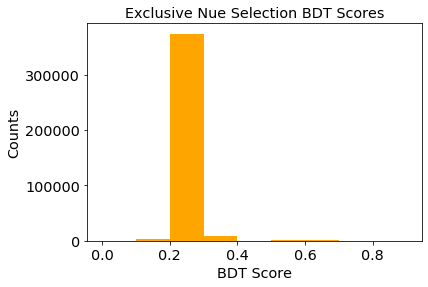

In [24]:
import matplotlib.pyplot as plt
import matplotlib

bins = np.arange(0, 1.0, 0.1)
gen = plt.hist(datasets_bdt['BDT_score'], bins, color='orange')
plt.xlabel("BDT Score")
plt.ylabel("Counts")
plt.title("Exclusive Nue Selection BDT Scores")
plt.show()

In [25]:

df_v = [nue_dirt]
for i,df in enumerate(df_v):
    
    df['is_signal'] = np.where( (df.swtrig_pre==1)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    
    df.loc[ (df['is_signal']== True), 'category' ] = 1

In [26]:
NUE_SEL_QUERY = BDT_LOOSE_CUTS


if isRun3 == False:
    NUE_SEL_QUERY += ' and BDT_score > 0.55'
elif isRun3 == True:
    NUE_SEL_QUERY += ' and BDT_score > 0.575'

SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
SIGNAL_NUE_SEL_QUERY += 'and is_signal==True'

NOT_SIGNAL_NUE_SEL_QUERY = NUE_SEL_QUERY
NOT_SIGNAL_NUE_SEL_QUERY += 'and is_signal==False'


In [27]:
#New categories

for i,df in enumerate(df_v):
            
    #df.loc[ (df['is_signal']== True), 'category' ] = 1
    #df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
    #                             & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
    #                             & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where((df.swtrig_pre==1)& (df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["numu_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_CC_Npi0']== True), 'category' ] = 3
    df["numu_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['numu_CC_0pi0']== True), 'category' ] = 4
    
    df["numu_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 5
    df["numu_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['numu_NC_Npi0']== True), 'category' ] = 6
    
    df["nuebar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-12) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['nuebar_1eNp']== True), 'category' ] = 7
    df["nue_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1), True, False)
    df.loc[ (df['nue_NC']== True), 'category' ] = 8
    df["nue_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['nue_CCother']== True), 'category' ] = 9
    
    # less specific categories 
    df["nue_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False) , True, False)
    df.loc[ (df['nue_other']== True), 'category' ] = 10
    df["numu_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==14)) & (df.npi0>=1), True, False)
    df.loc[ (df['numu_Npi0']== True), 'category' ] = 11
    df["numu_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==14)) &  (df.npi0==0), True, False)
    df.loc[ (df['numu_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.numu_CC_Npi0==False)
                             & (df.numu_CC_0pi0==False) & (df.numu_NC_Npi0==False) & (df.numu_NC_0pi0==False)
                             & (df.nuebar_1eNp==False) & (df.nue_NC==False) & (df.nue_CCother==False)
                             & (df.nue_other==False) & (df.numu_Npi0==False) & (df.numu_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

In [28]:
test = np.nansum(nue_dirt.query(SIGNAL_NUE_SEL_QUERY )['totweight_data'])
print('total signal events = '+ str(test))
test = np.nansum(nue_dirt.query(NUE_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))


total signal events = 0.0
total signal events = 0.2774351837779949


In [29]:
#This deals with any overflow. Have done all bins, even where overflow shouldn't be possible for comepleteness

#ENERGY
tmp = df["reco_e"].copy()
mask = (df["reco_e"] > 3)
tmp[mask] = 2.75
df["reco_e"] = tmp
print(df["reco_e"])
#------
tmp = df["reco_e"].copy()
mask = (df["reco_e"] < 0)
tmp[mask] = 0.25
df["reco_e"] = tmp
print(df["reco_e"])

#ANGLE
tmp = df["cosNu_Angle_Numi_Elec_asmuon_reco"].copy()
mask = (df["cosNu_Angle_Numi_Elec_asmuon_reco"] > 1)
tmp[mask] = 0.9
df["cosNu_Angle_Numi_Elec_asmuon_reco"] = tmp
print(df["cosNu_Angle_Numi_Elec_asmuon_reco"])
#------
tmp = df["cosNu_Angle_Numi_Elec_asmuon_reco"].copy()
mask = (df["cosNu_Angle_Numi_Elec_asmuon_reco"] < -1)
tmp[mask] = -0.9
df["cosNu_Angle_Numi_Elec_asmuon_reco"] = tmp
print(df["cosNu_Angle_Numi_Elec_asmuon_reco"])

#LEPTON
tmp = df["targetP_asmuon_reco"].copy()
mask = (df["targetP_asmuon_reco"] > 2)
tmp[mask] = 1.875
df["targetP_asmuon_reco"] = tmp
print(df["targetP_asmuon_reco"])
#------
tmp = df["targetP_asmuon_reco"].copy()
mask = (df["targetP_asmuon_reco"] < 0)
tmp[mask] = 0.125
df["targetP_asmuon_reco"] = tmp
print(df["targetP_asmuon_reco"])


entry
0         0.000000
1         0.000000
2         0.131506
3         0.000000
4         0.000000
            ...   
389259    0.000000
389260    0.000000
389261    0.000000
389262    0.000000
389263    0.000000
Name: reco_e, Length: 389264, dtype: float32
entry
0         0.000000
1         0.000000
2         0.131506
3         0.000000
4         0.000000
            ...   
389259    0.000000
389260    0.000000
389261    0.000000
389262    0.000000
389263    0.000000
Name: reco_e, Length: 389264, dtype: float32
entry
0        -0.906756
1        -0.906756
2         0.974249
3        -0.906756
4        -0.906756
            ...   
389259   -0.906756
389260   -0.906756
389261   -0.906756
389262   -0.906756
389263   -0.906756
Name: cosNu_Angle_Numi_Elec_asmuon_reco, Length: 389264, dtype: float64
entry
0        -0.906756
1        -0.906756
2         0.974249
3        -0.906756
4        -0.906756
            ...   
389259   -0.906756
389260   -0.906756
389261   -0.906756
389262   -0.9067

Now apply the selection, looking at the plots produced with each stage.

This only has the BDT stage, so we can move on to looking at variables. 

n_events here =  389264
n_events/2 here =  194632.0

1.0
1
{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and BDT_score > 0.575& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 nue_dirt
--------------------------------------
current sample is:  nue_dirt
current_total  0.2774351837779949
0.277435183777994920362175435002427548170089721679687500000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  0.2774351837779949
0.277435183777994920362175435002427548170089721679687500000000000000000000000
------------

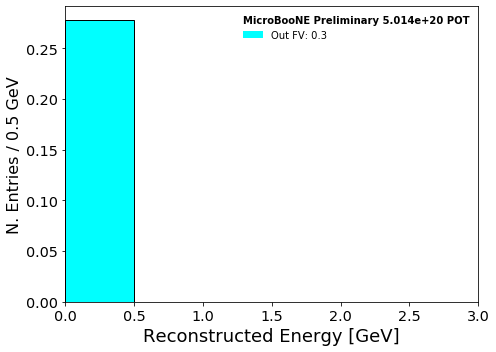

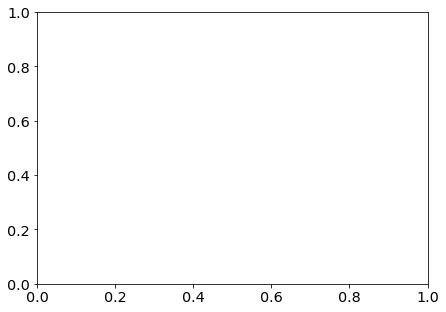

In [56]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
#batch_size = 40000
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_dirt.iloc[start:end]

    samples = {
        "nue_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        # This is the data POT we normalize to (comes from the data Ntuples)
        pot =  2e+20 #partial file: 8.885e+19
        # This is the POT scaling factor for dirt sample
        dirtratio = pot/1.42143e+21
        # We scale down the dirt (big uncertainties on this, there's a better data-MC agreement like this)
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45

    # NU
    weights = { #full sample mc = 0.38
                "nue_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc

    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUE_SEL_QUERY,
        #query= BDT_LOOSE_CUTS,
        currentsample = "nue_dirt",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "ppfx_cv",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

No handles with labels found to put in legend.


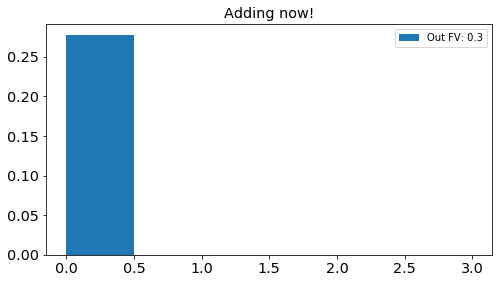

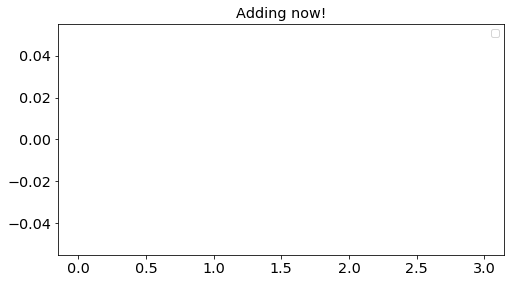

In [57]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    #nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #nue_ax1.set_xlim([-1, 1])    #AngleDiff

    nue_stacked = nue_ax1.hist(
                varss[i].values(),
                weights=list(weightss[i].values()),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [58]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

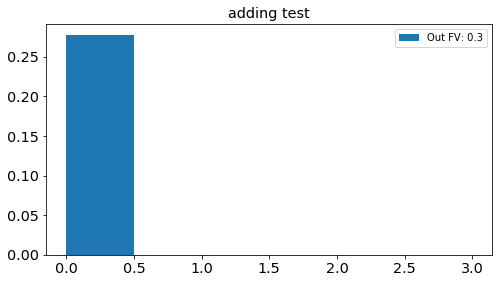

In [59]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


labels = [
            "%s: %.1f" % (category_labels[c], sum(weightss_tot[0][c])) \
            if sum(weightss_tot[0][c]) else ""
            for c in varss[0].keys()
        ]


nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])

#TrueE, LeptonMom
#nue_ax1.set_xlim([0, 5])
#nue_ax1.set_ylim([0, 1.5])

#AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 0.05])

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()

In [60]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 2

nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

print(nue_wanted_list)

[]

SUMS
[]
[]

Wanted List:
[]

[]


In [61]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"

if isRun3 == False:
    ######full trueE
    if (variable == "Energy"):
        vars_tot_df.to_csv('nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        weights_tot_df.to_csv('nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    ########angleDiff
    elif (variable == "Angle"):
        vars_tot_df.to_csv('nue_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        weights_tot_df.to_csv('nue_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    ########leptonMom
    elif (variable == "Lepton"):
        vars_tot_df.to_csv('nue_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        weights_tot_df.to_csv('nue_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
elif isRun3 == True:
    ######full trueE
    if (variable == "Energy"):
        vars_tot_df.to_csv('nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        weights_tot_df.to_csv('nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    ########angleDiff
    elif (variable == "Angle"):
        vars_tot_df.to_csv('nue_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        weights_tot_df.to_csv('nue_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    ########leptonMom
    elif (variable == "Lepton"):
        vars_tot_df.to_csv('nue_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        weights_tot_df.to_csv('nue_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')


### Stat Err

In [62]:
# sumw2 of the full event rate 
weight_stat_errs = []

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"


if (variable == "Energy"):
    xvar = "reco_e"
    bins = np.arange(0.0, 3.5, 0.5)
elif (variable == "Angle"):
    xvar = "cosNu_Angle_Numi_Elec_asmuon_reco"
    bins = np.arange(-1.0, 1.2, 0.2)
elif (variable == "Lepton"):
    xvar = "targetP_asmuon_reco"
    bins = np.arange(0, 2.25, 0.25)

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(datasets_bdt.query(NUE_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[0.07697028119792981, 0, 0, 0, 0, 0]


In [63]:
if isRun3 == False:
    if (variable == "Energy"):
        np.savetxt("nue_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("nue_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("nue_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')

elif isRun3 == True:
    if (variable == "Energy"):
        np.savetxt("nue_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("nue_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("nue_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')


### Sys Errs

In [64]:
#############################
##### weightsGenie ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = nue_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_genie = []
df_genie_vars = []
df_genie_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = nue_dirt.iloc[start:end]

    samples = {
        "nue_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45
        
    weights = { #full sample mc = 0.38
                "nue_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }



    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon_reco',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    

    
    n_cv_tot, n_tot, df_genie, df_genie_var, df_genie_spline, detvar_dict  = my_plotter.plot_variable(
        VARIABLE,   
        query= NUE_SEL_QUERY,
        currentsample = "nue_dirt",
        typeerr = "standard",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse = 500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "ppfx_cv",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_genie.append(df_genie)
    df_genie_vars.append(df_genie_var)
    df_genie_splines.append(df_genie_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  389264
n_events/2 here =  194632.0

1.0
1
{'nue_dirt': 0.21857865266502624}
swtrig_pre==1 and nslice==1 and 10<=reco_nu_vtx_sce_x<=246 and -106<=reco_nu_vtx_sce_y<=106 and 10<=reco_nu_vtx_sce_z<=1026 and contained_fraction>0.9 and n_showers_contained==1 and n_tracks_contained>0 and trk_energy>0.04 and shr_score<0.3 and shrmoliereavg<15 and shr_tkfit_dedx_Y<7 and trkpid<0.35 and tksh_distance<12 and BDT_score > 0.575& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
    0     1     2     3     4     5     6     7     8     9    ...   590  \
0  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   

    591   592   593   594   595   596   597   598   599  
0  1000  1000  1000  1000  1000  1000  1000  1000  1000  

[1 rows x 600 columns]
    0     1     2     3     4     5     6     7     8     9    ...   

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[0.27743518 0.         0.         0.         0.         0.        ]


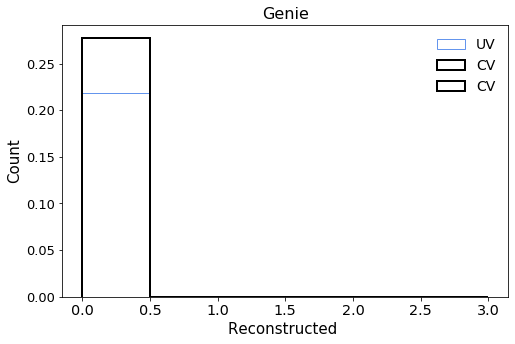

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[0. 0. 0. 0. 0. 0.]


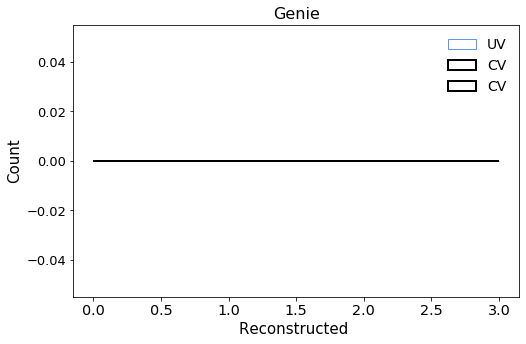

In [65]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    
    variable = "Energy"
    #variable = "Angle"
    #variable = "Lepton"

    if (variable == "Energy"):
        bin_centers = np.arange(0.25, 3.25, 0.5) #energy
        bins = np.arange(0.0, 3.5, 0.5)
    elif (variable == "Angle"):
        bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
        bins = np.arange(-1, 1.2, 0.2)
    elif (variable == "Lepton"):    
        bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
        bins = np.arange(0, 2.25, 0.25)
    
    
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Genie', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [66]:
#will need to edit this if batching

nue_dirt_genie_detvar_dict = pd.DataFrame(detvar_dicts[0])

if isRun3 == False:
    if (variable == "Energy"):
        nue_dirt_genie_detvar_dict.to_csv('nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Angle"):
        nue_dirt_genie_detvar_dict.to_csv('nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Lepton"):
        nue_dirt_genie_detvar_dict.to_csv('nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    if (variable == "Energy"):
        nue_dirt_genie_detvar_dict.to_csv('nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Angle"):
        nue_dirt_genie_detvar_dict.to_csv('nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Lepton"):
        nue_dirt_genie_detvar_dict.to_csv('nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [67]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_nue_dirt_genie = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_nue_dirt_genie.append(sum(masterlist[a]))

final_ncvs_nue_dirt_genie = sum(n_cv_tots)

#####################################################
frames = []
for a in range(len(dfs_genie)):
    frames.append(dfs_genie[a][0])
    
    
total_genie_df = pd.concat(frames, ignore_index=True)
print(total_genie_df)

#-----------------
frames2 = []
for b in range(len(df_genie_vars)):
    frames2.append(df_genie_vars[b][0])
    
    
total_genie_df_vars = pd.concat(frames2, ignore_index=False)
print(total_genie_df_vars)

#-----------------
frames3 = []
for c in range(len(df_genie_splines)):
    frames3.append(df_genie_splines[c][0])
    
    
total_genie_df_splines = pd.concat(frames3, ignore_index=False)
print(total_genie_df_splines)


    0     1     2     3     4     5     6     7     8     9    ...   590  \
0  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   

    591   592   593   594   595   596   597   598   599  
0  1000  1000  1000  1000  1000  1000  1000  1000  1000  

[1 rows x 600 columns]
entry
312740    0.47448
Name: reco_e, dtype: float32
entry
312740    0.218579
Name: weightSpline, dtype: float32


In [68]:
if isRun3 == False:
    if (variable == "Energy"):
        np.savetxt("nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   final_ns_nue_dirt_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   final_ncvs_nue_dirt_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Angle"):
        np.savetxt("nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   final_ns_nue_dirt_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   final_ncvs_nue_dirt_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    elif (variable == "Lepton"):
        np.savetxt("nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   final_ns_nue_dirt_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   final_ncvs_nue_dirt_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        
elif isRun3 == True:
    if (variable == "Energy"):
        np.savetxt("nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   final_ns_nue_dirt_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   final_ncvs_nue_dirt_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Angle"):
        np.savetxt("nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   final_ns_nue_dirt_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   final_ncvs_nue_dirt_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    elif (variable == "Lepton"):
        np.savetxt("nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   final_ns_nue_dirt_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   final_ncvs_nue_dirt_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('nue_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')



## NUE_EXT SAMPLE

Unaffected by weight changes.

## NUE_DATA SAMPLE

Unaffected by weight changes.

## NUMU_MC SAMPLE

In [5]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#NU   = '/pre_samp/prodgenie_numi_uboone_overlay_fhc_mcc9_run1_v28_all_snapshot'    +ls.APPEND #newTune
#full sample
if isRun3 == False:
    NU   = '/neutrinoselection_filt_run1_overlay'    +ls.APPEND #newTune
elif isRun3 == True:
    NU   = '/neutrinoselection_filt_run3b_overlay'    +ls.APPEND   

#actually fetch datasets
numu_mc  = uproot.open(ls.ntuple_path+NU+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [numu_mc]

numu_variables = [
        "nu_pdg", "slpdg", "backtracked_pdg", "trk_score_v", #"trk_pfp_id",
        "category", "ccnc", "swtrig_pre", "trk_len_v",
        "run","sub","evt", "hits_ratio",
        "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
        "flash_pe", "contained_fraction",
        "trk_llr_pid_score_v", # trk-PID score
        "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
        "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
        "nmuon", "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance", "n_tracks_contained",
        "reco_e", "shr_energy_tot_cali", "trk_energy_tot",
        "nproton", "slnunhits", "slnhits", "true_e_visible",
        "npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
        "pi0_e", "evnunhits", "nslice", "interaction",
        "slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z",
        "topological_score", "proton_e", "elec_e",
        "isVtxInFiducial", "trk_sce_end_x_v", "trk_sce_end_y_v", "trk_sce_end_z_v", "trk_sce_start_x_v",
        "trk_theta", "trk_phi", "trk_energy_muon", "trk_range_muon_mom_v", "trk_mcs_muon_mom_v"
        #"theta", # angle between incoming and outgoing leptons in radians
    ]


# These are examples of variables present in MC samples only
numu_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "theta", "mc_pdg", "mc_px", "mc_py", "mc_pz", "mc_E"]


#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
numu_variables = list(set(numu_variables))
print(numu_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

#redefine reco e to match nue?

['slclustfrac', 'nproton', 'shr_energy_tot_cali', 'ccnc', 'slnhits', 'nu_pdg', 'slnunhits', 'pi0truth_elec_etot', 'pion_e', 'isVtxInFiducial', 'shr_tkfit_dedx_Y', 'trk_phi', 'backtracked_pdg', '_opfilter_pe_veto', 'trk_sce_end_x_v', 'hits_ratio', 'muon_e', 'CosmicIPAll3D', 'reco_nu_vtx_x', '_opfilter_pe_beam', 'interaction', 'trk_range_muon_mom_v', 'npion', 'sub', 'trk_sce_end_y_v', 'slpdg', 'reco_e', 'reco_nu_vtx_y', 'run', 'trk_energy_muon', 'CosmicIP', 'category', 'tksh_distance', 'trk_llr_pid_score_v', 'trk_theta', 'CosmicDirAll3D', 'swtrig_pre', 'true_e_visible', 'evt', 'nslice', 'contained_fraction', 'flash_pe', 'topological_score', 'trk_mcs_muon_mom_v', 'elec_e', 'trk_sce_start_x_v', 'npi0', 'proton_e', 'trk_sce_end_z_v', 'trk_score_v', 'trk_len_v', 'reco_nu_vtx_z', 'reco_nu_vtx_sce_z', 'reco_nu_vtx_sce_y', 'n_showers_contained', 'nmuon', 'reco_nu_vtx_sce_x', 'pi0_e', 'n_tracks_contained', 'evnunhits', 'trk_energy_tot']


In [6]:
import time
s = time.time()

import pandas as pandas

mc_var   = numu_variables + WEIGHTS + SYSTEMATICS + PPFX + numu_varMC #+ MCFVARS

# This needs modifications (add variables from above)
uproot_v = [numu_mc] 
var_v    = [mc_var] 


for ii, CV in enumerate(uproot_v):
    CVDF  = CV.pandas.df(var_v[ii], flatten=False)
    load_data_run123.process_uproot_numu(CV,CVDF)
    if ii == 0:
        numu_mc = CVDF

s2 = time.time()

print("runtime = ", s2-s)
#approx 25 min run time

trk_llr_pid_v  [[0.9051982] [] [] ... [] [] [0.96284807]]
trk_score_v  [[0.9768751] [] [] ... [] [] [1.0]]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


updated proton mask test
runtime =  1144.6738650798798


In [7]:
#df_v = [numu_mc]
#print(df_v)
#removeGenieTune = False
#for i,df in enumerate(df_v):
#    df[ 'currentweightsafe' ] = df['weightSplineTimesTune']
#    df[ 'currentweight' ] = df['weightSplineTimesTune']

In [8]:
df_v = [numu_mc]
for i,df in enumerate(df_v):  
    df["bnbdata"] = np.zeros_like(df["isVtxInFiducial"])
    df["extdata"] = np.zeros_like(df["isVtxInFiducial"])

In [9]:

numu_mc.query("nu_e > 0 and nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)\
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 \
and contained_fraction> 0.95 and topological_score > 0.3", inplace=True)

In [10]:
s = time.time()

df_v = [numu_mc]
#removeGenieTune = False
for i,df in enumerate(df_v):
    #df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    #df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    #df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    #df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.    
    
    #df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    #df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    #df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    #df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 
    #df[ 'weightSplineTimesTuneTimesPPFX' ] = df[ 'weightSplineTimesTune' ]*df['ppfx_cv']
    
    #df.loc[ df['weightSpline'] <= 0, 'weightSpline' ] = 1.
    #df.loc[ df['weightSpline'] == np.inf, 'weightSpline' ] = 1.
    #df.loc[ df['weightSpline'] > 100, 'weightSpline' ] = 1.
    #df.loc[ np.isnan(df['weightSpline']) == True, 'weightSpline' ] = 1. 
    #df[ 'weightSplineTimesPPFX' ]  = df[ 'weightSpline' ]*df['ppfx_cv']
    
    
     # Cray cray weight fix
    for ievt in range(df.shape[0]):
        reweightCondition = ((df['weightsGenie'].iloc[ievt] > 3000) | (df['weightsGenie'].iloc[ievt] < 0)  | 
                             (df['weightsGenie'].iloc[ievt] == np.inf))
        df['weightsGenie'].iloc[ievt][ reweightCondition ] = 1.
    
    
s2 = time.time()
print("runtime = ", s2-s)
#Run1 = 
#Run3 = 

runtime =  0.35776615142822266


In [11]:
#df_v = [numu_mc]
#removeGenieTune = False
#for i,df in enumerate(df_v):
#    df[ 'currentweight' ] = df['weightSplineTimesTuneTimesPPFX']
#    df[ 'currentweightsafe' ] = df['weightSplineTimesTuneTimesPPFX']
#    df[ 'currentweightsafe2' ] = df['weightSplineTimesTuneTimesPPFX']
#    df[ 'currentweight2' ] = df['weightSplineTimesTuneTimesPPFX']

In [12]:
#df_v = [numu_mc]
#scaleFlat = 0
##removeGenieTune = False
#for i,df in enumerate(df_v):
#    if scaleFlat == 1:
#        df['weightSplineTimesTuneTimesPPFX'] = df[ 'currentweight' ] 
#        df.loc[ df['npi0'] > 0, 'weightSplineTimesTuneTimesPPFX' ] =  (df['weightSplineTimesTuneTimesPPFX'] * 0.759)
#    elif scaleFlat == 2:
#        df['weightSplineTimesTune'] = df[ 'currentweight' ] 
#        pi0emax = 0.6
#        df.loc[ (df['pi0_e'] > 0.1) & (df['pi0_e'] < pi0emax) , 'weightSplineTimesTuneTimesPPFX'] = df['weightSplineTimesTuneTimesPPFX']*(1.-0.4*df['pi0_e'])
#        df.loc[ (df['pi0_e'] > 0.1) & (df['pi0_e'] >= pi0emax), 'weightSplineTimesTuneTimesPPFX'] = df['weightSplineTimesTuneTimesPPFX']*(1.-0.4*pi0emax)
#    elif scaleFlat == 0:
#        df['weightSplineTimesTuneTimesPPFX'] = df[ 'currentweight' ]

In [13]:
if isRun3 == False:
    beamon_pot = 2.0E20 #v5
    overlay_pot =  2.33652E21
elif isRun3 == True:
    beamon_pot = 5.014E20
    overlay_pot =  1.98937e+21    

numu_mc['pot_scale'] = beamon_pot/overlay_pot

In [14]:
numu_mc['totweight_data'] = numu_mc['pot_scale']*numu_mc['ppfx_cv']
print(numu_mc['totweight_data'])

entry
139       0.262580
172       0.267185
334       0.185961
588       0.269094
600       0.176418
            ...   
748203    0.273729
748266    0.170740
748390    0.271218
748418    0.206144
748482    0.270820
Name: totweight_data, Length: 5751, dtype: float64


In [15]:
df_v = [numu_mc]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'noW' ] = 1

In [16]:
s = time.time()

def energyToPxyz(energy, theta, phi, mask, mass = 0.93827208816):
    if all(~mask):
        return (0.,0.,0.)
    energy = energy.copy()[mask]
    theta  = theta.copy()[mask]
    phi    = phi.copy()[mask]
    
    p  = np.sqrt((energy+mass)*(energy+mass) - mass*mass)
    pz = p*np.cos(theta)
    px = p*np.sin(theta)*np.cos(phi)
    py = p*np.sin(theta)*np.sin(phi)
    return( px.sum(), py.sum(), pz.sum())



for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    ############ muon part
    mu_px_v            = up.array('shr_px')
    mu_py_v            = up.array('shr_py')
    mu_pz_v            = up.array('shr_pz')
    pt_v                = up.array('pt')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    
    
    #shr_mask = (trk_score_v<0.5)
    trk_mask      = (trk_score_v>0.5)
    proton_mask_v = (trk_score_v>0.5)&(trk_llr_pid_v < 0.)
    sillyCount = 0
    listPx,listPy,listPz = [],[],[]
    
    for mask, theta_t, phi_t, energy_t,proton_mask_v_t,sx,sy,sz,pttt  in zip(proton_mask_v, trk_theta_proton_v,trk_phi_proton_v, trk_energy_proton_v,proton_mask_v, mu_px_v,mu_py_v,mu_pz_v,pt_v):
        tempMom = energyToPxyz(energy_t,theta_t,phi_t,proton_mask_v_t) 
        nu_reco_px = tempMom[0] + sx 
        nu_reco_py = tempMom[1] + sy  
        nu_reco_pz = tempMom[2] + sz  
        listPx.append(nu_reco_px)
        listPy.append(nu_reco_py)
        listPz.append(nu_reco_pz)

s2 = time.time()

print("runtime = ", s2-s)

/tmp/ipykernel_5585/340713361.py:10: RuntimeWarning: overflow encountered in multiply
  p  = np.sqrt((energy+mass)*(energy+mass) - mass*mass)


runtime =  22.36015224456787


In [17]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [18]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [19]:
#RECO VARIABLE

s = time.time()
df_v = [numu_mc]

#use first value - from looking at the trk_start and nu_reco_vtx values, this should be the muon
for i,df in enumerate(df_v):
    df["muon_mom"] = df["trk_sce_end_z_v"].copy()
    for j, row in df.iterrows():
        if (len(row["muon_mom"]) !=0 ) and (df["trk_sce_end_z_v"][j][0] < 1036.8 and df["trk_sce_end_z_v"][j][0] > 0 and df["trk_sce_end_y_v"][j][0] < 116.5 and df["trk_sce_end_y_v"][j][0] > -116.5 and df["trk_sce_end_x_v"][j][0] < \
         254.8 and df["trk_sce_end_x_v"][j][0] > -1.55):
            df.loc[j, "muon_mom"] = df["trk_range_muon_mom_v"][j][0]
        elif (len(row["muon_mom"]) == 0 ):
            df.loc[j, "muon_mom"] = 0
        else:
            df.loc[j, "muon_mom"] = df["trk_mcs_muon_mom_v"][j][0]  #mcs == multiple coulob scattering
        
print(df["muon_mom"])

print("")    
print("==========================")
s2 = time.time()
print("runetime = ", s2-s)

entry
139       0.412328
172       0.367986
334       0.192586
588       0.220205
600       0.326574
            ...   
748203    0.414276
748266    0.459054
748390    0.179733
748418     0.56973
748482    0.267991
Name: muon_mom, Length: 5751, dtype: object

runetime =  2.3227572441101074


In [20]:
#RECO VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['nu_Angle_Numi_Muon_Reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['trk_theta'],x['trk_phi']) , axis=1)
    df['cosNu_Angle_Numi_Muon_Reco'] = np.cos(df['nu_Angle_Numi_Muon_Reco'])

In [21]:
#Calculate the total KE of all protons
#proton_e is only that of the highest energy proton

s = time.time()

Mp = 0.938272046
df_v = [numu_mc]

for entry in df_v:
    # Each of the things here is a column of arrays
    # First, set everywhere that is 2212 = True and False otherwise
    mask_2 = entry["mc_pdg"].apply(lambda x: np.array(2212 == x))
    # Now find which entries contain a 2212 value
    mask_1 = mask_2.apply(lambda x: np.any(x))
    # Next do the maths to the entries (we'll mask out unwanted bits later)
    mask_3 = entry["mc_E"].apply(lambda x: np.array(x > (0.04 + Mp)))
    # As the contents of mask_2 and mask_3 are arrays, this * operation
    # will multiply every element of mask_2 by every element of mask_3
    # Essentially performing an elementwise AND on every element
    mask_4 = mask_2 * mask_3
    # Default value => 0 where no mask is true
    entry["proton_total_KE"] = np.zeros_like(entry["proton_e"].values)
    # Finally for every place mask_4 applies, we want the mc_E value less Mp summed
    nums = (((entry.loc[:, "mc_E"] - Mp) * mask_4)).apply(lambda x: np.sum(x))
    # And finally, plonk this value into the dataframe
    entry.loc[mask_1, "proton_total_KE"] = nums[mask_1]

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  0.06706118583679199


In [22]:
for i,df in enumerate(df_v):
    df["reco_e"] = df["trk_energy_muon"] + df["trk_energy_tot"] + 0.105
    df["true_e"] = df["muon_e"] + df["proton_total_KE"]

In [23]:
numu_mc   = numu_mc.query('nu_e > 0.')

# Calculate the true neutrino direction off of the NuMI beam, needed for plotting. Seem to be from MC
dfmc_v = [numu_mc]
for i,df in enumerate(dfmc_v):
    df['numi_nu_true_Angle'] = df.apply( lambda x: GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) , axis=1)
    #df['weightsNuMIGeo']     = df.apply( lambda x: numiBeamlineGeoWeights.calculateGeoWeight(x['nu_pdg'],x['nu_e'],x['numi_nu_true_Angle']) , axis=1)

Set up complete. 

In [24]:
# for replacing nue CC 
in_AV_query = "-1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8"
nueCC_query = 'abs(nu_pdg)==12 and ccnc==0 and '+in_AV_query

print("# of nueCC in AV in overlay sample = "+str(len(numu_mc.query(nueCC_query))))
len1 = len(numu_mc)

idx = numu_mc.query(nueCC_query).index
numu_mc.drop(idx, inplace=True)
len2 = len(numu_mc) 
print("# of nueCC in AV dropped in overlay = "+str(len1-len2))

# of nueCC in AV in overlay sample = 9
# of nueCC in AV dropped in overlay = 9


In [25]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1


samples = {
    "numu_mc"  : numu_mc
}


if isRun3 == False:
    pot =  2e+20 
    mcratio   = pot/2.33652e+21
elif isRun3 == True:
    pot =  5.014e20
    mcratio  = pot/1.98937e+21
        

SPLIT = 1.0
scaling = 1

weights = { "numu_mc"  : mcratio  * SPLIT * scaling  
}

my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
print(weights)

{'numu_mc': 0.25203959042309876}


In [26]:


dfmc_v = [numu_mc]

for i,df in enumerate(dfmc_v):

    df['is_signal'] = np.where( (df.swtrig_pre==1) 
                                 & (df.nu_pdg==14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)

    df.loc[ (df['is_signal']== True), 'category' ] = 1
    


In [27]:
#New categories

for i,df in enumerate(dfmc_v):

    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where((df.swtrig_pre==1)&  (df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["nue_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_CC_Npi0']== True), 'category' ] = 3
    df["nue_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['nue_CC_0pi0']== True), 'category' ] = 4
    
    df["nue_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_NC_Npi0']== True), 'category' ] = 5
    df["nue_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['nue_NC_Npi0']== True), 'category' ] = 6
    
    df["numubar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['numubar_1eNp']== True), 'category' ] = 7
    df["numu_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1), True, False)
    df.loc[ (df['numu_NC']== True), 'category' ] = 8
    
    df["numu_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['numu_CCother']== True), 'category' ] = 9

    # less specific categories 
    df["numu_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.numubar_1eNp==False) & (df.numu_NC==False) & (df.numu_CCother==False), True, False)
    df.loc[ (df['numu_other']== True), 'category' ] = 10
    df["nue_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==12)) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_Npi0']== True), 'category' ] = 11
    df["nue_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==12)) &  (df.npi0==0), True, False)
    df.loc[ (df['nue_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.nue_CC_Npi0==False)
                             & (df.nue_CC_0pi0==False) & (df.nue_NC_Npi0==False) & (df.nue_NC_0pi0==False)
                             & (df.numubar_1eNp==False) & (df.numu_NC==False) & (df.numu_CCother==False)
                             & (df.numu_other==False) & (df.nue_Npi0==False) & (df.nue_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

In [28]:
"""
and reco_nu_vtx_sce_x > 10 and reco_nu_vtx_sce_x < 250 \
and reco_nu_vtx_sce_y > -110 and reco_nu_vtx_sce_y < 110 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 1010  \
"""


NUMU_SEL_QUERY = "nslice == 1 and ( (_opfilter_pe_beam > 0 \
and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 \
and contained_fraction> 0.95 and topological_score > 0.3"


SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
SIGNAL_NUMU_SEL_QUERY += ' and is_signal==True'

NOT_SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
NOT_SIGNAL_NUMU_SEL_QUERY += ' and is_signal==False'

In [29]:
test_total = np.nansum(numu_mc.query(NUMU_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test_total))
test = np.nansum(numu_mc.query(NUMU_SEL_QUERY + " and ~(abs(nu_pdg) == 12 & ccnc == 0 & -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8)")['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 1309.1988828934966
total signal events = 1309.1988828934966


In [30]:
test_signal = np.nansum(numu_mc.query(SIGNAL_NUMU_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test_signal))
test = np.nansum(numu_mc.query(SIGNAL_NUMU_SEL_QUERY + " and ~(abs(nu_pdg) == 12 & ccnc == 0)")['totweight_data'])
print('total signal events = '+ str(test))


total signal events = 828.7265908690904
total signal events = 828.7265908690904


In [31]:
test = np.nansum(numu_mc.query(NOT_SIGNAL_NUMU_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 480.47229202440616


In [32]:
print(test_signal/test_total)

0.6330028246262316


In [33]:
#This deals with any overflow. Have done all bins, even where overflow shouldn't be possible for comepleteness

#ENERGY
tmp = df["reco_e"].copy()
mask = (df["reco_e"] > 3)
tmp[mask] = 2.75
df["reco_e"] = tmp
print(df["reco_e"])
#------
tmp = df["reco_e"].copy()
mask = (df["reco_e"] < 0)
tmp[mask] = 0.25
df["reco_e"] = tmp
print(df["reco_e"])

#ANGLE
tmp = df["cosNu_Angle_Numi_Muon_Reco"].copy()
mask = (df["cosNu_Angle_Numi_Muon_Reco"] > 1)
tmp[mask] = 0.9
df["cosNu_Angle_Numi_Muon_Reco"] = tmp
print(df["cosNu_Angle_Numi_Muon_Reco"])
#------
tmp = df["cosNu_Angle_Numi_Muon_Reco"].copy()
mask = (df["cosNu_Angle_Numi_Muon_Reco"] < -1)
tmp[mask] = -0.9
df["cosNu_Angle_Numi_Muon_Reco"] = tmp
print(df["cosNu_Angle_Numi_Muon_Reco"])

#LEPTON
tmp = df["muon_mom"].copy()
mask = (df["muon_mom"] > 2)
tmp[mask] = 1.875
df["muon_mom"] = tmp
print(df["muon_mom"])
#------
tmp = df["muon_mom"].copy()
mask = (df["muon_mom"] < 0)
tmp[mask] = 0.125
df["muon_mom"] = tmp
print(df["muon_mom"])


entry
139       1.082384
172       1.340486
334       0.945455
588       0.623598
600       1.314106
            ...   
748203    1.610605
748266    1.224198
748390    0.591413
748418    1.753038
748482    0.741414
Name: reco_e, Length: 5742, dtype: float32
entry
139       1.082384
172       1.340486
334       0.945455
588       0.623598
600       1.314106
            ...   
748203    1.610605
748266    1.224198
748390    0.591413
748418    1.753038
748482    0.741414
Name: reco_e, Length: 5742, dtype: float32
entry
139       0.912541
172       0.000652
334       0.994987
588      -0.016814
600       0.896793
            ...   
748203    0.438212
748266    0.310292
748390   -0.638122
748418    0.861851
748482    0.611704
Name: cosNu_Angle_Numi_Muon_Reco, Length: 5742, dtype: float64
entry
139       0.912541
172       0.000652
334       0.994987
588      -0.016814
600       0.896793
            ...   
748203    0.438212
748266    0.310292
748390   -0.638122
748418    0.861851
748482    

Now plot.

n_events here =  5742

1.0
1
{'numu_mc': 1}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 and contained_fraction> 0.95 and topological_score > 0.3& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 numu_mc
--------------------------------------
current_total  1309.1988828934966
1309.198882893496602264349348843097686767578125000000000000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  1309.1988828934966
1309.198882893496602264349348843097686767578125000000000000000000000000000000000
---------------------------STILL T

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


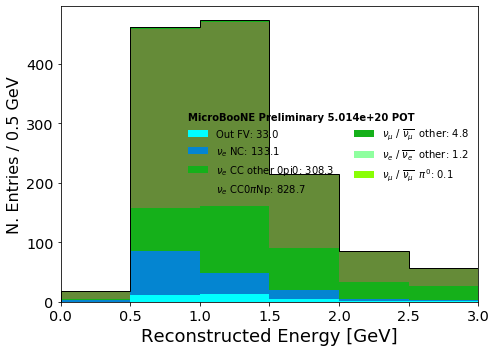

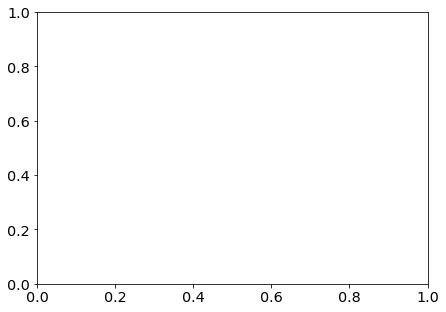

In [80]:

import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_mc.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_mc.iloc[start:end]

    samples = {
        #"nue_nue": nue_nue
        "numu_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21

    # NUE
    weights = { #full sample mc = 0.38
                #"numu_mc"  : mcratio  * SPLIT * scaling
                "numu_mc"  : 1
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    


    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUMU_SEL_QUERY,
        #query= "is_signal == True",
        currentsample = "numu_mc",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        #genieweight = "weightSplineTimesTuneTimesPPFX",  
        genieweight = "totweight_data", 
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

n_events here =  5742

1.0
1
{'numu_mc': 0.25203959042309876}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 and contained_fraction> 0.95 and topological_score > 0.3 and is_signal==True& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 numu_mc
--------------------------------------
current_total  828.7265908690904
828.726590869090387059259228408336639404296875000000000000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  828.7265908690904
828.726590869090387059259228408336639404296875000000000000000000000000000000000


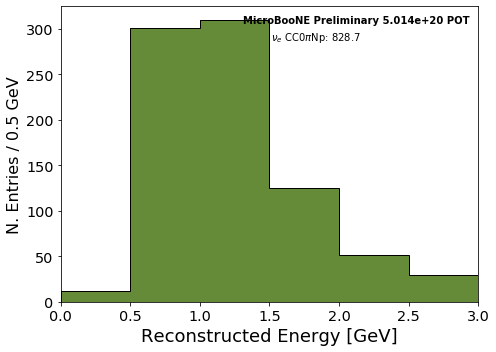

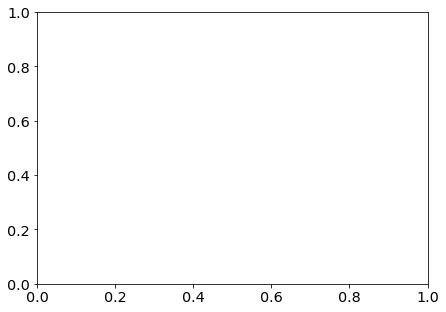

In [87]:
#THE TRUTH THAT WAS SELECTED

import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_mc.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_mc.iloc[start:end]

    samples = {
        #"nue_nue": nue_nue
        "numu_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21

    # NUE
    weights = { #full sample mc = 0.38
                "numu_mc"  : mcratio  * SPLIT * scaling
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= SIGNAL_NUMU_SEL_QUERY,
        #query= "is_signal == True",
        currentsample = "numu_mc",
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "ppfx_cv",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

No handles with labels found to put in legend.


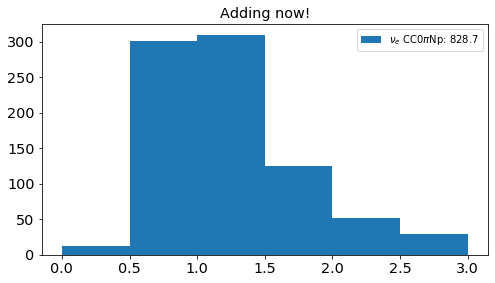

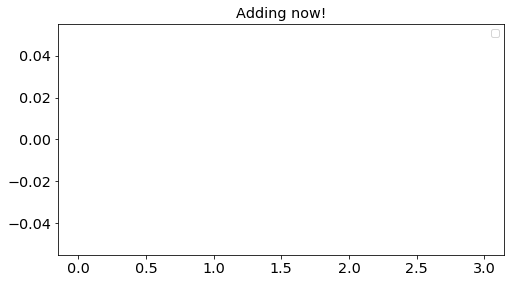

In [88]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    #numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #numu_ax1.set_xlim([-20, 280])    #Vtx X
    #numu_ax1.set_xlim([-140, 140])    #Vtx Y
    #numu_ax1.set_xlim([-10, 1100])    #Vtx Z
    #numu_ax1.set_xlim([-1, 1])    #AngleDiff

    numu_stacked = numu_ax1.hist(
                varss[i].values(),
                weights=list(weightss[i].values()),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [89]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

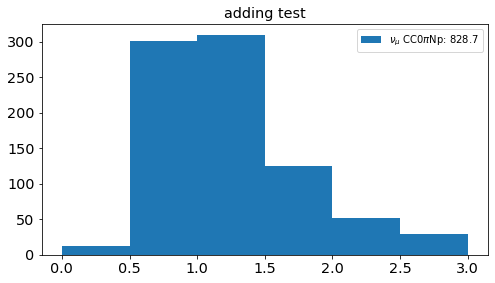

In [90]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


labels = [
            "%s: %.1f" % (category_labels[c], sum(weightss_tot[0][c])) \
            if sum(weightss_tot[0][c]) else ""
            for c in varss[0].keys()
        ]


numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])

#TrueE, LeptonMom
#numu_ax1.set_xlim([0, 5])
#numu_ax1.set_xlim([-20, 280])
#numu_ax1.set_xlim([-140, 140])
#numu_ax1.set_xlim([-10, 1100])
#numu_ax1.set_ylim([0, 1000])

#AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 1000])

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()

In [91]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 3  #3

numu_wanted_list = numu_stacked[0]
#numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

print(numu_wanted_list)

[ 12.31642585 301.20133674 309.14718055 124.98226261  51.18778744
  29.89159768]


In [92]:
ending

'Jan19_noTune'

In [93]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

is_selected = True

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"



if isRun3 == False:
    if (is_selected == True):
        if (variable == "Energy"):
            vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv')
            weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv')
        ########angleDiff
        elif (variable == "Angle"):
            vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_'+ending+'.csv')
            weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_'+ending+'.csv')
        ########leptonMom
        elif (variable == "Lepton"):
            vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_'+ending+'.csv')
            weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_'+ending+'.csv')
    elif (is_selected == False):
        ######full trueE
        if (variable == "Energy"):
            vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_'+ending+'.csv')
            weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_'+ending+'.csv')
        ########angleDiff
        elif (variable == "Angle"):
            vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_'+ending+'.csv')
            weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_'+ending+'.csv')
        ########leptonMom
        elif (variable == "Lepton"):
            vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_'+ending+'.csv')
            weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_'+ending+'.csv')
elif isRun3 == True:
    if (is_selected == True):
        ######full trueE
        if (variable == "Energy"):
            vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv')
            weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv')
        ########angleDiff
        elif (variable == "Angle"):
            vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_'+ending+'.csv')
            weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_'+ending+'.csv')
        ########leptonMom
        elif (variable == "Lepton"):
            vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_'+ending+'.csv')
            weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_'+ending+'.csv')
    elif (is_selected == False):
        ######full trueE
        if (variable == "Energy"):
            vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_'+ending+'.csv')
            weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_'+ending+'.csv')
        ########angleDiff
        elif (variable == "Angle"):
            vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_'+ending+'.csv')
            weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_'+ending+'.csv')
        ########leptonMom
        elif (variable == "Lepton"):
            vars_tot_df.to_csv('numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection_allselected_run3_'+ending+'.csv')
            weights_tot_df.to_csv('numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection_allselected_run3_'+ending+'.csv')
        

### Stat Errors

In [94]:
#numumcstaterrs

# sumw2 of the full event rate 
weight_stat_errs = []

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"


if (variable == "Energy"):
    xvar = "reco_e"
    bins = np.arange(0.0, 3.5, 0.5)
elif (variable == "Angle"):
    xvar = "cosNu_Angle_Numi_Muon_Reco"
    bins = np.arange(-1.0, 1.2, 0.2)
elif (variable == "Lepton"):
    xvar = "muon_mom"
    bins = np.arange(0, 2.25, 0.25)


for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(numu_mc.query(SIGNAL_NUMU_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[2.8386564527570792, 73.44104734671998, 76.89815568848849, 31.049503862479, 12.486631316039839, 7.628302196100372]


In [95]:
if isRun3 == False:
    if (variable == "Energy"):
        np.savetxt("numu_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("numu_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("numu_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    
elif isRun3 == True:
    if (variable == "Energy"):
        np.savetxt("numu_mc_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("numu_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("numu_mc_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_selectedsig_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')


In [96]:
# sumw2 of the full event rate 
weight_stat_errs = []

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"


if (variable == "Energy"):
    xvar = "reco_e"
    bins = np.arange(0.0, 3.5, 0.5)
elif (variable == "Angle"):
    xvar = "cosNu_Angle_Numi_Muon_Reco"
    bins = np.arange(-1.0, 1.2, 0.2)
elif (variable == "Lepton"):
    xvar = "muon_mom"
    bins = np.arange(0, 2.25, 0.25)

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(numu_mc.query(NOT_SIGNAL_NUMU_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[1.4290212322706004, 38.79228373178102, 40.51817864877273, 22.117739523207028, 8.30250655344405, 6.513055318514353]


In [97]:
if isRun3 == False:  
    if (variable == "Energy"):
        np.savetxt("numu_mc_stat_updated_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("numu_mc_stat_updated_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("numu_mc_stat_updated_errs_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')

    
elif isRun3 == True:  
    if (variable == "Energy"):
        np.savetxt("numu_mc_stat_updated_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("numu_mc_stat_updated_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("numu_mc_stat_updated_errs_full_catsel_nopions_leptonMom_usingSelection_notselectedsig_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')


### Sys Errors

In [98]:
#############################
##### weightsgenie ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_mc.shape[0]
print("n_events here = ", n_events)
print("")
batch_size = n_events

n_cv_tots = []
n_tots = []
dfs_genie = []
df_genie_vars = []
df_genie_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_mc.iloc[start:end]

    samples = {
        "numu_mc": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        mcratio   = pot/2.33652e+21
    elif isRun3 == True:
        pot =  5.014e20
        mcratio  = pot/1.98937e+21
    
    weights = {
               "numu_mc"  : mcratio  * SPLIT * scaling 
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"


    
    n_cv_tot, n_tot, df_genie, df_genie_var, df_genie_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_mc",
        typeerr = "standard",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "ppfx_cv",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_genie.append(df_genie)
    df_genie_vars.append(df_genie_var)
    df_genie_splines.append(df_genie_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  5742

1.0
1
{'numu_mc': 0.25203959042309876}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 and contained_fraction> 0.95 and topological_score > 0.3& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
       0     1     2     3     4     5     6     7     8     9    ...   590  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        1     0     0     0     1     0     1     1     1     1  ...     1   
2     1056  1379  1424   925   682   896   900   722   932  1056  ...   847   
3     1819   430  1198   7

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[ 18.3178196  461.8626709  472.68817139 215.0456543   84.77563477
  56.50878906]


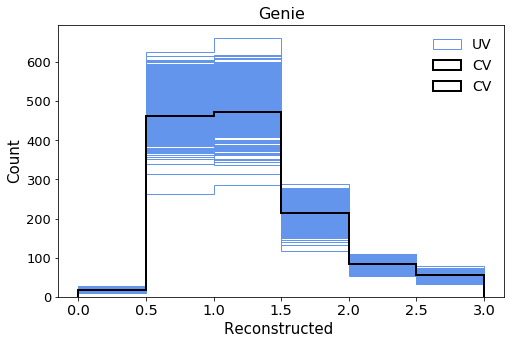

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[0. 0. 0. 0. 0. 0.]


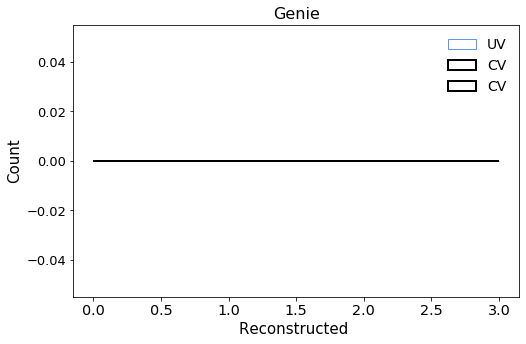

In [99]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    
    variable = "Energy"
    #variable = "Angle"
    #variable = "Lepton"

    if (variable == "Energy"):
        bin_centers = np.arange(0.25, 3.25, 0.5) #energy
        bins = np.arange(0.0, 3.5, 0.5)
    elif (variable == "Angle"):
        bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
        bins = np.arange(-1, 1.2, 0.2)
    elif (variable == "Lepton"):    
        bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
        bins = np.arange(0, 2.25, 0.25)
    

    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Genie', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [100]:
#will need to edit this if batching

numu_mc_genie_detvar_dict = pd.DataFrame(detvar_dicts[0])

if isRun3 == False:
    if (variable == "Energy"):
        numu_mc_genie_detvar_dict.to_csv('numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Angle"):
        numu_mc_genie_detvar_dict.to_csv('numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Lepton"):
        numu_mc_genie_detvar_dict.to_csv('numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    if (variable == "Energy"):
        numu_mc_genie_detvar_dict.to_csv('numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Angle"):
        numu_mc_genie_detvar_dict.to_csv('numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Lepton"):
        numu_mc_genie_detvar_dict.to_csv('numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [101]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)


masterlist.pop(0)
final_ns_numu_mc_genie = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_mc_genie.append(sum(masterlist[a]))

final_ncvs_numu_mc_genie = sum(n_cv_tots)

##################################################

frames = []
for a in range(len(dfs_genie)):
    frames.append(dfs_genie[a][0])
    
    
total_genie_df = pd.concat(frames, ignore_index=True)
#print(total_genie_df)

#-----------------
frames2 = []
for b in range(len(df_genie_vars)):
    frames2.append(df_genie_vars[b][0])
    
    
total_genie_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_genie_df_vars)

#-----------------
frames3 = []
for c in range(len(df_genie_splines)):
    frames3.append(df_genie_splines[c][0])
    
    
total_genie_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_genie_df_splines)


In [102]:
if isRun3 == False:
    if (variable == "Energy"):
        np.savetxt("numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   final_ns_numu_mc_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   final_ncvs_numu_mc_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Angle"):
        np.savetxt("numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   final_ns_numu_mc_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   final_ncvs_numu_mc_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    elif (variable == "Lepton"):
        np.savetxt("numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   final_ns_numu_mc_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   final_ncvs_numu_mc_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')

elif isRun3 == True:
    if (variable == "Energy"):
        np.savetxt("numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   final_ns_numu_mc_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   final_ncvs_numu_mc_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Angle"):
        np.savetxt("numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   final_ns_numu_mc_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   final_ncvs_numu_mc_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    elif (variable == "Lepton"):
        np.savetxt("numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   final_ns_numu_mc_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   final_ncvs_numu_mc_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_mc_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')


## NUMU_NUE SAMPLE

In [6]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#NU   = '/pre_samp/prodgenie_numi_uboone_overlay_fhc_mcc9_run1_v28_all_snapshot'    +ls.APPEND #newTune
#full sample
if isRun3 == False:
    NUE   = '/neutrinoselection_filt_run1_overlay_intrinsic'    +ls.APPEND #newTune
elif isRun3 == True:
    NUE   = '/neutrinoselection_filt_run3b_overlay_intrinsic'    +ls.APPEND   

#actually fetch datasets
numu_nue  = uproot.open(ls.ntuple_path+NUE+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [numu_nue]

numu_variables = [
        "nu_pdg", "slpdg", "backtracked_pdg", "trk_score_v", #"trk_pfp_id",
        "category", "ccnc", "swtrig_pre", "trk_len_v",
        "run","sub","evt", "hits_ratio",
        "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
        "flash_pe", "contained_fraction",
        "trk_llr_pid_score_v", # trk-PID score
        "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
        "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
        "nmuon", "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance", "n_tracks_contained",
        "reco_e", "shr_energy_tot_cali", "trk_energy_tot",
        "nproton", "slnunhits", "slnhits", "true_e_visible",
        "npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
        "pi0_e", "evnunhits", "nslice", "interaction",
        "slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z",
        "topological_score", "proton_e", "elec_e",
        "isVtxInFiducial", "trk_sce_end_x_v", "trk_sce_end_y_v", "trk_sce_end_z_v", "trk_sce_start_x_v",
        "trk_theta", "trk_phi", "trk_energy_muon", "trk_range_muon_mom_v", "trk_mcs_muon_mom_v"
        #"theta", # angle between incoming and outgoing leptons in radians
    ]


# These are examples of variables present in MC samples only
numu_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "theta", "mc_pdg", "mc_px", "mc_py", "mc_pz", "mc_E"]


#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
numu_variables = list(set(numu_variables))
print(numu_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

#redefine reco e to match nue?

['n_tracks_contained', 'sub', 'nmuon', 'trk_theta', 'CosmicIPAll3D', 'reco_e', 'reco_nu_vtx_z', 'trk_energy_muon', 'n_showers_contained', 'elec_e', 'nu_pdg', 'trk_sce_end_x_v', 'CosmicIP', 'slnhits', 'reco_nu_vtx_y', 'tksh_distance', 'slpdg', 'reco_nu_vtx_sce_z', 'pi0truth_elec_etot', 'category', 'reco_nu_vtx_sce_x', 'swtrig_pre', '_opfilter_pe_veto', 'shr_energy_tot_cali', 'slnunhits', 'pion_e', 'npion', 'contained_fraction', 'shr_tkfit_dedx_Y', 'nslice', 'evt', 'trk_score_v', 'reco_nu_vtx_x', 'npi0', 'evnunhits', 'hits_ratio', 'isVtxInFiducial', 'trk_sce_end_y_v', 'trk_llr_pid_score_v', 'pi0_e', 'proton_e', 'trk_phi', 'backtracked_pdg', 'ccnc', 'nproton', 'trk_len_v', 'slclustfrac', 'interaction', 'trk_sce_start_x_v', 'muon_e', 'trk_energy_tot', 'CosmicDirAll3D', 'true_e_visible', '_opfilter_pe_beam', 'topological_score', 'trk_sce_end_z_v', 'trk_range_muon_mom_v', 'run', 'reco_nu_vtx_sce_y', 'flash_pe', 'trk_mcs_muon_mom_v']


In [7]:
import time
s = time.time()

import pandas as pandas

mc_var   = numu_variables + WEIGHTS + MCFVARS + SYSTEMATICS + PPFX + numu_varMC

# This needs modifications (add variables from above)
uproot_v = [numu_nue] 
var_v    = [mc_var] 


for ii, CV in enumerate(uproot_v):
    CVDF  = CV.pandas.df(var_v[ii], flatten=False)
    load_data_run123.process_uproot_numu(CV,CVDF)
    if ii == 0:
        numu_nue = CVDF

s2 = time.time()

print("runtime = ", s2-s)
#approx 3 min run time

trk_llr_pid_v  [[] [0.9666763 -0.719473 0.060430408] [] ... [0.97915584 0.7269334 0.8898669 0.8696907 0.034845557] [0.91841215] [0.94740224 0.49518612 -0.80356586]]
trk_score_v  [[] [0.0079865 0.9083336 0.7453113] [] ... [0.75372183 0.009209481 0.0009818858 0.00784404 0.76096046] [0.0024736477] [0.0027802433 0.7662299 0.91859746]]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


updated proton mask test
runtime =  40.04327893257141


In [7]:
#df_v = [numu_nue]
#print(df_v)
#removeGenieTune = False
#for i,df in enumerate(df_v):
#    df[ 'currentweightsafe' ] = df['weightSplineTimesTune']
#    df[ 'currentweight' ] = df['weightSplineTimesTune']

In [8]:
df_v = [numu_nue]
for i,df in enumerate(df_v):  
    df["bnbdata"] = np.zeros_like(df["isVtxInFiducial"])
    df["extdata"] = np.zeros_like(df["isVtxInFiducial"])

In [9]:

numu_nue.query("nu_e > 0 and nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)\
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0", inplace=True)
#numu_mc.query("nu_e > 0", inplace=True)

In [10]:
s = time.time()

df_v = [numu_nue]
#removeGenieTune = False
for i,df in enumerate(df_v):
    #df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    #df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    #df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    #df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.    
    
    #df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    #df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    #df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    #df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 
    #df[ 'weightSplineTimesTuneTimesPPFX' ] = df[ 'weightSplineTimesTune' ]*df['ppfx_cv']
    
    #df.loc[ df['weightSpline'] <= 0, 'weightSpline' ] = 1.
    #df.loc[ df['weightSpline'] == np.inf, 'weightSpline' ] = 1.
    #df.loc[ df['weightSpline'] > 100, 'weightSpline' ] = 1.
    #df.loc[ np.isnan(df['weightSpline']) == True, 'weightSpline' ] = 1. 
    #df[ 'weightSplineTimesPPFX' ]  = df[ 'weightSpline' ]*df['ppfx_cv']
    
    
     # Cray cray weight fix
    for ievt in range(df.shape[0]):
        reweightCondition = ((df['weightsGenie'].iloc[ievt] > 3000) | (df['weightsGenie'].iloc[ievt] < 0)  | 
                             (df['weightsGenie'].iloc[ievt] == np.inf))
        df['weightsGenie'].iloc[ievt][ reweightCondition ] = 1.
    
    
s2 = time.time()
print("runtime = ", s2-s)
#Run1 = 13 mins
#Run3 = 

runtime =  0.018261194229125977


In [11]:
#df_v = [numu_nue]
#removeGenieTune = False
#for i,df in enumerate(df_v):
#    df[ 'currentweight' ] = df['weightSplineTimesTuneTimesPPFX']
#    df[ 'currentweightsafe' ] = df['weightSplineTimesTuneTimesPPFX']
#    df[ 'currentweightsafe2' ] = df['weightSplineTimesTuneTimesPPFX']
#    df[ 'currentweight2' ] = df['weightSplineTimesTuneTimesPPFX']

In [12]:
#df_v = [numu_nue]
#scaleFlat = 0
##removeGenieTune = False
#for i,df in enumerate(df_v):
#    if scaleFlat == 1:
#        df['weightSplineTimesTuneTimesPPFX'] = df[ 'currentweight' ] 
#        df.loc[ df['npi0'] > 0, 'weightSplineTimesTuneTimesPPFX' ] =  (df['weightSplineTimesTuneTimesPPFX'] * 0.759)
#    elif scaleFlat == 2:
#        df['weightSplineTimesTune'] = df[ 'currentweight' ] 
#        pi0emax = 0.6
#        df.loc[ (df['pi0_e'] > 0.1) & (df['pi0_e'] < pi0emax) , 'weightSplineTimesTuneTimesPPFX'] = df['weightSplineTimesTuneTimesPPFX']*(1.-0.4*df['pi0_e'])
#        df.loc[ (df['pi0_e'] > 0.1) & (df['pi0_e'] >= pi0emax), 'weightSplineTimesTuneTimesPPFX'] = df['weightSplineTimesTuneTimesPPFX']*(1.-0.4*pi0emax)
#    elif scaleFlat == 0:
#        df['weightSplineTimesTuneTimesPPFX'] = df[ 'currentweight' ]

In [13]:
if isRun3 == False:
    beamon_pot = 2.0E20 #v5
    intrinsic_pot =  2.37838E22
elif isRun3 == True:
    beamon_pot = 5.014E20
    intrinsic_pot =   2.5345e+22   

numu_nue['pot_scale'] = beamon_pot/intrinsic_pot

In [14]:
numu_nue['totweight_data'] = numu_nue['pot_scale']*numu_nue['ppfx_cv']
print(numu_nue['totweight_data'])

entry
21        0.020693
613       0.010097
1452      0.019289
1746      0.021187
2211      0.007881
            ...   
123753    0.010743
123780    0.019552
123790    0.020038
123902    0.020616
123924    0.009042
Name: totweight_data, Length: 444, dtype: float64


In [15]:
df_v = [numu_nue]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'noW' ] = 1

In [16]:
s = time.time()

def energyToPxyz(energy, theta, phi, mask, mass = 0.93827208816):
    if all(~mask):
        return (0.,0.,0.)
    energy = energy.copy()[mask]
    theta  = theta.copy()[mask]
    phi    = phi.copy()[mask]
    
    p  = np.sqrt((energy+mass)*(energy+mass) - mass*mass)
    pz = p*np.cos(theta)
    px = p*np.sin(theta)*np.cos(phi)
    py = p*np.sin(theta)*np.sin(phi)
    return( px.sum(), py.sum(), pz.sum())



for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    ############ muon part
    mu_px_v            = up.array('shr_px')
    mu_py_v            = up.array('shr_py')
    mu_pz_v            = up.array('shr_pz')
    pt_v                = up.array('pt')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    
    
    #shr_mask = (trk_score_v<0.5)
    trk_mask      = (trk_score_v>0.5)
    proton_mask_v = (trk_score_v>0.5)&(trk_llr_pid_v < 0.)
    sillyCount = 0
    listPx,listPy,listPz = [],[],[]
    
    for mask, theta_t, phi_t, energy_t,proton_mask_v_t,sx,sy,sz,pttt  in zip(proton_mask_v, trk_theta_proton_v,trk_phi_proton_v, trk_energy_proton_v,proton_mask_v, mu_px_v,mu_py_v,mu_pz_v,pt_v):
        tempMom = energyToPxyz(energy_t,theta_t,phi_t,proton_mask_v_t) 
        nu_reco_px = tempMom[0] + sx 
        nu_reco_py = tempMom[1] + sy  
        nu_reco_pz = tempMom[2] + sz  
        listPx.append(nu_reco_px)
        listPy.append(nu_reco_py)
        listPz.append(nu_reco_pz)

s2 = time.time()

print("runtime = ", s2-s)

runtime =  2.4261724948883057


In [17]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [18]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [19]:
df_v = [numu_nue]
#removeGenieTune = False
for i,df in enumerate(df_v):
    print(df['trk_mcs_muon_mom_v'])

entry
21                     [0.74599445, 0.09300001, 0.12600008]
613                    [0.21200025, 0.34899905, 0.24800032]
1452                       [0.570996, 14.999432, 14.999432]
1746                               [0.33499923, 0.12200007]
2211                              [0.42199785, 0.110000044]
                                ...                        
123753    [0.8619925, 0.12600008, 0.71599436, 0.25400028...
123780                   [0.62999547, 0.24700032, 0.745994]
123790    [0.29699966, 0.4379979, 0.26500008, 14.999432,...
123902       [0.17900018, 0.7829953, 0.37699842, 0.2590002]
123924                               [0.15600014, 0.745994]
Name: trk_mcs_muon_mom_v, Length: 444, dtype: object


In [20]:
#RECO VARIABLE
s = time.time()

print(df["trk_sce_end_z_v"])

for i,df in enumerate(df_v):
    df["muon_mom"] = df["trk_sce_end_z_v"].copy()
    for j, row in df.iterrows():
        if (len(row["muon_mom"]) !=0 ) and (df["trk_sce_end_z_v"][j][0] < 1036.8 and df["trk_sce_end_z_v"][j][0] > 0 and df["trk_sce_end_y_v"][j][0] < 116.5 and df["trk_sce_end_y_v"][j][0] > -116.5 and df["trk_sce_end_x_v"][j][0] < \
         254.8 and df["trk_sce_end_x_v"][j][0] > -1.55):
            df.loc[j, "muon_mom"] = df["trk_range_muon_mom_v"][j][0]
        elif (len(row["muon_mom"]) == 0 ):
            df.loc[j, "muon_mom"] = 0
        else:
            df.loc[j, "muon_mom"] = df["trk_mcs_muon_mom_v"][j][0]  #mcs == multiple coulob scattering
        
print(df["muon_mom"])
print("")
s2 = time.time()
print("runetime = ", s2-s)


entry
21                         [927.7503, 777.48627, 768.25916]
613                        [449.10638, 429.06036, 437.3787]
1452                         [932.5985, 935.1153, 821.6419]
1746                                  [435.49133, 412.6605]
2211                                  [877.65076, 848.9412]
                                ...                        
123753    [178.6571, 153.41556, 157.90085, 143.6084, 152...
123780                       [312.5676, 317.47983, 294.509]
123790    [251.26093, 124.37225, 110.46726, 91.18728, 90...
123902          [988.60895, 965.48956, 905.74304, 864.5555]
123924                               [365.57162, 356.34222]
Name: trk_sce_end_z_v, Length: 444, dtype: object
entry
21          0.6633
613       0.252832
1452      0.416117
1746      0.253437
2211      0.416197
            ...   
123753    0.181204
123780    0.238133
123790    0.591585
123902    0.328489
123924    0.184916
Name: muon_mom, Length: 444, dtype: object

runetime =  0.25570559501

In [21]:
#RECO VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['nu_Angle_Numi_Muon_Reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['trk_theta'],x['trk_phi']) , axis=1)
    df['cosNu_Angle_Numi_Muon_Reco'] = np.cos(df['nu_Angle_Numi_Muon_Reco'])

In [22]:
#Calculate the total KE of all protons
#proton_e is only that of the highest energy proton

s = time.time()

Mp = 0.938272046
df_v = [numu_nue]

for entry in df_v:
    # Each of the things here is a column of arrays
    # First, set everywhere that is 2212 = True and False otherwise
    mask_2 = entry["mc_pdg"].apply(lambda x: np.array(2212 == x))
    # Now find which entries contain a 2212 value
    mask_1 = mask_2.apply(lambda x: np.any(x))
    # Next do the maths to the entries (we'll mask out unwanted bits later)
    mask_3 = entry["mc_E"].apply(lambda x: np.array(x > (0.04 + Mp)))
    # As the contents of mask_2 and mask_3 are arrays, this * operation
    # will multiply every element of mask_2 by every element of mask_3
    # Essentially performing an elementwise AND on every element
    mask_4 = mask_2 * mask_3
    # Default value => 0 where no mask is true
    entry["proton_total_KE"] = np.zeros_like(entry["proton_e"].values)
    # Finally for every place mask_4 applies, we want the mc_E value less Mp summed
    nums = (((entry.loc[:, "mc_E"] - Mp) * mask_4)).apply(lambda x: np.sum(x))
    # And finally, plonk this value into the dataframe
    entry.loc[mask_1, "proton_total_KE"] = nums[mask_1]

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  0.014866352081298828


In [23]:
for i,df in enumerate(df_v):
    df["reco_e"] = df["trk_energy_muon"] + df["trk_energy_tot"] + 0.105
    df["true_e"] = df["muon_e"] + df["proton_total_KE"]

In [24]:
numu_nue   = numu_nue.query('nu_e > 0.')
#numu_mc.query("nu_e > 0.", inplace=True)

# Calculate the true neutrino direction off of the NuMI beam, needed for plotting. Seem to be from MC
dfmc_v = [numu_nue]
for i,df in enumerate(dfmc_v):
    df['numi_nu_true_Angle'] = df.apply( lambda x: GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) , axis=1)
    #df['weightsNuMIGeo']     = df.apply( lambda x: numiBeamlineGeoWeights.calculateGeoWeight(x['nu_pdg'],x['nu_e'],x['numi_nu_true_Angle']) , axis=1)

Setup complete.

In [25]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1


samples = {
    "numu_nue" : numu_nue
}


if isRun3 == False:
    pot =  2e+20 
    nueratio  = pot/2.37838e+22 
elif isRun3 == True:
    pot =  5.014e20
    nueratio  = pot/2.5345e+22


SPLIT = 1.0
scaling = 1

weights = { 
            "numu_nue"  : nueratio  * SPLIT * scaling   
}

my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
print(weights)

{'numu_nue': 0.01978299467350562}


In [26]:

dfmc_v = [numu_nue]

for i,df in enumerate(dfmc_v):

    df['is_signal'] = np.where( (df.swtrig_pre==1) 
                                 & (df.nu_pdg==14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)

    df.loc[ (df['is_signal']== True), 'category' ] = 1
    

In [27]:
#New categories

for i,df in enumerate(dfmc_v):
            
    #df.loc[ (df['is_signal']== True), 'category' ] = 1
    #df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
    #                             & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
    #                             & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where((df.swtrig_pre==1)&  (df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["nue_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_CC_Npi0']== True), 'category' ] = 3
    df["nue_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['nue_CC_0pi0']== True), 'category' ] = 4
    
    df["nue_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_NC_Npi0']== True), 'category' ] = 5
    df["nue_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['nue_NC_Npi0']== True), 'category' ] = 6
    
    df["numubar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['numubar_1eNp']== True), 'category' ] = 7
    df["numu_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1), True, False)
    df.loc[ (df['numu_NC']== True), 'category' ] = 8
    
    df["numu_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['numu_CCother']== True), 'category' ] = 9

    # less specific categories 
    df["numu_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.numubar_1eNp==False) & (df.numu_NC==False) & (df.numu_CCother==False), True, False)
    df.loc[ (df['numu_other']== True), 'category' ] = 10
    df["nue_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==12)) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_Npi0']== True), 'category' ] = 11
    df["nue_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==12)) &  (df.npi0==0), True, False)
    df.loc[ (df['nue_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.nue_CC_Npi0==False)
                             & (df.nue_CC_0pi0==False) & (df.nue_NC_Npi0==False) & (df.nue_NC_0pi0==False)
                             & (df.numubar_1eNp==False) & (df.numu_NC==False) & (df.numu_CCother==False)
                             & (df.numu_other==False) & (df.nue_Npi0==False) & (df.nue_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

In [28]:
NUMU_SEL_QUERY = "nslice == 1 and ( (_opfilter_pe_beam > 0 \
and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0  and n_protons_tot > 0 and n_showers_contained==0  \
and contained_fraction> 0.95 and topological_score > 0.3"


SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
SIGNAL_NUMU_SEL_QUERY += ' and is_signal==True'

NOT_SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
NOT_SIGNAL_NUMU_SEL_QUERY += ' and is_signal==False'

In [29]:
test = np.nansum(numu_nue.query(NUMU_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

test = np.nansum(numu_nue['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 3.383358574243522
total signal events = 7.710328629301788


In [30]:
#This deals with any overflow. Have done all bins, even where overflow shouldn't be possible for comepleteness

#ENERGY
tmp = df["reco_e"].copy()
mask = (df["reco_e"] > 3)
tmp[mask] = 2.75
df["reco_e"] = tmp
print(df["reco_e"])
#------
tmp = df["reco_e"].copy()
mask = (df["reco_e"] < 0)
tmp[mask] = 0.25
df["reco_e"] = tmp
print(df["reco_e"])

#ANGLE
tmp = df["cosNu_Angle_Numi_Muon_Reco"].copy()
mask = (df["cosNu_Angle_Numi_Muon_Reco"] > 1)
tmp[mask] = 0.9
df["cosNu_Angle_Numi_Muon_Reco"] = tmp
print(df["cosNu_Angle_Numi_Muon_Reco"])
#------
tmp = df["cosNu_Angle_Numi_Muon_Reco"].copy()
mask = (df["cosNu_Angle_Numi_Muon_Reco"] < -1)
tmp[mask] = -0.9
df["cosNu_Angle_Numi_Muon_Reco"] = tmp
print(df["cosNu_Angle_Numi_Muon_Reco"])

#LEPTON
tmp = df["muon_mom"].copy()
mask = (df["muon_mom"] > 2)
tmp[mask] = 1.875
df["muon_mom"] = tmp
print(df["muon_mom"])
#------
tmp = df["muon_mom"].copy()
mask = (df["muon_mom"] < 0)
tmp[mask] = 0.125
df["muon_mom"] = tmp
print(df["muon_mom"])


entry
21        1.701468
613       0.870904
1452      1.101576
1746      0.729106
2211      0.263150
            ...   
123753    0.876869
123780    0.944183
123790    1.842752
123902    1.796500
123924    0.583300
Name: reco_e, Length: 444, dtype: float32
entry
21        1.701468
613       0.870904
1452      1.101576
1746      0.729106
2211      0.263150
            ...   
123753    0.876869
123780    0.944183
123790    1.842752
123902    1.796500
123924    0.583300
Name: reco_e, Length: 444, dtype: float32
entry
21        0.851586
613       0.513485
1452      0.365643
1746      0.491183
2211     -0.153037
            ...   
123753    0.769361
123780    0.666251
123790    0.855093
123902    0.820299
123924    0.899857
Name: cosNu_Angle_Numi_Muon_Reco, Length: 444, dtype: float64
entry
21        0.851586
613       0.513485
1452      0.365643
1746      0.491183
2211     -0.153037
            ...   
123753    0.769361
123780    0.666251
123790    0.855093
123902    0.820299
123924    0.8

Now plot.

n_events here =  444

1.0
1
{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0  and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score > 0.3& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 numu_nue
--------------------------------------
current sample is:  numu_nue
current_total  3.383358574243522
3.383358574243521932345402092323638498783111572265625000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  3.383358574243522
3.38335857424352193234540209232363849878311157226562500000000000000000

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


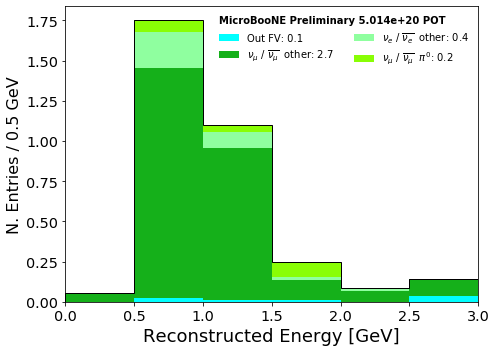

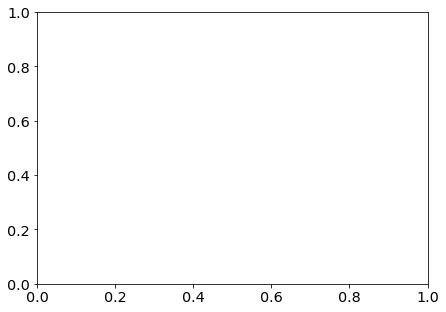

In [55]:
#The numu_nue plot 

import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_nue.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events

varss = []
weightss = []
labss = []
if n_events > 0:
    print(n_events/batch_size)
    print(int(n_events/batch_size))

    for i in range(int(n_events/batch_size)+1):
        start = i*batch_size
        if (start + batch_size) < n_events:
            end = start + batch_size
        else:
            end = n_events
        sample_set = numu_nue.iloc[start:end]

        samples = {
            "numu_nue": sample_set 
        }


        scaling = 1
        if isRun3 == False:
            pot =  2e+20 
            nueratio  = pot/2.37838e+22 
        elif isRun3 == True:
            pot =  5.014e20
            nueratio  = pot/2.5345e+22 

        # NUE
        weights = { #full sample mc = 0.38
                    "numu_nue"  : nueratio  * SPLIT * scaling
        }


        my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
        print(weights)


        #Now check on a variable
        #Remember to change the plotter keys between truth and mc
        
        VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
        #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
        #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"

        
        var, weight, label = my_plotter.plot_variable(
            VARIABLE,
            query= NUMU_SEL_QUERY,
            #query= "",
            currentsample = "numu_nue",
            kind="event_category",
            draw_sys  = True, 
            draw_geoSys = True, 
            draw_data = True,
            ratio=False,
            genieweight = "ppfx_cv",  
            stacksort=3,
            title=XTIT,
            bins=BINS,
            range=RANGE
        )[0:3]

        varss.append(var)
        weightss.append(weight)
        labss.append(label)

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
No handles with labels found to put in legend.


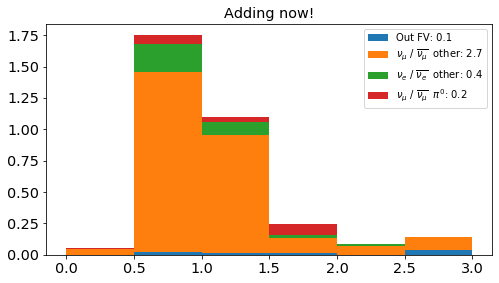

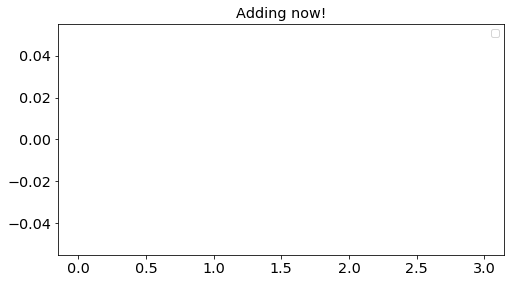

In [56]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    #numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #numu_ax1.set_xlim([-20, 280])    #Vtx X
    #numu_ax1.set_xlim([-140, 140])    #Vtx Y
    #numu_ax1.set_xlim([-10, 1100])    #Vtx Z
    #numu_ax1.set_xlim([-1, 1])    #AngleDiff

    numu_stacked = numu_ax1.hist(
                varss[i].values(),
                weights=list(weightss[i].values()),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [57]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

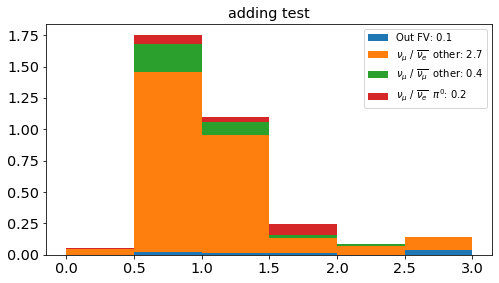

In [58]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


labels = [
            "%s: %.1f" % (category_labels[c], sum(weightss_tot[0][c])) \
            if sum(weightss_tot[0][c]) else ""
            for c in varss[0].keys()
        ]


numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])

#TrueE, LeptonMom
#numu_ax1.set_xlim([0, 5])
#numu_ax1.set_xlim([-20, 280])
#numu_ax1.set_xlim([-140, 140])
#numu_ax1.set_xlim([-10, 1100])
#numu_ax1.set_ylim([0, 1000])

#AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 1000])

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()

In [59]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"

if isRun3 == False:
    ######full true
    if (variable == "Energy"):
        vars_tot_df.to_csv('numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        weights_tot_df.to_csv('numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    ########angleDiff
    elif (variable == "Angle"):
        vars_tot_df.to_csv('numu_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        weights_tot_df.to_csv('numu_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    ########leptonMom
    elif (variable == "Lepton"):
        vars_tot_df.to_csv('numu_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        weights_tot_df.to_csv('numu_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
elif isRun3 == True:
    ######full true
    if (variable == "Energy"):
        vars_tot_df.to_csv('numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        weights_tot_df.to_csv('numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    ########angleDiff
    elif (variable == "Angle"):
        vars_tot_df.to_csv('numu_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        weights_tot_df.to_csv('numu_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    ########leptonMom
    elif (variable == "Lepton"):
        vars_tot_df.to_csv('numu_nue_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        weights_tot_df.to_csv('numu_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')

### Stat Errors

In [60]:
#numunuestat

# sumw2 of the full event rate 
weight_stat_errs = []

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"


if (variable == "Energy"):
    xvar = "reco_e"
    bins = np.arange(0.0, 3.5, 0.5)
elif (variable == "Angle"):
    xvar = "cosNu_Angle_Numi_Muon_Reco"
    bins = np.arange(-1.0, 1.2, 0.2)
elif (variable == "Lepton"):
    xvar = "muon_mom"
    bins = np.arange(0, 2.25, 0.25)


for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(numu_nue.query(NUMU_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[0.0009308681431504374, 0.030942502499532495, 0.020281931735299012, 0.004398465011495605, 0.0014561633016466073, 0.002984721255123893]


In [61]:
if isRun3 == False:    
    if (variable == "Energy"):
        np.savetxt("numu_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"): 
        np.savetxt("numu_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection__"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("numu_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')

elif isRun3 == True:  
    if (variable == "Energy"):
        np.savetxt("numu_nue_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"): 
        np.savetxt("numu_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("numu_nue_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')


### Sys Errors

In [62]:
#############################
##### weightsgenie ###########  NUE
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_nue.shape[0]
print("n_events here = ", n_events)
print("")
batch_size = n_events

n_cv_tots = []
n_tots = []
dfs_genie = []
df_genie_vars = []
df_genie_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_nue.iloc[start:end]

    samples = {
        "numu_nue": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 
        nueratio  = pot/2.37838e+22 
    elif isRun3 == True:
        pot =  5.014e20
        nueratio  = pot/2.5345e+22 
    
    weights = {
               "numu_nue"  : nueratio  * SPLIT * scaling 
    }


    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    

    
    n_cv_tot, n_tot, df_genie, df_genie_var, df_genie_spline, detvar_dict = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_nue",
        typeerr = "standard",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse=500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "ppfx_cv",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_genie.append(df_genie)
    df_genie_vars.append(df_genie_var)
    df_genie_splines.append(df_genie_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  444

1.0
1
{'numu_nue': 0.01978299467350562}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0  and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score > 0.3& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
      0     1     2     3     4     5     6     7     8     9    ...   590  \
0     734   324   180  1677   519   563  1361   667  1585   547  ...   836   
1    1449  1021   842  1339  1057  1564  1132  1198  1384  1362  ...  1472   
2     684   346   278  1444   212  2213   382  1074   505  1386  ...   955   
3     547   437   276  1144 

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[0.05697891 1.75001323 1.09904277 0.24690199 0.08789825 0.14252329]


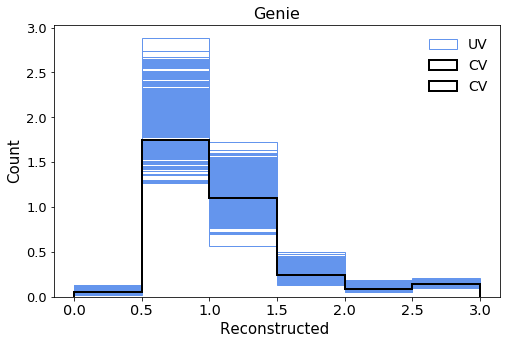

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[0. 0. 0. 0. 0. 0.]


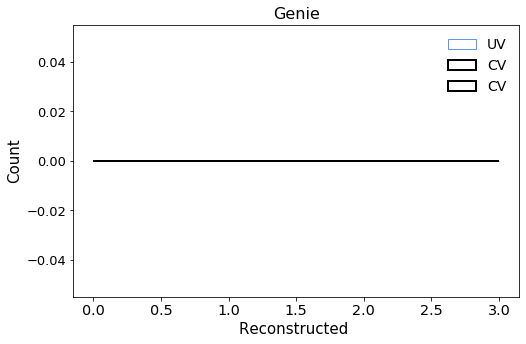

In [63]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    
    variable = "Energy"
    #variable = "Angle"
    #variable = "Lepton"

    if (variable == "Energy"):
        bin_centers = np.arange(0.25, 3.25, 0.5) #energy
        bins = np.arange(0.0, 3.5, 0.5)
    elif (variable == "Angle"):
        bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
        bins = np.arange(-1, 1.2, 0.2)
    elif (variable == "Lepton"):    
        bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
        bins = np.arange(0, 2.25, 0.25)
    
    

    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Genie', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)


    plt.show()

In [64]:
#will need to edit this if batching

numu_nue_genie_detvar_dict = pd.DataFrame(detvar_dicts[0])

if isRun3 == False:
    if (variable == "Energy"):
        numu_nue_genie_detvar_dict.to_csv('numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Angle"):
        numu_nue_genie_detvar_dict.to_csv('numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Lepton"):
        numu_nue_genie_detvar_dict.to_csv('numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    if (variable == "Energy"):
        numu_nue_genie_detvar_dict.to_csv('numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Angle"):
        numu_nue_genie_detvar_dict.to_csv('numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Lepton"):
        numu_nue_genie_detvar_dict.to_csv('numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [65]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)


masterlist.pop(0)
final_ns_numu_nue_genie = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_nue_genie.append(sum(masterlist[a]))

final_ncvs_numu_nue_genie = sum(n_cv_tots)

##################################################

frames = []
for a in range(len(dfs_genie)):
    frames.append(dfs_genie[a][0])
    
    
total_genie_df = pd.concat(frames, ignore_index=True)
#print(total_genie_df)

#-----------------
frames2 = []
for b in range(len(df_genie_vars)):
    frames2.append(df_genie_vars[b][0])
    
    
total_genie_df_vars = pd.concat(frames2, ignore_index=False)
#print(total_genie_df_vars)

#-----------------
frames3 = []
for c in range(len(df_genie_splines)):
    frames3.append(df_genie_splines[c][0])
    
    
total_genie_df_splines = pd.concat(frames3, ignore_index=False)
#print(total_genie_df_splines)


In [66]:
if isRun3 == False:
    if (variable == "Energy"):
        np.savetxt("numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   final_ns_numu_nue_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   final_ncvs_numu_nue_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Angle"):
        np.savetxt("numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   final_ns_numu_nue_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   final_ncvs_numu_nue_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    elif (variable == "Lepton"):
        np.savetxt("numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   final_ns_numu_nue_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   final_ncvs_numu_nue_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        
elif isRun3 == True:
    if (variable == "Energy"):
        np.savetxt("numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   final_ns_numu_nue_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   final_ncvs_numu_nue_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Angle"):
        np.savetxt("numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   final_ns_numu_nue_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   final_ncvs_numu_nue_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    elif (variable == "Lepton"):
        np.savetxt("numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   final_ns_numu_nue_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   final_ncvs_numu_nue_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_nue_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')


## NUMU_DIRT SAMPLE

In [5]:
# Name of the TTree in the PeLEE Ntuples
tree = "NeutrinoSelectionFilter"

#cut samples
#DRT  = '/pre_samp/neutrinoselection_filt_run1_dirt_overlay'        +ls.APPEND
#full sample
if isRun3 == False:
    DRT  = '/prodgenie_numi_uboone_overlay_dirt_fhc_mcc9_run1_v28_all_snapshot'  +ls.APPEND
elif isRun3 == True:
    DRT  = '/neutrinoselection_filt_run3b_dirt_overlay'  +ls.APPEND

#actually fetch datasets
numu_dirt  = uproot.open(ls.ntuple_path+DRT+".root")[ls.fold][tree]

# Define a list that contains the data sets
uproot_v = [numu_dirt]

numu_variables = [
        "nu_pdg", "slpdg", "backtracked_pdg", #"trk_score_v", "trk_pfp_id",
        "category", "ccnc", "swtrig_pre",
        "run","sub","evt", "contained_fraction",
        "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
        "flash_pe",
        "trk_llr_pid_score_v", # trk-PID score
        "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
        "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
        "nmuon", "n_showers_contained", "shr_tkfit_dedx_Y", "tksh_distance",
        "reco_e", "shr_energy_tot_cali", "trk_energy_tot",
        "nproton", "slnunhits", "slnhits", "true_e_visible",
        "npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
        "pi0_e", "evnunhits", "nslice", "interaction",
        "slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z",
        "topological_score", "proton_e", "elec_e",
        "isVtxInFiducial", "trk_sce_end_x_v", "trk_sce_end_y_v", "trk_sce_end_z_v", "trk_sce_start_x_v",
        "trk_theta", "trk_phi", "trk_energy_muon", "trk_range_muon_mom_v", "trk_mcs_muon_mom_v"
        #"theta", # angle between incoming and outgoing leptons in radians
    ]


# These are examples of variables present in MC samples only
numu_varMC = ["nu_e", "true_pt","true_pt_visible","true_p","true_p_visible","true_nu_vtx_t","true_nu_vtx_x","true_nu_vtx_y","true_nu_vtx_z","true_nu_vtx_sce_x","true_nu_vtx_sce_y","true_nu_vtx_sce_z\
","true_nu_px","true_nu_py","true_nu_pz", "theta", "mc_pdg", "mc_px", "mc_py", "mc_pz", "mc_E"]


#make the list unique (sometimes you repeat the variable name in the list, this takes care of that)
numu_variables = list(set(numu_variables))
print(numu_variables)



# These weights are needed to correctly calculate the CV for the MC    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune","ppfx_cv"]
# These weights are needed to calculate the Flux, GENIE and Geant4 Systematics. 
# For NuMI weightsFlux should always be 1 (cause that's relevant for BNB).
SYSTEMATICS = ['weightsFlux','weightsGenie','weightsReint'] 
PPFX        = ['weightsPPFX'] 



WEIGHTSLEE = ["weightSpline","weightTune","weightSplineTimesTune", "leeweight"]#, "weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS    = ["mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
              "mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
              "mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]

['topological_score', 'category', 'pion_e', 'contained_fraction', 'reco_nu_vtx_z', 'slclustfrac', '_opfilter_pe_veto', 'trk_sce_end_y_v', 'flash_pe', 'trk_sce_end_x_v', 'reco_nu_vtx_sce_y', 'shr_energy_tot_cali', 'shr_tkfit_dedx_Y', 'tksh_distance', 'trk_sce_end_z_v', 'trk_range_muon_mom_v', 'nslice', 'trk_phi', 'run', 'sub', 'pi0_e', 'proton_e', 'evt', 'CosmicDirAll3D', 'trk_energy_tot', 'npi0', 'muon_e', 'backtracked_pdg', 'evnunhits', 'ccnc', 'isVtxInFiducial', 'npion', 'reco_e', '_opfilter_pe_beam', 'trk_energy_muon', 'reco_nu_vtx_sce_z', 'nmuon', 'trk_llr_pid_score_v', 'reco_nu_vtx_y', 'CosmicIPAll3D', 'true_e_visible', 'slnunhits', 'slpdg', 'reco_nu_vtx_sce_x', 'nproton', 'slnhits', 'pi0truth_elec_etot', 'trk_theta', 'elec_e', 'CosmicIP', 'interaction', 'reco_nu_vtx_x', 'trk_mcs_muon_mom_v', 'swtrig_pre', 'nu_pdg', 'trk_sce_start_x_v', 'n_showers_contained']


In [6]:
import time
s = time.time()

import pandas as pandas

dirt_var = numu_variables + numu_varMC + WEIGHTS + SYSTEMATICS + PPFX

# This needs modifications (add variables from above)
uproot_v = [numu_dirt] 
var_v    = [dirt_var] 



for ii, CV in enumerate(uproot_v):
    print("1")
    CVDF  = CV.pandas.df(var_v[ii], flatten=False)
    print()
    print("2")
    load_data_run123.process_uproot_numu(CV,CVDF)
    print("3")
    if ii == 0:
        print("4")
        numu_dirt =  CVDF

s2 = time.time()

print("runtime = ", s2-s)
#Approx 5 mins

1

2
trk_llr_pid_v  [[] [] [0.9629669 0.92838156 0.5586327] ... [] [] []]
trk_score_v  [[] [] [0.9999977 0.99987674 0.92631394] ... [] [] []]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


updated proton mask test
3
4
runtime =  100.33650541305542


In [7]:
#df_v = [numu_dirt]

#removeGenieTune = False
#for i,df in enumerate(df_v):
#    df[ 'currentweightsafe' ] = df['weightSplineTimesTune']
#    df[ 'currentweight' ] = df['weightSplineTimesTune']

In [8]:
df_v = [numu_dirt]
for i,df in enumerate(df_v):  
    df["bnbdata"] = np.zeros_like(df["isVtxInFiducial"])
    df["extdata"] = np.zeros_like(df["isVtxInFiducial"])

In [9]:
numu_dirt.query("nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained == 0", inplace=True)


In [10]:
s = time.time()

df_v = [numu_dirt]
#removeGenieTune = False
for i,df in enumerate(df_v):
    #df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    #df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    #df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    #df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.    
    
    #df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    #df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    #df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    #df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1. 
    #df[ 'weightSplineTimesTuneTimesPPFX' ] = df[ 'weightSplineTimesTune' ]*df['ppfx_cv']
    
    #df.loc[ df['weightSpline'] <= 0, 'weightSpline' ] = 1.
    #df.loc[ df['weightSpline'] == np.inf, 'weightSpline' ] = 1.
    #df.loc[ df['weightSpline'] > 100, 'weightSpline' ] = 1.
    #df.loc[ np.isnan(df['weightSpline']) == True, 'weightSpline' ] = 1. 
    #df[ 'weightSplineTimesPPFX' ]  = df[ 'weightSpline' ]*df['ppfx_cv']
    
    
     # Cray cray weight fix
    for ievt in range(df.shape[0]):
        reweightCondition = ((df['weightsGenie'].iloc[ievt] > 3000) | (df['weightsGenie'].iloc[ievt] < 0)  | 
                             (df['weightsGenie'].iloc[ievt] == np.inf))
        df['weightsGenie'].iloc[ievt][ reweightCondition ] = 1.
    
    
s2 = time.time()
print("runtime = ", s2-s)
#Run1 = 
#Run3 = 

runtime =  0.008614063262939453


In [11]:
if isRun3 == False:
    beamon_pot = 2.0E20 #v5
    dirt_pot =  1.42143e+21
    scalingDRT = 0.65
elif isRun3 == True:
    beamon_pot = 5.014E20
    dirt_pot =  1.03226e+21
    scalingDRT = 0.45    

numu_dirt['pot_scale'] = (beamon_pot/dirt_pot)*scalingDRT

In [12]:
numu_dirt['totweight_data'] = numu_dirt['pot_scale']*numu_dirt['ppfx_cv']
print(numu_dirt['totweight_data'])

entry
7650      0.224330
8424      0.231575
8478      0.114870
8927      0.213441
9613      0.221810
            ...   
378717    0.239265
380638    0.233486
385804    0.230127
385999    0.224515
386437    0.202241
Name: totweight_data, Length: 201, dtype: float64


In [13]:
#df_v = [numu_dirt]
#removeGenieTune = False
#for i,df in enumerate(df_v):
#    df[ 'currentweight' ] = df['weightSplineTimesTuneTimesPPFX']
#    df[ 'currentweightsafe' ] = df['weightSplineTimesTuneTimesPPFX']
#    df[ 'currentweightsafe2' ] = df['weightSplineTimesTuneTimesPPFX']
#    df[ 'currentweight2' ] = df['weightSplineTimesTuneTimesPPFX']

In [14]:
df_v = [numu_dirt]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df[ 'noW' ] = 1

In [15]:
s = time.time()

def energyToPxyz(energy, theta, phi, mask, mass = 0.93827208816):
    if all(~mask):
        return (0.,0.,0.)
    energy = energy.copy()[mask]
    theta  = theta.copy()[mask]
    phi    = phi.copy()[mask]
    
    p  = np.sqrt((energy+mass)*(energy+mass) - mass*mass)
    pz = p*np.cos(theta)
    px = p*np.sin(theta)*np.cos(phi)
    py = p*np.sin(theta)*np.sin(phi)
    return( px.sum(), py.sum(), pz.sum())



for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_theta_proton_v  = up.array('trk_theta_v')
    trk_phi_proton_v    = up.array('trk_phi_v')
    trk_energy_proton_v = up.array('trk_energy_proton_v')
    ############ muon part
    mu_px_v            = up.array('shr_px')
    mu_py_v            = up.array('shr_py')
    mu_pz_v            = up.array('shr_pz')
    pt_v                = up.array('pt')
    trk_score_v         = up.array('trk_score_v')    
    trk_llr_pid_v       = up.array('trk_llr_pid_score_v')
    
    
    #shr_mask = (trk_score_v<0.5)
    trk_mask      = (trk_score_v>0.5)
    proton_mask_v = (trk_score_v>0.5)&(trk_llr_pid_v < 0.)
    sillyCount = 0
    listPx,listPy,listPz = [],[],[]
    
    for mask, theta_t, phi_t, energy_t,proton_mask_v_t,sx,sy,sz,pttt  in zip(proton_mask_v, trk_theta_proton_v,trk_phi_proton_v, trk_energy_proton_v,proton_mask_v, mu_px_v,mu_py_v,mu_pz_v,pt_v):
        tempMom = energyToPxyz(energy_t,theta_t,phi_t,proton_mask_v_t) 
        nu_reco_px = tempMom[0] + sx 
        nu_reco_py = tempMom[1] + sy  
        nu_reco_pz = tempMom[2] + sz  
        listPx.append(nu_reco_px)
        listPy.append(nu_reco_py)
        listPz.append(nu_reco_pz)

s2 = time.time()

print("runtime = ", s2-s)

runtime =  5.441796064376831


In [16]:
#numu_dirt["is_signal"]   = numu_dirt["category"] == 2
#print(numu_mc["is_signal"])

In [17]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [18]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [19]:
#RECO VARIABLE
s = time.time()

print(df["trk_sce_end_z_v"])

for i,df in enumerate(df_v):
    df["muon_mom"] = df["trk_sce_end_z_v"].copy()
    for j, row in df.iterrows():
        if (len(row["muon_mom"]) !=0 ) and (df["trk_sce_end_z_v"][j][0] < 1036.8 and df["trk_sce_end_z_v"][j][0] > 0 and df["trk_sce_end_y_v"][j][0] < 116.5 and df["trk_sce_end_y_v"][j][0] > -116.5 and df["trk_sce_end_x_v"][j][0] < \
         254.8 and df["trk_sce_end_x_v"][j][0] > -1.55):
            df.loc[j, "muon_mom"] = df["trk_range_muon_mom_v"][j][0]
        elif (len(row["muon_mom"]) == 0 ):
            df.loc[j, "muon_mom"] = 0
        else:
            df.loc[j, "muon_mom"] = df["trk_mcs_muon_mom_v"][j][0]  #mcs == multiple coulob scattering
        
print(df["muon_mom"])
print("")
s2 = time.time()
print("runetime = ", s2-s)

entry
7650               [581.8682, 739.2125, 682.2495, 759.0433]
8424             [820.14667, 678.8152, 833.8246, 702.25867]
8478                        [807.88855, 733.0813, 730.8786]
8927                                   [657.993, 953.78735]
9613                                 [258.44122, 270.92087]
                                ...                        
378717                      [519.8196, 461.6878, 441.76736]
380638    [133.13705, 196.14612, 183.30785, 163.12128, 1...
385804                                 [335.781, 238.94604]
385999                                 [678.1159, 653.0767]
386437                       [772.0892, 692.7137, 700.4183]
Name: trk_sce_end_z_v, Length: 201, dtype: object
entry
7650      0.472623
8424      0.469562
8478      0.328091
8927      0.282414
9613      0.232984
            ...   
378717    0.440944
380638    0.499997
385804    0.409488
385999    0.283428
386437    0.524553
Name: muon_mom, Length: 201, dtype: object

runetime =  0.12161350250

In [20]:
#RECO VARIABLE
#in this we use the NEUTRINO VERTEX and the MUON PHI/THETA and will get the ANGLE BETWEEN THEM

for i,df in enumerate(df_v):
    df['nu_Angle_Numi_Muon_Reco'] = df.apply( lambda x: angleFromNuMITarget(x['reco_nu_vtx_sce_x'],x['reco_nu_vtx_sce_y'],x['reco_nu_vtx_sce_z'], x['trk_theta'],x['trk_phi']) , axis=1)
    df['cosNu_Angle_Numi_Muon_Reco'] = np.cos(df['nu_Angle_Numi_Muon_Reco'])

In [21]:
#Calculate the total KE of all protons
#proton_e is only that of the highest energy proton

s = time.time()

Mp = 0.938272046
df_v = [numu_dirt]

for entry in df_v:
    # Each of the things here is a column of arrays
    # First, set everywhere that is 2212 = True and False otherwise
    mask_2 = entry["mc_pdg"].apply(lambda x: np.array(2212 == x))
    # Now find which entries contain a 2212 value
    mask_1 = mask_2.apply(lambda x: np.any(x))
    # Next do the maths to the entries (we'll mask out unwanted bits later)
    mask_3 = entry["mc_E"].apply(lambda x: np.array(x > (0.04 + Mp)))
    # As the contents of mask_2 and mask_3 are arrays, this * operation
    # will multiply every element of mask_2 by every element of mask_3
    # Essentially performing an elementwise AND on every element
    mask_4 = mask_2 * mask_3
    # Default value => 0 where no mask is true
    entry["proton_total_KE"] = np.zeros_like(entry["proton_e"].values)
    # Finally for every place mask_4 applies, we want the mc_E value less Mp summed
    nums = (((entry.loc[:, "mc_E"] - Mp) * mask_4)).apply(lambda x: np.sum(x))
    # And finally, plonk this value into the dataframe
    entry.loc[mask_1, "proton_total_KE"] = nums[mask_1]

    
#just prints out the time this cell takes
s2 = time.time()
print ("time to run: ",s2-s)

time to run:  0.010457515716552734


In [22]:
for i,df in enumerate(df_v):
    df["reco_e"] = df["trk_energy_muon"] + df["trk_energy_tot"] + 0.105
    df["true_e"] = df["muon_e"] + df["proton_total_KE"]

In [23]:
numu_dirt   = numu_dirt.query('nu_e > 0.')

# Calculate the true neutrino direction off of the NuMI beam, needed for plotting. Seem to be from MC
dfmc_v = [numu_dirt]
for i,df in enumerate(dfmc_v):
    df['numi_nu_true_Angle'] = df.apply( lambda x: GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) , axis=1)
    df['weightsNuMIGeo']     = df.apply( lambda x: numiBeamlineGeoWeights.calculateGeoWeight(x['nu_pdg'],x['nu_e'],x['numi_nu_true_Angle']) , axis=1)

In [24]:

df_v = [numu_dirt]

for i,df in enumerate(dfmc_v):

    df['is_signal'] = np.where( (df.swtrig_pre==1)
                                 & (df.nu_pdg==14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                                 & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)

    df.loc[ (df['is_signal']== True), 'category' ] = 1

In [25]:
#New categories

for i,df in enumerate(df_v):
            
    #df.loc[ (df['is_signal']== True), 'category' ] = 1
    #df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
    #                             & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
    #                             & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["in_fv_query"] = np.where((10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                                 & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                                 & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    df["out_fv_query"] = np.where( (df.swtrig_pre==1)&(df.in_fv_query==False), True, False)
    df.loc[ (df['out_fv_query']== True), 'category' ] = 2
    
    df["nue_CC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_CC_Npi0']== True), 'category' ] = 3
    df["nue_CC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==0) & (df.npi0==0), True, False)
    df.loc[ (df['nue_CC_0pi0']== True), 'category' ] = 4
    
    df["nue_NC_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_NC_Npi0']== True), 'category' ] = 5
    df["nue_NC_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==12) & (df.ccnc==1) & (df.npi0==0), True, False)
    df.loc[ (df['nue_NC_Npi0']== True), 'category' ] = 6
    
    df["numubar_1eNp"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.nu_pdg==-14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0), True, False)
    df.loc[ (df['numubar_1eNp']== True), 'category' ] = 7
    df["numu_NC"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==1), True, False)
    df.loc[ (df['numu_NC']== True), 'category' ] = 8
    df["numu_CCother"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg)==14) & (df.ccnc==0) & (df.is_signal==False) , True, False)
    df.loc[ (df['numu_CCother']== True), 'category' ] = 9
    
    # less specific categories 
    df["numu_other"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (df.is_signal==False)& (df.numubar_1eNp==False) & (df.numu_NC==False) & (df.numu_CCother==False) , True, False)
    df.loc[ (df['numu_other']== True), 'category' ] = 10
    df["nue_Npi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) &  (abs(df.nu_pdg==12)) & (df.npi0>=1), True, False)
    df.loc[ (df['nue_Npi0']== True), 'category' ] = 11
    df["nue_0pi0"] = np.where((df.swtrig_pre==1)& (df.out_fv_query==False) & (abs(df.nu_pdg==12)) &  (df.npi0==0), True, False)
    df.loc[ (df['nue_0pi0']== True), 'category' ] = 12
    
    df["unknown"] = np.where((df.is_signal==False) & (df.out_fv_query==False) & (df.nue_CC_Npi0==False)
                             & (df.nue_CC_0pi0==False) & (df.nue_NC_Npi0==False) & (df.nue_NC_0pi0==False)
                             & (df.numubar_1eNp==False) & (df.numu_NC==False) & (df.numu_CCother==False)
                             & (df.numu_other==False) & (df.nue_Npi0==False) & (df.nue_0pi0==False), True, False)
    df.loc[ (df['unknown']== True), 'category' ] = 0

Set up complete.

In [26]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1


samples = {
    "numu_dirt"  : numu_dirt
}

scaling = 1
SPLIT = 1.0

if isRun3 == False:
    pot       =  2e+20
    dirtratio = pot/1.42143e+21
    scalingDRT = 0.65 #0.35
elif isRun3 == True:
    pot       =  5.014e+20
    dirtratio = pot/1.03226e+21
    scalingDRT = 0.45   

weights = {  "numu_dirt": dirtratio* SPLIT * scalingDRT,  
}

my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
print(weights)

{'numu_dirt': 0.21857865266502624}


In [27]:
NUMU_SEL_QUERY = "nslice == 1 and ( (_opfilter_pe_beam > 0 \
and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  \
and contained_fraction> 0.95 and topological_score >0.3"


SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
SIGNAL_NUMU_SEL_QUERY += ' and is_signal==True'

NOT_SIGNAL_NUMU_SEL_QUERY = NUMU_SEL_QUERY
NOT_SIGNAL_NUMU_SEL_QUERY += ' and is_signal==False'

In [28]:
test = np.nansum(numu_dirt.query(NUMU_SEL_QUERY)['totweight_data'])
print('total signal events = '+ str(test))

test = np.nansum(numu_dirt['totweight_data'])
print('total signal events = '+ str(test))

total signal events = 6.129769400437445
total signal events = 41.3218521799825


In [29]:
#This deals with any overflow. Have done all bins, even where overflow shouldn't be possible for comepleteness

#ENERGY
tmp = df["reco_e"].copy()
mask = (df["reco_e"] > 3)
tmp[mask] = 2.75
df["reco_e"] = tmp
print(df["reco_e"])
#------
tmp = df["reco_e"].copy()
mask = (df["reco_e"] < 0)
tmp[mask] = 0.25
df["reco_e"] = tmp
print(df["reco_e"])

#ANGLE
tmp = df["cosNu_Angle_Numi_Muon_Reco"].copy()
mask = (df["cosNu_Angle_Numi_Muon_Reco"] > 1)
tmp[mask] = 0.9
df["cosNu_Angle_Numi_Muon_Reco"] = tmp
print(df["cosNu_Angle_Numi_Muon_Reco"])
#------
tmp = df["cosNu_Angle_Numi_Muon_Reco"].copy()
mask = (df["cosNu_Angle_Numi_Muon_Reco"] < -1)
tmp[mask] = -0.9
df["cosNu_Angle_Numi_Muon_Reco"] = tmp
print(df["cosNu_Angle_Numi_Muon_Reco"])

#LEPTON
tmp = df["muon_mom"].copy()
mask = (df["muon_mom"] > 2)
tmp[mask] = 1.875
df["muon_mom"] = tmp
print(df["muon_mom"])
#------
tmp = df["muon_mom"].copy()
mask = (df["muon_mom"] < 0)
tmp[mask] = 0.125
df["muon_mom"] = tmp
print(df["muon_mom"])

entry
7650      0.459814
8424      0.105000
8478      0.859321
8927      0.763457
9613      0.677520
            ...   
378717    1.264069
380638    0.977252
385804    0.206687
385999    0.781798
386437    1.365594
Name: reco_e, Length: 201, dtype: float32
entry
7650      0.459814
8424      0.105000
8478      0.859321
8927      0.763457
9613      0.677520
            ...   
378717    1.264069
380638    0.977252
385804    0.206687
385999    0.781798
386437    1.365594
Name: reco_e, Length: 201, dtype: float32
entry
7650     -0.664185
8424      0.973903
8478      0.942187
8927     -0.231502
9613     -0.476258
            ...   
378717    0.063367
380638    0.779049
385804   -0.555968
385999    0.022136
386437    0.075365
Name: cosNu_Angle_Numi_Muon_Reco, Length: 201, dtype: float64
entry
7650     -0.664185
8424      0.973903
8478      0.942187
8927     -0.231502
9613     -0.476258
            ...   
378717    0.063367
380638    0.779049
385804   -0.555968
385999    0.022136
386437    0.0

Plots

n_events here =  201

1.0
1
{'numu_dirt': 0.21857865266502624}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score >0.3& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False 
 numu_dirt
--------------------------------------
current sample is:  numu_dirt
current_total  6.129769400437445
6.129769400437444559770483465399593114852905273437500000000000000000000000000
---------------------------STILL TOGETHER HERE--------------------------------
current_total  6.129769400437445
6.1297694004374445597704834653995931148529052734375000000000000000000

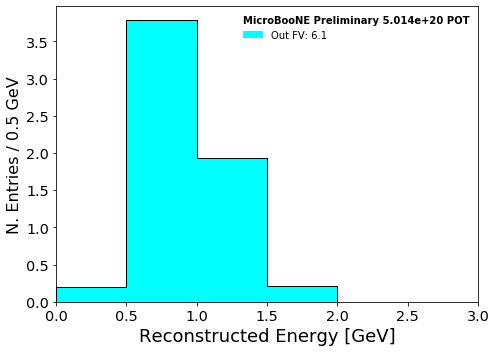

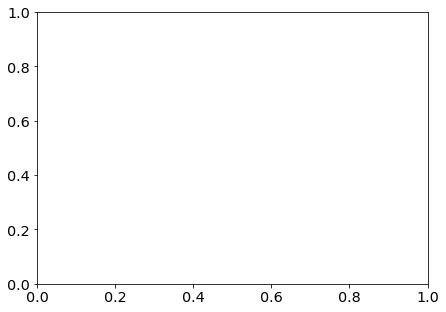

In [56]:
import batch_plotter_alex
import importlib
importlib.reload(batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_dirt.shape[0]
print("n_events here = ", n_events)
print("")
#batch_size = 40000
batch_size = n_events

varss = []
weightss = []
labss = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_dirt.iloc[start:end]

    samples = {
        "numu_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 #partial file: 8.885e+19
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45

    # NUE
    weights = { #full sample mc = 0.38
                "numu_dirt": dirtratio* SPLIT * scalingDRT,
    }


    my_plotter = batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)


    #Now check on a variable
    #Remember to change the plotter keys between truth and mc
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    

    var, weight, label = my_plotter.plot_variable(
        VARIABLE,
        query= NUMU_SEL_QUERY,
        #query= "",
        currentsample = "numu_dirt",
        kind="event_category",
        #kind="psrticle_pdg",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "ppfx_cv",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:3]
    
    varss.append(var)
    weightss.append(weight)
    labss.append(label)

No handles with labels found to put in legend.


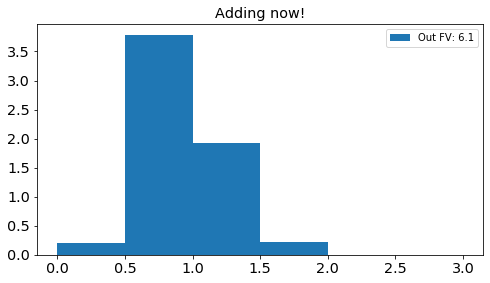

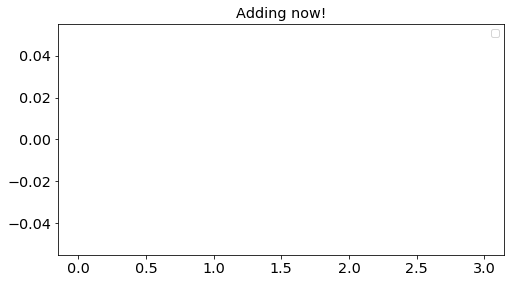

In [57]:
from matplotlib import gridspec

for i in range(int(n_events/batch_size)+1):
    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    #numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #numu_ax1.set_xlim([-1, 1])    #AngleDiff
    
    #print(varss)

    numu_stacked = numu_ax1.hist(
                varss[i].values(),
                weights=list(weightss[i].values()),
                stacked=True,
                label=labss[i],
                bins=BINS,
                range=RANGE)
    
    plt.title("Adding now!")
    plt.legend()

In [58]:
def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)

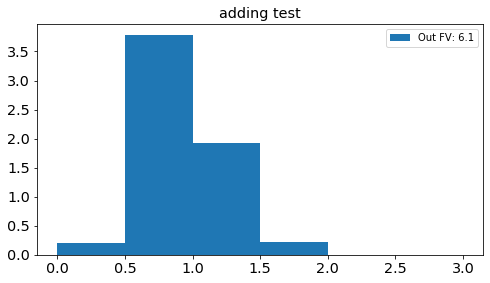

In [59]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


labels = [
            "%s: %.1f" % (category_labels[c], sum(weightss_tot[0][c])) \
            if sum(weightss_tot[0][c]) else ""
            for c in varss[0].keys()
        ]


numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])

#TrueE, LeptonMom
#numu_ax1.set_xlim([0, 5])
#numu_ax1.set_ylim([0, 30])

##AngleDiff
#nue_ax1.set_xlim([-1, 1])
#nue_ax1.set_ylim([0, 15])

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()

In [60]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 0

numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

print(numu_wanted_list)

[]

SUMS
[]
[]

Wanted List:
[]

[]


In [61]:
vars_tot_df = pd.DataFrame.from_dict(varss_tot)
weights_tot_df = pd.DataFrame.from_dict(weightss_tot)

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"

if isRun3 == False:
    ######full true
    if (variable == "Energy"):
        vars_tot_df.to_csv('numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        weights_tot_df.to_csv('numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    ########angleDiff
    elif (variable == "Angle"):
        vars_tot_df.to_csv('numu_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        weights_tot_df.to_csv('numu_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    ########leptonMom
    elif (variable == "Lepton"):
        vars_tot_df.to_csv('numu_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        weights_tot_df.to_csv('numu_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
elif isRun3 == True:
    ######full true
    if (variable == "Energy"):
        vars_tot_df.to_csv('numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        weights_tot_df.to_csv('numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    ########angleDiff
    elif (variable == "Angle"):
        vars_tot_df.to_csv('numu_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        weights_tot_df.to_csv('numu_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    ########leptonMom
    elif (variable == "Lepton"):
        vars_tot_df.to_csv('numu_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        weights_tot_df.to_csv('numu_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')


### Stat Err

In [62]:
#numudirtstat 

# sumw2 of the full event rate 
weight_stat_errs = []

variable = "Energy"
#variable = "Angle"
#variable = "Lepton"


if (variable == "Energy"):
    xvar = "reco_e"
    bins = np.arange(0.0, 3.5, 0.5)
elif (variable == "Angle"):
    xvar = "cosNu_Angle_Numi_Muon_Reco"
    bins = np.arange(-1.0, 1.2, 0.2)
elif (variable == "Lepton"):
    xvar = "muon_mom"
    bins = np.arange(0, 2.25, 0.25)

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    weight_stat_errs.append(sum(numu_dirt.query(NUMU_SEL_QUERY+ " and " +bin_query).totweight_data ** 2))
    
    
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )
print(weight_stat_errs)

[0.04216831770424743, 1.3679763149498145, 0.4184995576164004, 0.04678058495616385, 0, 0]


In [63]:

if isRun3 == False:
    if (variable == "Energy"):
        np.savetxt("numu_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("numu_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("numu_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    
elif isRun3 == True:
    if (variable == "Energy"):
        np.savetxt("numu_dirt_stat_errs_updated_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Angle"):
        np.savetxt("numu_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')
    elif (variable == "Lepton"):
        np.savetxt("numu_dirt_stat_errs_updated_full_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   weight_stat_errs,
                   delimiter =", ", 
                   fmt ='% s')

    

### Sys Errs

In [64]:
#############################
##### weightsGenie ###########
#############################

import syserr_batch_plotter_alex
import importlib
importlib.reload(syserr_batch_plotter_alex)
scaling = 1

SPLIT = 1.0

n_events = numu_dirt.shape[0]
print("n_events here = ", n_events)
print("n_events/2 here = ", np.floor(n_events/2))
print("")
batch_size = n_events
#batch_size = int(np.floor(n_events/5))
#n_events = batch_size

n_cv_tots = []
n_tots = []
dfs_genie = []
df_genie_vars = []
df_genie_splines = []
detvar_dicts = []

print(n_events/batch_size)
print(int(n_events/batch_size))

for i in range(int(n_events/batch_size)+1):
#for i in range(1):
    start = i*batch_size
    if (start + batch_size) < n_events:
        end = start + batch_size
    else:
        end = n_events
    sample_set = numu_dirt.iloc[start:end]

    samples = {
        "numu_dirt": sample_set 
    }


    scaling = 1
    if isRun3 == False:
        pot =  2e+20 #partial file: 8.885e+19
        dirtratio = pot/1.42143e+21
        scalingDRT = 0.65
    elif isRun3 == True:
        pot =  5.014e+20
        dirtratio = pot/1.03226e+21
        scalingDRT = 0.45
        
    weights = { #full sample mc = 0.38
                "numu_dirt": dirtratio* SPLIT * scalingDRT, #set0  
    }



    my_plotter = syserr_batch_plotter_alex.Plotter(samples, weights, pot=pot)
    print(weights)
    
    
    VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.0, 3.0),"Reconstructed Energy [GeV]"
    #VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"
    #VARIABLE, BINS, RANGE, XTIT = 'muon_mom',8,(0.0, 2.0),"Lepton Momentum (GeV)"
    
    
    n_cv_tot, n_tot, df_genie, df_genie_var, df_genie_spline, detvar_dict  = my_plotter.plot_variable(
        VARIABLE,   
        query= NUMU_SEL_QUERY,
        currentsample = "numu_dirt",
        typeerr = "standard",
        weight = "weightsGenie",
        category_query = " ",
        Nuniverse = 500,
        kind="event_category",
        draw_sys  = True, 
        draw_geoSys = True, 
        draw_data = True,
        ratio=False,
        genieweight = "ppfx_cv",  
        stacksort=3,
        title=XTIT,
        bins=BINS,
        range=RANGE
    )[0:6]
    
    
    n_cv_tots.append(n_cv_tot)
    n_tots.append(n_tot)
    dfs_genie.append(df_genie)
    df_genie_vars.append(df_genie_var)
    df_genie_splines.append(df_genie_spline)
    detvar_dicts.append(detvar_dict)

n_events here =  201
n_events/2 here =  100.0

1.0
1
{'numu_dirt': 0.21857865266502624}
nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0  and contained_fraction> 0.95 and topological_score >0.3& reco_e <= 3 & reco_e >= 0 
 ~(abs(nu_pdg)==12 and ccnc==0 and -1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8) 
 None 
 False

standard sys err
Universes 500
     0     1     2     3     4     5     6     7     8     9    ...   590  \
0   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
1   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
2   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
3   1000

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[0.20534925 3.78051829 1.92761374 0.21628809 0.         0.        ]


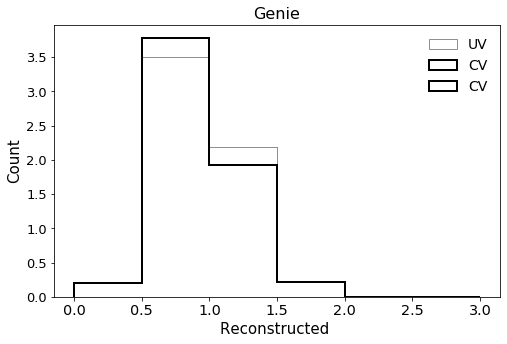

[0.25 0.75 1.25 1.75 2.25 2.75]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[0. 0. 0. 0. 0. 0.]


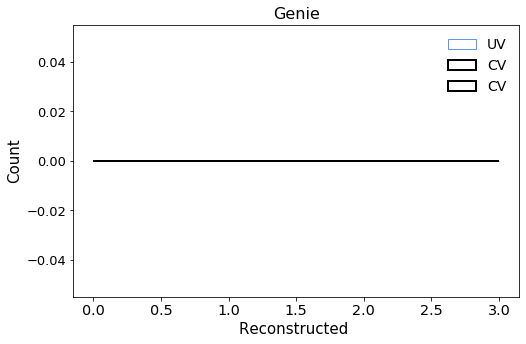

In [65]:
import matplotlib.pyplot as plt
import matplotlib


for j in range(len(detvar_dicts)):

    n=0
    
    variable = "Energy"
    #variable = "Angle"
    #variable = "Lepton"

    if (variable == "Energy"):
        bin_centers = np.arange(0.25, 3.25, 0.5) #energy
        bins = np.arange(0.0, 3.5, 0.5)
    elif (variable == "Angle"):
        bin_centers = np.arange(-0.9, 1.1, 0.2) #Angle
        bins = np.arange(-1, 1.2, 0.2)
    elif (variable == "Lepton"):    
        bin_centers = np.arange(0.125, 2.125, 0.25) #lepton
        bins = np.arange(0, 2.25, 0.25)
    
    
    
    print(bin_centers)
    print(bins)

    fig = plt.figure(figsize=(8, 5)) 


    for variation in detvar_dicts[j].keys(): 

        if n==0: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation], 
                 linewidth=1, color='cornflowerblue', label='UV')

        else: 
            plt.hist(bin_centers, bins, histtype='step', weights=detvar_dicts[j][variation],
                 linewidth=1, color='cornflowerblue')

        n+=1   


    plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)

    current = (plt.hist(bin_centers, bins, histtype='step', 
                     weights=detvar_dicts[j]['CV'], color='black', label='CV', linewidth=2)[0])

    print(current)

    plt.title('Genie', fontsize=16)

    plt.ylabel('Count' , fontsize=15) # 2.68294E22
    plt.xlabel("Reconstructed ", fontsize=15)

    #plt.xticks(x_ticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(frameon=False, fontsize=14)

    #plt.xlim(xlow, xhigh)

    plt.show()

In [66]:
#will need to edit this if batching

numu_dirt_genie_detvar_dict = pd.DataFrame(detvar_dicts[0])

if isRun3 == False:
    if (variable == "Energy"):
        numu_dirt_genie_detvar_dict.to_csv('numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Angle"):
        numu_dirt_genie_detvar_dict.to_csv('numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Lepton"):
        numu_dirt_genie_detvar_dict.to_csv('numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_'+ending+'.csv')
elif isRun3 == True:
    if (variable == "Energy"):
        numu_dirt_genie_detvar_dict.to_csv('numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Angle"):
        numu_dirt_genie_detvar_dict.to_csv('numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Lepton"):
        numu_dirt_genie_detvar_dict.to_csv('numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_leptonMom_usingSelection_recoCut_run3_'+ending+'.csv')

In [67]:
masterlist = []
templist = []
for i in range((len(n_tots[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(n_tots)):
        templist.append(n_tots[j][i])
masterlist.append(templist)

#need to sum each part of the masterlist into one pair of arrays now
masterlist.pop(0)
final_ns_numu_dirt_genie = []

for a in range(len(masterlist)):
    #print(sum(masterlist[a]))
    final_ns_numu_dirt_genie.append(sum(masterlist[a]))

final_ncvs_numu_dirt_genie = sum(n_cv_tots)

#####################################################
frames = []
for a in range(len(dfs_genie)):
    frames.append(dfs_genie[a][0])
    
    
total_genie_df = pd.concat(frames, ignore_index=True)
print(total_genie_df)

#-----------------
frames2 = []
for b in range(len(df_genie_vars)):
    frames2.append(df_genie_vars[b][0])
    
    
total_genie_df_vars = pd.concat(frames2, ignore_index=False)
print(total_genie_df_vars)

#-----------------
frames3 = []
for c in range(len(df_genie_splines)):
    frames3.append(df_genie_splines[c][0])
    
    
total_genie_df_splines = pd.concat(frames3, ignore_index=False)
print(total_genie_df_splines)


     0     1     2     3     4     5     6     7     8     9    ...   590  \
0   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
1   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
2   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
3   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
4   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
5   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
6   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
7   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
8   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
9   1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
10  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   
11  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  ...  1000   

In [68]:
if isRun3 == False:
    if (variable == "Energy"):
        np.savetxt("numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   final_ns_numu_dirt_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv", 
                   final_ncvs_numu_dirt_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv')
    elif (variable == "Angle"):
        np.savetxt("numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   final_ns_numu_dirt_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv", 
                   final_ncvs_numu_dirt_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv')
    elif (variable == "Lepton"):
        np.savetxt("numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   final_ns_numu_dirt_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_"+ending+".csv", 
                   final_ncvs_numu_dirt_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_'+ending+'.csv')
        
elif isRun3 == True:
    if (variable == "Energy"):
        np.savetxt("numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   final_ns_numu_dirt_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv", 
                   final_ncvs_numu_dirt_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv')
    elif (variable == "Angle"):
        np.savetxt("numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   final_ns_numu_dirt_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv", 
                   final_ncvs_numu_dirt_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv')
    elif (variable == "Lepton"):
        np.savetxt("numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   final_ns_numu_dirt_genie[0],
                   delimiter =", ", 
                   fmt ='% s')

        np.savetxt("numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_"+ending+".csv", 
                   final_ncvs_numu_dirt_genie,
                   delimiter =", ", 
                   fmt ='% s')

        ###########################################

        total_genie_df.to_csv('numu_dirt_syserss_df_genie_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        total_genie_df_vars.to_csv('numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')
        total_genie_df_splines.to_csv('numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_leptonMom_usingSelection_run3_'+ending+'.csv')



## NUMU_EXT

Unaffected by weight change.

## NUMU_DATA SAMPLE

Unaffected by weight change.